In this project, we will solve a problem for classifying personal loans on the Thera-Bank dataset. The majority of Thera-Bank's customers are depositors. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in quickly expanding this base to do more loan business while earning more through loan interest. In particular, management wants to look for ways to convert its liability customers into retail loan customers while keeping them as depositors. A campaign the bank ran last year for deposit customers showed a conversion rate of over 9.6% success. This has prompted the retail marketing department to develop campaigns with better target marketing to increase the success rate with a minimal budget. The department would like to develop a classifier that will help them identify the potential customers who are more likely to purchase the loan. This will increase the success rate while reducing the cost of the campaign.

## Context
    
<font size=3 color="black" style="font-family:TimesNewRoman">
    

<p1 size=3 color="black" style="font-family:TimesNewRoman">
Thera Bankis a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

As a Data scientist at Thera Bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.</p>
  
    
**Motivation : To understand Logistic regression  and Decision tree and explore this algorthims using Sklearn, Statmodel,  Roc-Auc Curve,Precision Curve,Sequential feature selection, hyperparamter tuning Decision tress  and post pruning Decision trees**
  

## Data Set
<br>
<font size=3 color="black" style="font-family:TimesNewRoman">
    


    
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?
   

## Problem

    
- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.
- Does Age have any impact of customer buying loan?
- Do people with less income borrow loans .?


# Objective 
To use different classification models to predict the likelihood that a customer will buy a personal loan.

# Libraries

In [1]:
!pip install zipcodes # installing Zipcodes library .

     |████████████████████████████████| 726 kB 4.8 MB/s 


In [2]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix

from sklearn.linear_model import LogisticRegression #to build the model
from sklearn.tree import DecisionTreeClassifier#to build the model

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')


# Read and Understand data

In [3]:
#Reading the csv file  used car data.csv 
data_path='../input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv'
df=pd.read_csv(data_path)
df_loan=df.copy()
print(f'There are {df_loan.shape[0]} rows and {df_loan.shape[1]} columns') # fstring
df_loan.head()

There are 5000 rows and 14 columns


ID  Age  Experience  Income  ZIP Code  Family   CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4 1.60000          1         0   
1   2   45          19      34     90089       3 1.50000          1         0   
2   3   39          15      11     94720       1 1.00000          1         0   
3   4   35           9     100     94112       1 2.70000          2         0   
4   5   35           8      45     91330       4 1.00000          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [4]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**There are no missing values in the dataset.  All the columns are numerical here. `Personal loan` is target variable.  Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.**

In [5]:
#get the size of dataframe
print ("Rows     : " , df_loan.shape[0])  #get number of rows/observations
print ("Columns  : " , df_loan.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", df_loan.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", df_loan.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(df_loan.isna().sum() / df_loan.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", df_loan.nunique())  #  count of unique values


Rows     :  5000
Columns  :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
Percent of missing :

 ID                   0.00000
Age                  0.00000
Experience           0.00000
Income               0.00000
ZIP Code             0.00000
Family               0.00000
CCAvg                0.00000
Education            0.00000
Mortgage             0.00000
Pers

In [6]:
df_loan.sample(10)

ID  Age  Experience  Income  ZIP Code  Family   CCAvg  Education  \
1968  1969   54          24      49     91801       1 1.40000          3   
4517  4518   45          18      50     91902       3 2.50000          2   
92      93   43          19      34     94305       3 0.60000          2   
3085  3086   55          29      71     91311       3 0.30000          2   
73      74   41          16      85     94606       1 4.00000          3   
4106  4107   48          22      54     93106       1 1.20000          2   
1925  1926   43          19      81     90245       1 0.30000          1   
1220  1221   41          17     165     94143       2 8.00000          1   
1196  1197   37          13      71     94609       2 2.70000          1   
3960  3961   62          37      48     92028       3 2.20000          1   

      Mortgage  Personal Loan  Securities Account  CD Account  Online  \
1968         0              0                   0           0       1   
4517         0              0                   0           0       1   
92           0              0                   0           0       0   
3085         0              0                   0           0       0   
73           0              0                   0           0       1   
4106         0              0                   0           0       0   
1925       218              0                   0           0       1   
1220         0              0                   0           0       1   
1196        94              0                   0           0       1   
3960         0              0                   0           0       0   

      CreditCard  
1968           0  
4517           0  
92             0  
3085           1  
73             1  
4106           0  
1925           0  
1220           0  
1196           0  
3960           0

**`Id` column is not needed and can be dropped.**

In [7]:
df_loan.drop(['ID'],axis=1,inplace=True) #droping id

# Data Preprocessing

### Processing Zipcode
Zipcode is a categorical feature and can be a good predictor of target variable. We can analyse if there is any pattern on  location  for customers who had borrowed loaned during previous campaign. Trying to see if we can reduce the category

In [8]:
df_loan.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

In [9]:
df_loan.ZIPCode.nunique()

467

In [10]:
# get unique zipcodes
list_zipcode=df_loan.ZIPCode.unique()

In [11]:
#here i am creating a dictionary of county by using library zipcode and matching method.
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})
      

In [12]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

We got almost all county expect for `96651,92634,93077,92717`. We can fix this zip code by searching internet. Couldn't find for other zipcodes.

In [13]:
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})

In [14]:
df_loan['County']=df_loan['ZIPCode'].map(dict_zip)

df_loan.County.nunique()

40

In [15]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


### Fixing the data types
Personal_Loan, Securities_Account, CD_Account, 'Online', 'CreditCard' ,Education are of int/object type, we can change them to category type  to reduce the dataspace required.

In [16]:
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
df_loan[category_col] = df_loan[category_col].astype('category')

df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


 **we can see that the memory usage has decreased  from `547 to 266.`**

### Processing Experience

In [17]:
# checking negative and zero values for experience. 
df_loan[df_loan['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

52 customers from age group 23 - 30 have negative values in experience

In [18]:
df_loan[df_loan['Experience']<0].sort_values(by='Experience',ascending=True)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
4514   24          -3      41   91768      4 1.00000         3         0   
2618   23          -3      55   92704      3 2.40000         2       145   
4285   23          -3     149   93555      2 7.20000         1         0   
3626   24          -3      28   90089      4 1.00000         3         0   
2717   23          -2      45   95422      4 0.60000         2         0   
2876   24          -2      80   91107      2 1.60000         3       238   
3130   23          -2      82   92152      2 1.80000         2         0   
2466   24          -2      80   94105      2 1.60000         3         0   
3796   24          -2      50   94920      3 2.40000         2         0   
2962   23          -2      81   91711      2 1.80000         2         0   
793    24          -2     150   94720      2 2.00000         1         0   
3887   24          -2     118   92634      2 7.20000         1         0   
889    24          -2      82   91103      2 1.60000         3         0   
597    24          -2     125   92835      2 7.20000         1         0   
315    24          -2      51   90630      3 0.30000         3         0   
451    28          -2      48   94132      2 1.75000         3        89   
4116   24          -2     135   90065      2 7.20000         1         0   
4481   25          -2      35   95045      4 1.00000         3         0   
4411   23          -2      75   90291      2 1.80000         2         0   
4015   25          -1     139   93106      2 2.00000         1         0   
3157   23          -1      13   94720      4 1.00000         1        84   
3279   26          -1      44   94901      1 2.00000         2         0   
3284   25          -1     101   95819      4 2.10000         3         0   
3292   25          -1      13   95616      4 0.40000         1         0   
3394   25          -1     113   90089      4 2.10000         3         0   
3425   23          -1      12   91605      4 1.00000         1        90   
4088   29          -1      71   94801      2 1.75000         3         0   
3824   23          -1      12   95064      4 1.00000         1         0   
3946   25          -1      40   93117      3 2.40000         2         0   
3076   29          -1      62   92672      2 1.75000         3         0   
89     25          -1     113   94303      4 2.30000         3         0   
2848   24          -1      78   94720      2 1.80000         2         0   
226    24          -1      39   94085      2 1.70000         2         0   
524    24          -1      75   93014      4 0.20000         1         0   
536    25          -1      43   92173      3 2.40000         2       176   
540    25          -1     109   94010      4 2.30000         3       314   
576    25          -1      48   92870      3 0.30000         3         0   
583    24          -1      38   95045      2 1.70000         2         0   
649    25          -1      82   92677      4 2.10000         3         0   
670    23          -1      61   92374      4 2.60000         1       239   
2980   25          -1      53   94305      3 2.40000         2         0   
686    24          -1      38   92612      4 0.60000         2         0   
1173   24          -1      35   94305      2 1.70000         2         0   
1428   25          -1      21   94583      4 0.40000         1        90   
1522   25          -1     101   94720      4 2.30000         3       256   
1905   25          -1     112   92507      2 2.00000         1       241   
2102   25          -1      81   92647      2 1.60000         3         0   
2430   23          -1      73   92120      4 2.60000         1         0   
2545   25          -1      39   94720      3 2.40000         2         0   
4582   25          -1      69   92691      3 0.30000         3         0   
909    23          -1     149   91709      1 6.33000         1       305   
4957   29          -1      50   95842      2 1.75000  

In [19]:
df_loan.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

**Its seems experience is negative for all observation with for age 23,24, and few others . Based on there age and education it seems values were negative by mistake. so changing it to absoulte values of experience.**

In [20]:
df_loan.loc[df_loan['Experience']<0,'Experience']=np.abs(df_loan['Experience'])

In [21]:
df_loan[df_loan['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

**Checking age and income for customers with 0 experience. We will see how to impute this columns more after EDA.**

# Exploratory Data Analysis

<font size=2 color="blue" style="font-family:TimesNewRoman">

In [22]:
df_loan.describe().T

count     mean       std      min      25%      50%       75%  \
Age        5000.00000 45.33840  11.46317 23.00000 35.00000 45.00000  55.00000   
Experience 5000.00000 20.13460  11.41519  0.00000 10.00000 20.00000  30.00000   
Income     5000.00000 73.77420  46.03373  8.00000 39.00000 64.00000  98.00000   
CCAvg      5000.00000  1.93794   1.74766  0.00000  0.70000  1.50000   2.50000   
Mortgage   5000.00000 56.49880 101.71380  0.00000  0.00000  0.00000 101.00000   

                 max  
Age         67.00000  
Experience  43.00000  
Income     224.00000  
CCAvg       10.00000  
Mortgage   635.00000

In [23]:
for column in category_col:
    print(df_loan[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

**Observations**
- Customers age is in range of `23 - 67 `, with mean and median  of `~45`.
- Maximum experience is `43` years. where as mean and median are `~20`.
- Income are in range  `8k to 224k` USD. Mean is `73k` USD and median is `64k` USD. 224 Max salary need to be verified
- Maximum mortgage taken is `635k` USD.Need to verify this
- Average spending on credit card per month  ranges from `1- 10k` with mean of `1.9kUSD` and median of `1.5k USD`
- `1095` customers are from `Los Angeles County`.
- `480` customers had borrowed loan before.


### Univariate Analysis

In [24]:
def dist_box(data):
 # function plots a combined graph for univariate analysis of continous variable 
 #to check spread, central tendency , dispersion and outliers  
    Name=data.name.upper()
    fig,(ax_box,ax_dis)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    sns.set_theme(style="white")
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
     # just trying to make visualisation better. This will set background to white
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

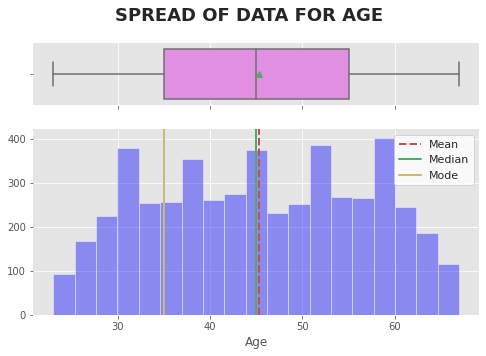

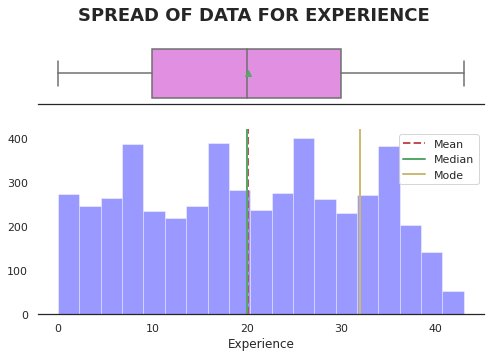

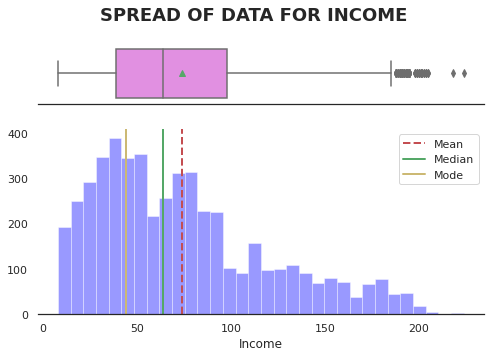

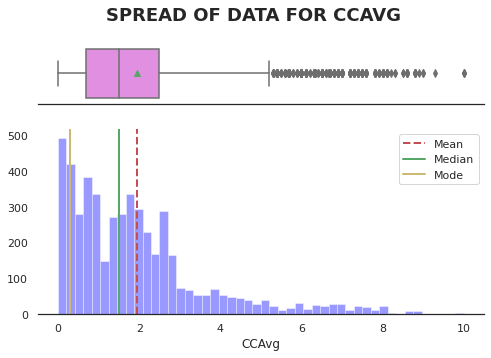

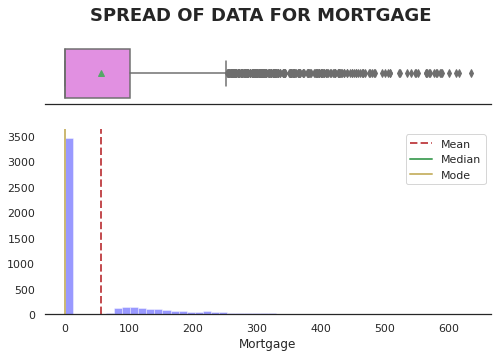

In [25]:
#select all quantitative columns for checking the spread
list_col=  ['Age','Experience','Income','CCAvg','Mortgage']
for i in range(len(list_col)):
    dist_box(df_loan[list_col[i]])

**Observations**
- Age and experience both has same distrubtion with spike at 5 points.
- Income is right skewed and has some outlier on higher side which can be clipped.
- Average montly credit is right skewed and has lot of outliers on higher side which can be clipped.
- Mortgage is  mostly 0 . but is  right skewed and has lot of outlier on higher side which can be clipped.



# Create AGE bin
Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern 

In [26]:
df_loan['Agebin'] = pd.cut(df_loan['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])
df_loan.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin  
0    Los Angeles County  18-30  
1    Los Angeles County  41-50  
2        Alameda County  31-40  
3  San Francisco County  31-40  
4    Los Angeles County  31-40

# Income : Create a new variable Income group
To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group 

In [27]:
# Create a new variable - Income group
df_loan["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

df_loan.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group  
0    Los Angeles County  18-30        Lower  
1    Los Angeles County  41-50        Lower  
2        Alameda County  31-40        Lower  
3  San Francisco County  31-40       Middle  
4    Los Angeles County  31-40        Lower

### Spending
To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [28]:
df_loan.CCAvg.describe()

count   5000.00000
mean       1.93794
std        1.74766
min        0.00000
25%        0.70000
50%        1.50000
75%        2.50000
max       10.00000
Name: CCAvg, dtype: float64

In [29]:
df_loan["Spending_group"] = pd.cut( x=df_loan["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

df_loan.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group Spending_group  
0    Los Angeles County  18-30        Lower         Medium  
1    Los Angeles County  41-50        Lower         Medium  
2        Alameda County  31-40        Lower         Medium  
3  San Francisco County  31-40       Middle           High  
4    Los Angeles County  31-40        Lower         Medium

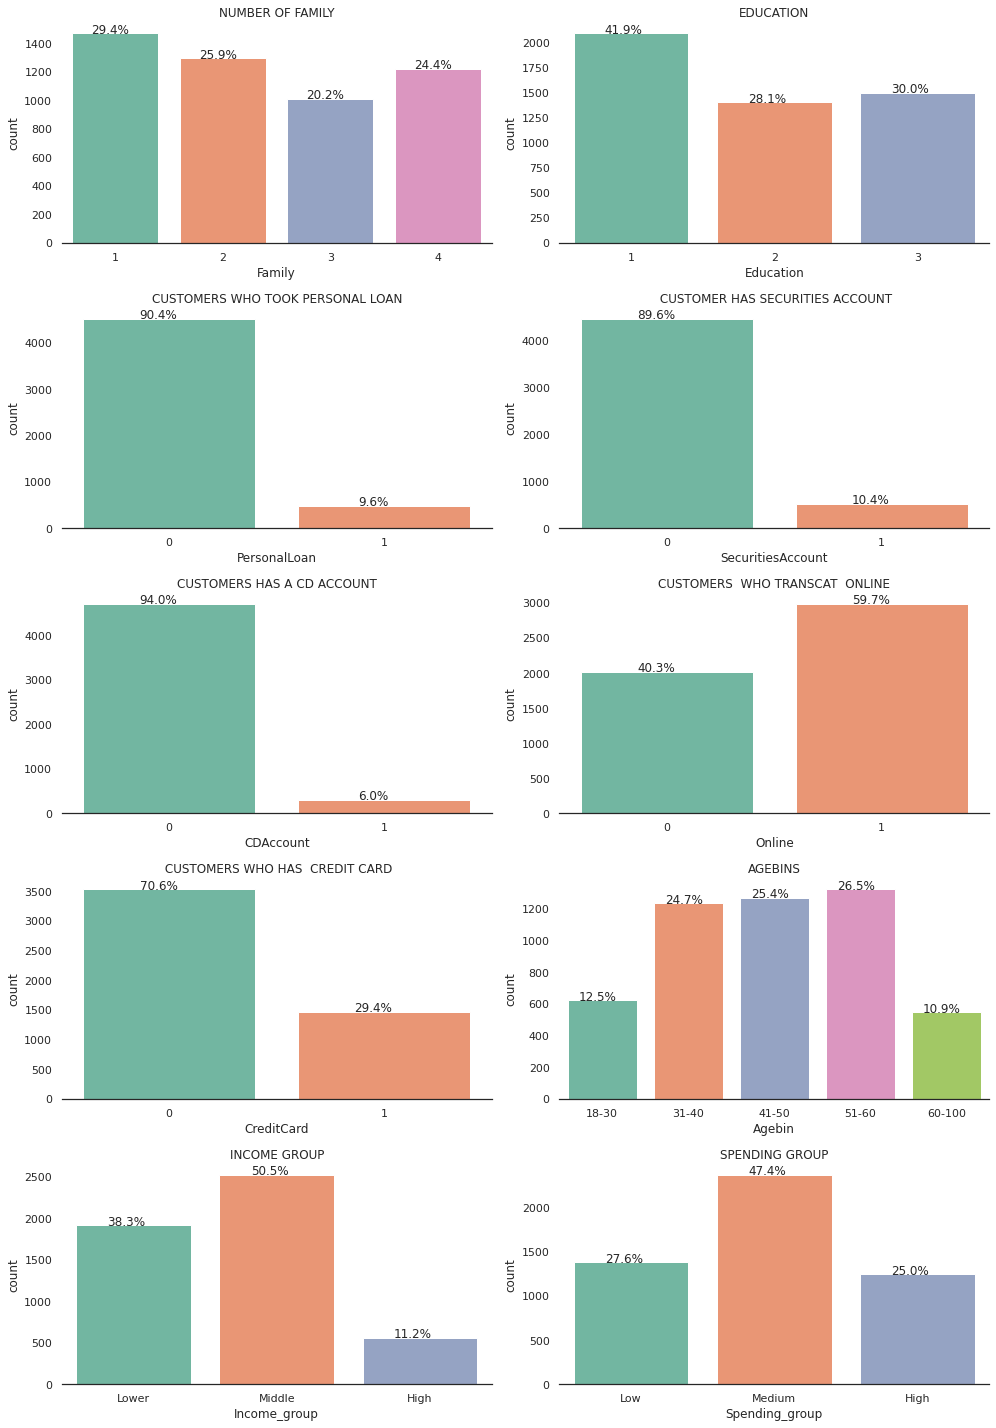

In [30]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']

for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = df_loan[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=df_loan[variable], data=df_loan )
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_loan[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())

**Observations**
- `~29.4 %` customers are single.
- `~41.9%` customers are undergrad.
- `~9.6%` bought  a personal loan from the bank.
- `10.4 %` customers have a securities account with the bank
- `6 %` customer have a CD account.
- `60%` customers  transact online.
- `29.4%` customers have  credit cards.  
- `~ 75 %` of customers  are in range of 31- 60.
- `~ 50 %` Most of bank customers belong to middle income group.
- `~48 %` of customers has medium Average spending

In [31]:
df_loan.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
9307                      1    0
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<AxesSubplot:ylabel='County'>

<Figure size 1080x1728 with 0 Axes>

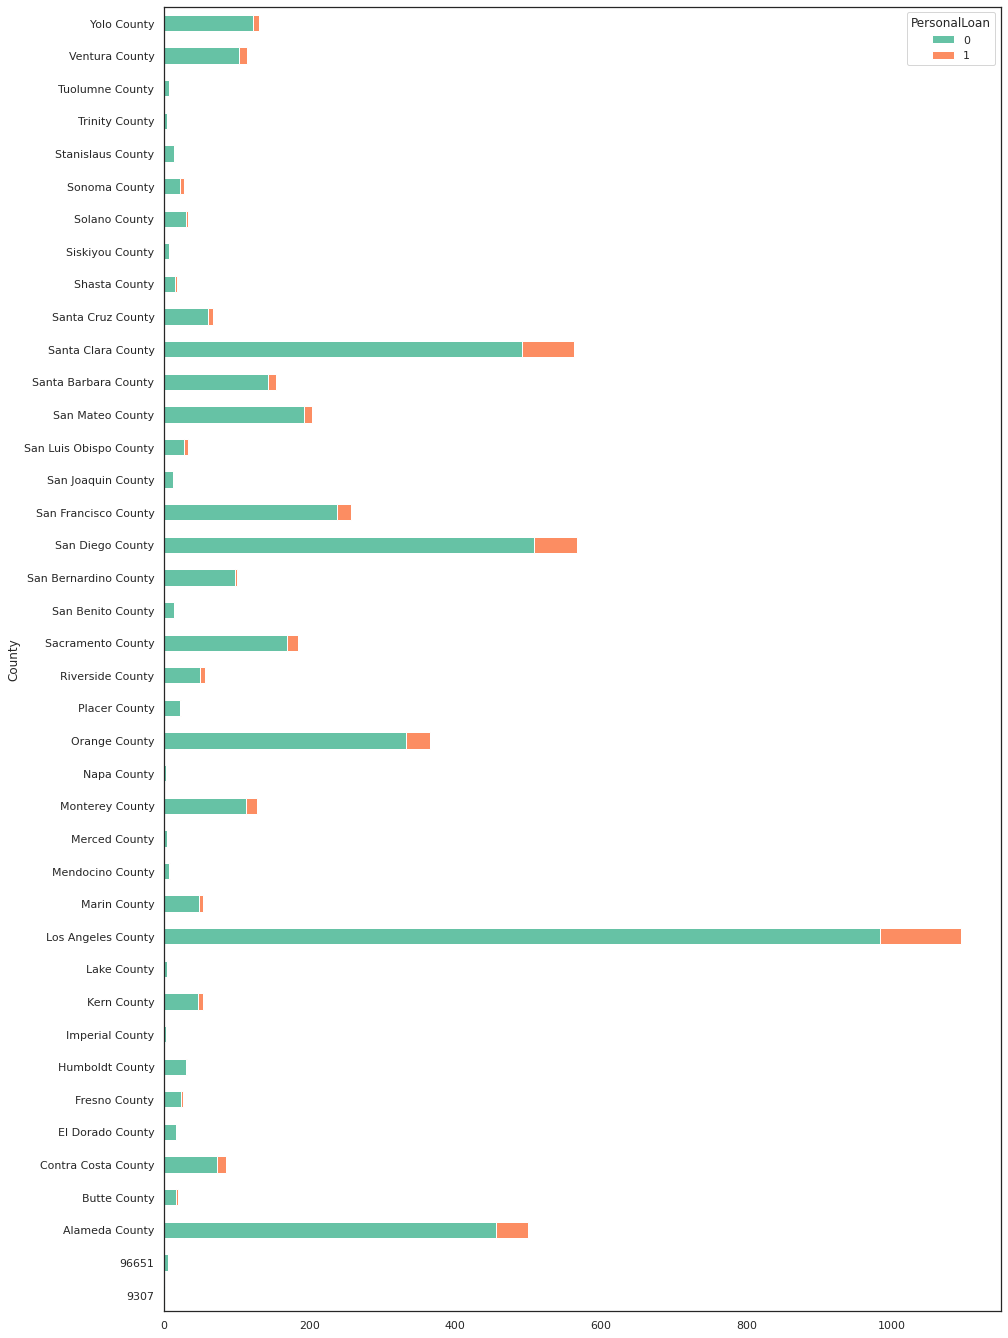

In [32]:
plt.figure(figsize=(15,24))

pd.crosstab(index=df_loan['County'],columns=df_loan['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

**It can be seen the percentage of loan taken from various country differ.There are so many county converting them to regions will help in our model**

In [33]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

**Converting the county to regions based on  https://www.calbhbc.org/region-map-and-listing.html**

In [34]:
df_loan['Regions'] = df_loan['County'].map(counties)

df_loan['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

In [35]:
df_loan.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [36]:
df_loan.dropna(inplace=True)

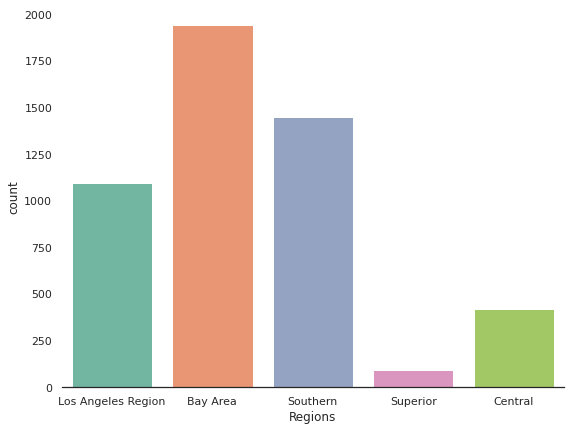

In [37]:
plt.figure(figsize=(9,7))
sns.countplot(data=df_loan,x=df_loan['Regions'])
sns.despine(top=True,right=True,left=True) # to remove side line from graph

### Bivariate & Multivariate Analysis

In [38]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

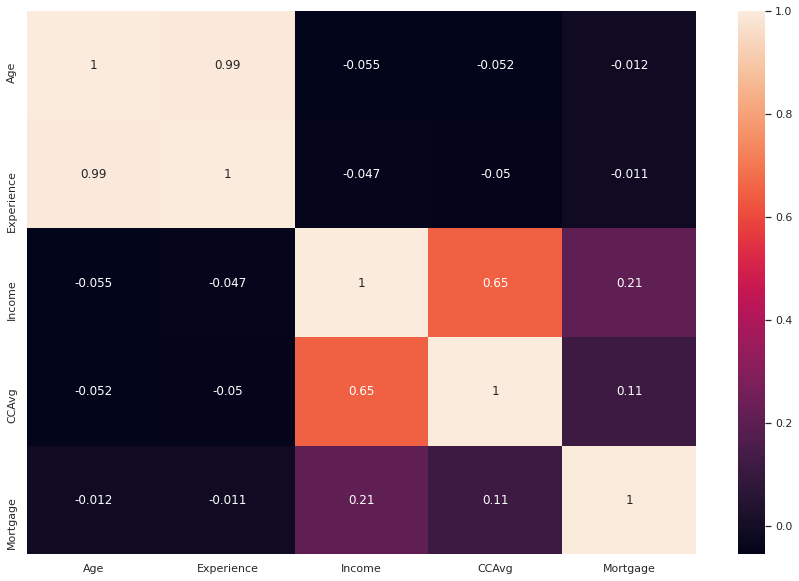

In [39]:
sns.set_palette(sns.color_palette("Set2", 8))
plt.figure(figsize=(15,10))
sns.heatmap(df_loan.corr(),annot=True)
plt.show()

**Observations**
- As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
- Income and Average spending on  credit card are  positively corrleated.
- Mortgage has very little correlation with income.


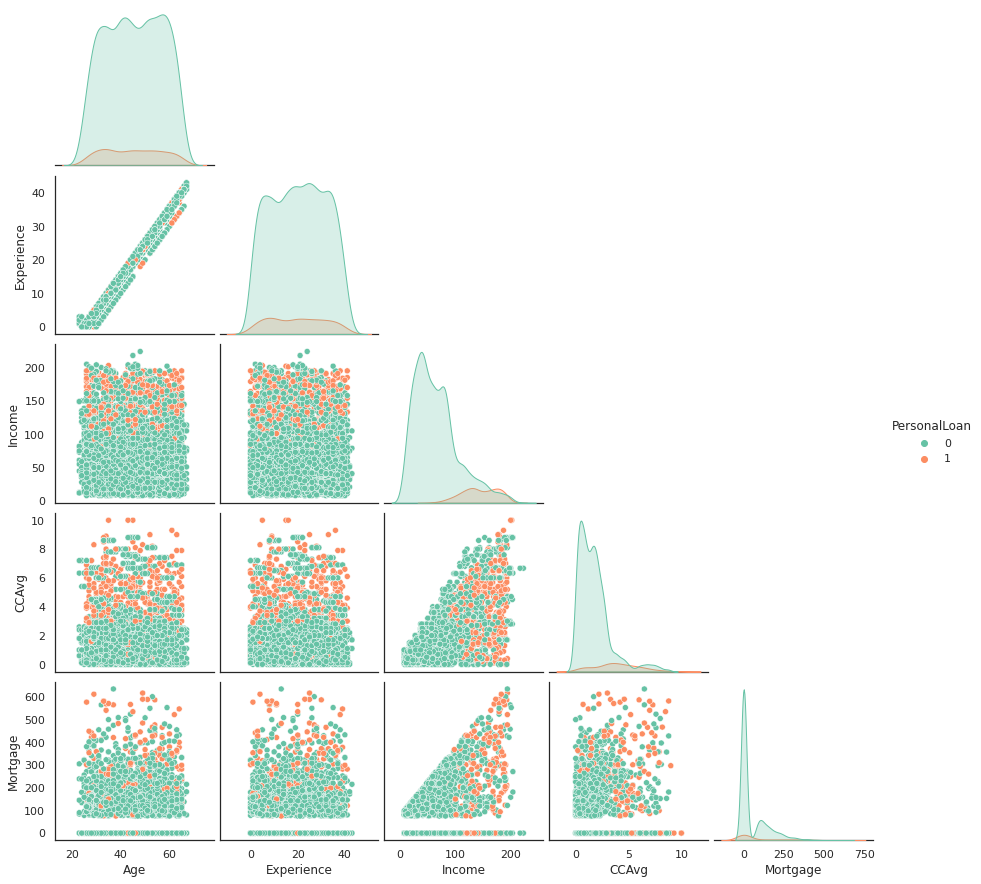

In [40]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.pairplot(df_loan, hue="PersonalLoan",corner=True)
plt.show()

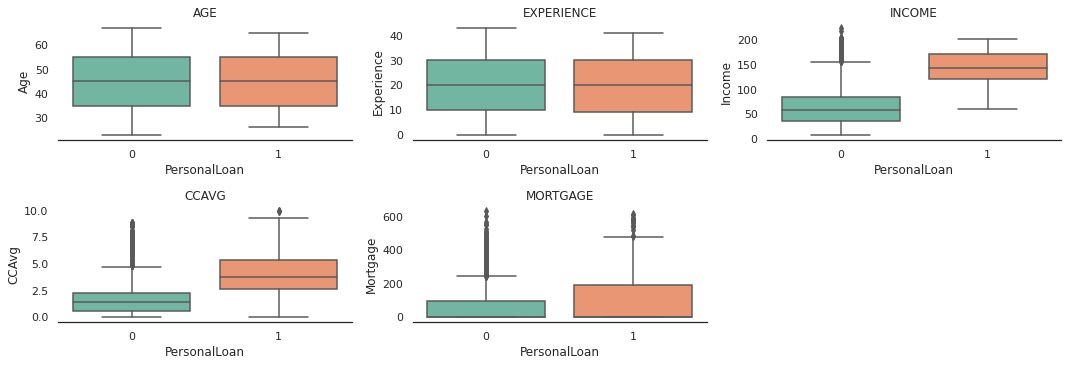

In [41]:
numeric_columns = ['Age','Experience','Income','CCAvg','Mortgage']
plt.figure(figsize=(15,25))

sns.set_palette(sns.color_palette("Set2", 8))
for i, variable in enumerate(numeric_columns):
        plt.subplot(10,3,i+1)
        
        sns.boxplot(x='PersonalLoan',y= df_loan[variable], data=df_loan)     
        sns.despine(top=True,right=True,left=True) # to remove side line from graph
        plt.tight_layout()
        plt.title(variable.upper())

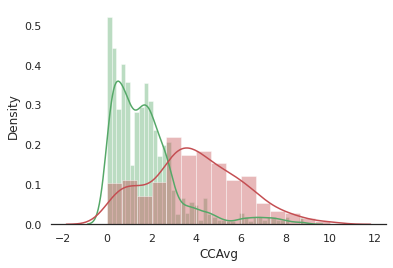

In [42]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['CCAvg'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['CCAvg'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

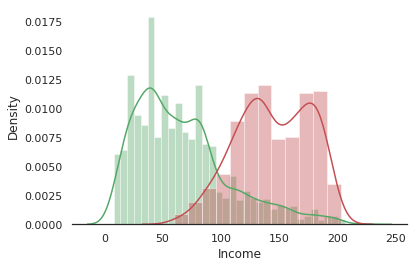

In [43]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Income'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Income'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

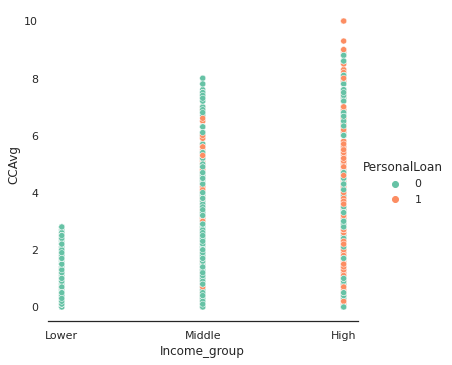

In [44]:
sns.relplot(x='Income_group',y='CCAvg',hue='PersonalLoan',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

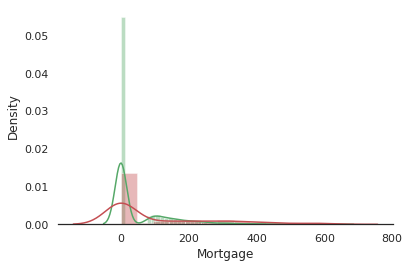

In [45]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Mortgage'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Mortgage'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

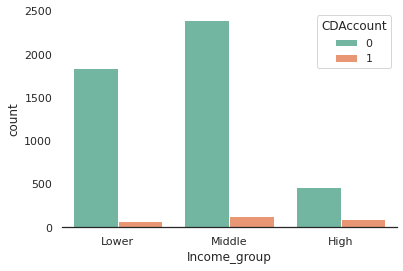

In [46]:
sns.countplot(x='Income_group',hue='CDAccount',data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

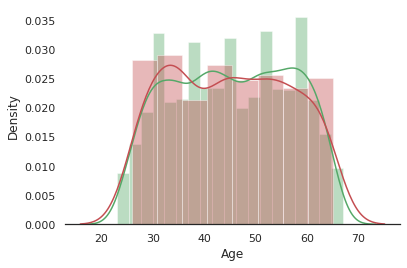

In [47]:
sns.distplot( df_loan[df_loan['PersonalLoan'] == 0]['Age'], color = 'g')
sns.distplot( df_loan[df_loan['PersonalLoan'] == 1]['Age'], color = 'r')
sns.despine(top=True,right=True,left=True) # to remove side line from graph

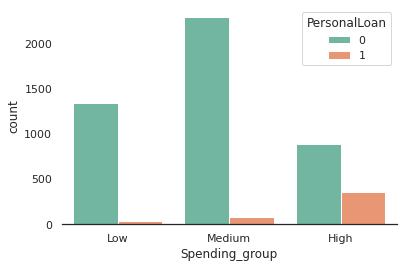

In [48]:
sns.countplot(x='Spending_group',hue='PersonalLoan',data=df_loan)

sns.despine(top=True,right=True,left=True) # to remove side line from graph

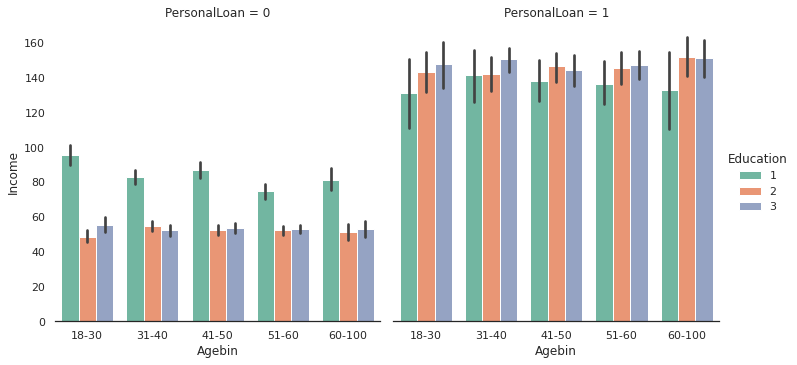

In [49]:
sns.catplot(y='Income',x='Agebin',hue='Education',kind='bar',col="PersonalLoan", data=df_loan)
sns.despine(top=True,right=True,left=True) # to remove side line from graph

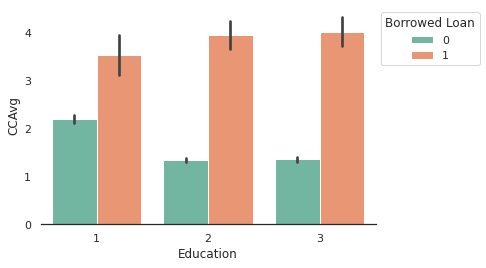

In [50]:
sns.set_palette(sns.color_palette("Set2", 8))
sns.barplot(y='CCAvg',x='Education', hue='PersonalLoan',data=df_loan)
labels=["No","Yes"]
plt.legend(loc="upper left", title="Borrowed Loan",bbox_to_anchor=(1,1))
sns.despine(top=True,right=True,left=True) # to remove side line from graph

**Observations**
   
- People with higher income had opted for personal loan before.
    
- People with high mortgages opted for loan.
    
- Customers with higher average monthly credit usage have opted for loan.    
   
- Customers with higher income had higher average credit card usage and mortgage.

- Graduate and Advanced/Professional have higher monhtly  credit card usage and have borrowed loans with the bank.



In [51]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("Set2", 8))
    tab1 = pd.crosstab(x,df_loan['PersonalLoan'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,df_loan['PersonalLoan'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Borrowed Loan",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

PersonalLoan     0    1   All
Family                       
1             1365  107  1472
2             1190  106  1296
3              877  133  1010
4             1087  134  1221
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


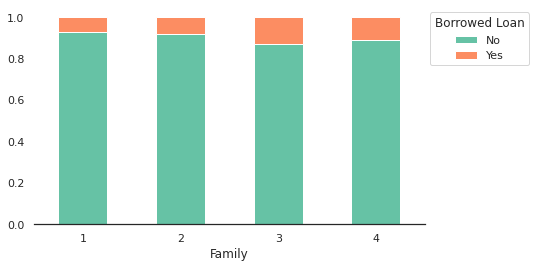

PersonalLoan     0    1   All
Education                    
1             2003   93  2096
2             1221  182  1403
3             1295  205  1500
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


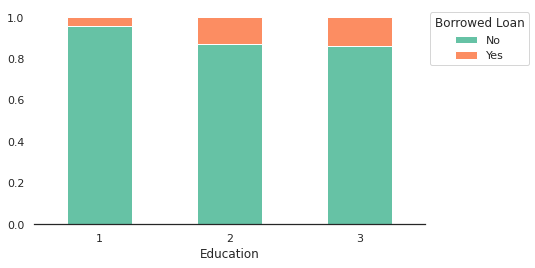

PersonalLoan          0    1   All
SecuritiesAccount                 
0                  4057  420  4477
1                   462   60   522
All                4519  480  4999
------------------------------------------------------------------------------------------------------------------------


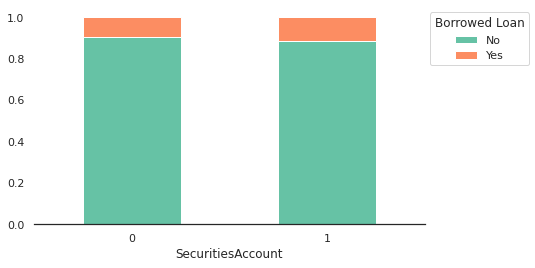

PersonalLoan     0    1   All
CDAccount                    
0             4357  340  4697
1              162  140   302
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


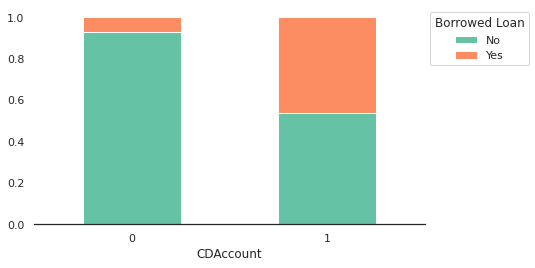

PersonalLoan     0    1   All
CreditCard                   
0             3193  337  3530
1             1326  143  1469
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


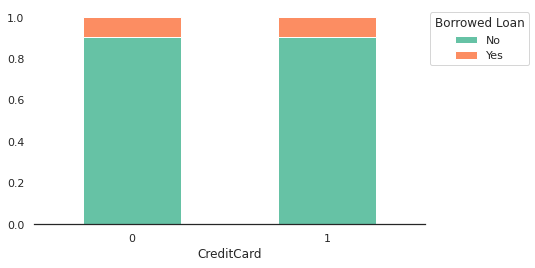

PersonalLoan     0    1   All
Online                       
0             1827  189  2016
1             2692  291  2983
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


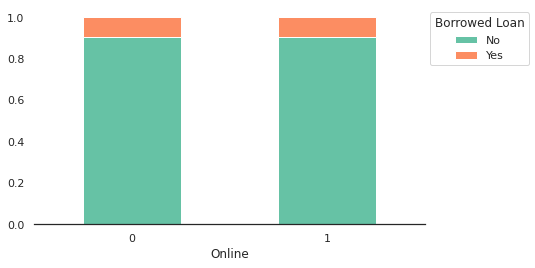

PersonalLoan           0    1   All
Regions                            
Bay Area            1747  196  1943
Central              390   30   420
Los Angeles Region   984  111  1095
Southern            1314  135  1449
Superior              84    8    92
All                 4519  480  4999
------------------------------------------------------------------------------------------------------------------------


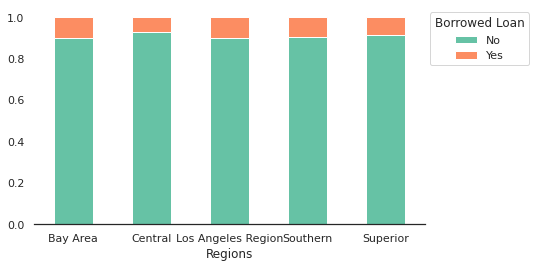

PersonalLoan     0    1   All
Agebin                       
18-30          558   66   624
31-40         1118  118  1236
41-50         1148  122  1270
51-60         1207  115  1322
60-100         488   59   547
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


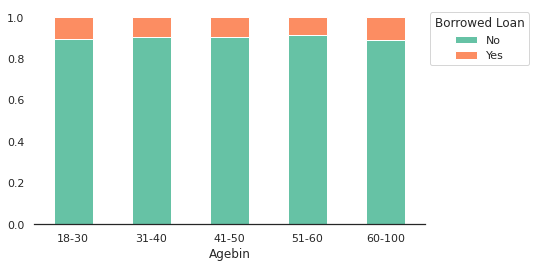

PersonalLoan     0    1   All
Income_group                 
Lower         1913    0  1913
Middle        2301  223  2524
High           305  257   562
All           4519  480  4999
------------------------------------------------------------------------------------------------------------------------


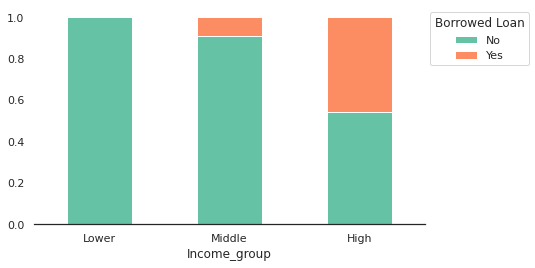

PersonalLoan       0    1   All
Spending_group                 
Low             1341   39  1380
Medium          2292   79  2371
High             886  362  1248
All             4519  480  4999
------------------------------------------------------------------------------------------------------------------------


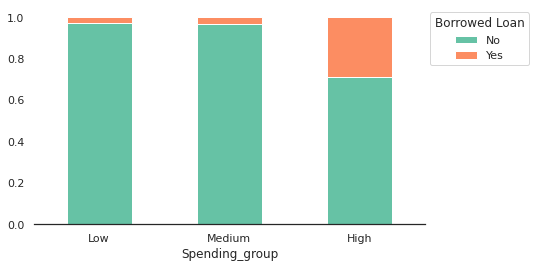

In [52]:
cat_columns=['Family','Education','SecuritiesAccount','CDAccount','CreditCard','Online','Regions','Agebin','Income_group','Spending_group']
for i, variable in enumerate(cat_columns):
       stacked_plot(df_loan[variable])

**Observations**
- Number of Customers  with Family size of  3 who had  borrowed loans from the bank is greatet than other family size
- 60 of those who had Personal loan with the bank also had Securities_Account.
- Customers who had certificate of deposit  with the bank had previously borrowed loan
- Customers using Online facilities has no impact on personal loan
- Majority customers who did have Personal loan with the bank did not used CrediCard from other banks.
- Majority customers who had take personal loan before are from LosAngeles and Bay region.
- Ratio of borrowing loan is high in 30 and below and 60 and above customers.
- Customer with high average Monthly spending have bought personal loan before
- As expected Age and experience are highly correlated and one of them can be dropped. Since experience had negative values dropping experience would be better option.


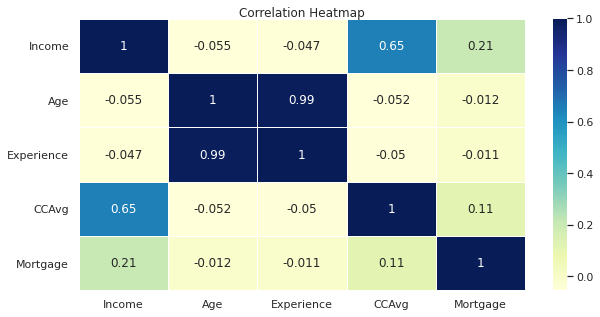

In [53]:
plt.figure(figsize=(10,5))
numerical=['Income','Age','Experience','CCAvg','Mortgage']

# A better color to see the positive or negative correlation of each variable
heatmap = sns.heatmap(df_loan[numerical].corr(), annot=True, cmap='YlGnBu',linewidths=0.5)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

### Check  distrubution in target column

([<matplotlib.patches.Wedge at 0x79e085e55550>,
 [Text(-1.0503312798154913, 0.3268091226406516, ''),
  Text(1.0503312721659712, -0.3268091472254298, '')],
 [Text(-0.5729079708084497, 0.1782595214403554, '90.4%'),
  Text(0.5729079666359843, -0.1782595348502344, '9.6%')])

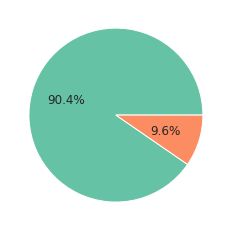

In [54]:

plt.pie(data=df_loan,x=df_loan["PersonalLoan"].value_counts(),autopct='%1.1f%%')

The target variable personal_loan is highly imbalanced where only 9.6% of the customers have previously opted for a personal loan in the dataset. This can be handled using weight or SMOTE.But for now we will carry with on without SMOTE

In [55]:
df_loan.head()

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0   25           1      49   91107      4 1.60000         1         0   
1   45          19      34   90089      3 1.50000         1         0   
2   39          15      11   94720      1 1.00000         1         0   
3   35           9     100   94112      1 2.70000         2         0   
4   35           8      45   91330      4 1.00000         2         0   

  PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0            0                 1         0      0          0   
1            0                 1         0      0          0   
2            0                 0         0      0          0   
3            0                 0         0      0          0   
4            0                 0         0      0          1   

                 County Agebin Income_group Spending_group             Regions  
0    Los Angeles County  18-30        Lower         Medium  Los Angeles Region  
1    Los Angeles County  41-50        Lower         Medium  Los Angeles Region  
2        Alameda County  31-40        Lower         Medium            Bay Area  
3  San Francisco County  31-40       Middle           High            Bay Area  
4    Los Angeles County  31-40        Lower         Medium  Los Angeles Region

In [56]:

# Saving dataset before treating outliers for logistic regression.
df_Decision = df_loan.copy()


## Insights based on EDA

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the Personal_loan which is of categorical data type.
* Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
* There were no missing values in the dataset.

**Data Cleaning:**

* We observed that some observations where experience = -ve but since there was a strong correlation with age , we dropped experience.
* There are 450 unique zipcode, we mapped it to counties. They were further mapped to regions to reduce the dimension of data and we now have only 5 distinct values in the data.
* We also created Age bin ,Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.

**Observations from EDA:**
- People with higher income had opted for personal loan before.
- People with high mortgages opted for loan.
- Customers will higher average monthly credit usage have opted for loan.  
- Customers with Family of 3 members had  borrowed the loans with the bank.
- Education level 2: Graduate and 3: Advanced/Professional  have borrowed loans with the bank.
- Customers who had certificate of deposit  with the bank had previously borrowed loan
- Majority of customers who did have Personal loan with the bank used Online facilities.
- Majority customers who had take personal loan before are from LosAngeles region.
- Ratio of borrowing loan is high in 30 and below and 60 and above customers.
- The more income you get the more you spend and have a "large than life" lifestyle.

##### Customer segmentation for borrowing  loan based on EDA
 - Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.
 - Few Customer in medium income  group don't have higher mortages and have less average monthly credit card spending .They are average profile clients.
 - Customer in lower income group  have less mortages( few outliers are there) ,less monthly spending. They are our low profile clients.
  
   
**Actions for data pre-processing:**

* Many variables have outliers that need to be treated.
* We can drop Experience, Country,Zipcode and Agebin,Income_group,Spending_group.

In [57]:
import gc
import time
gc.collect()
time.sleep(5)

# Outliers detection

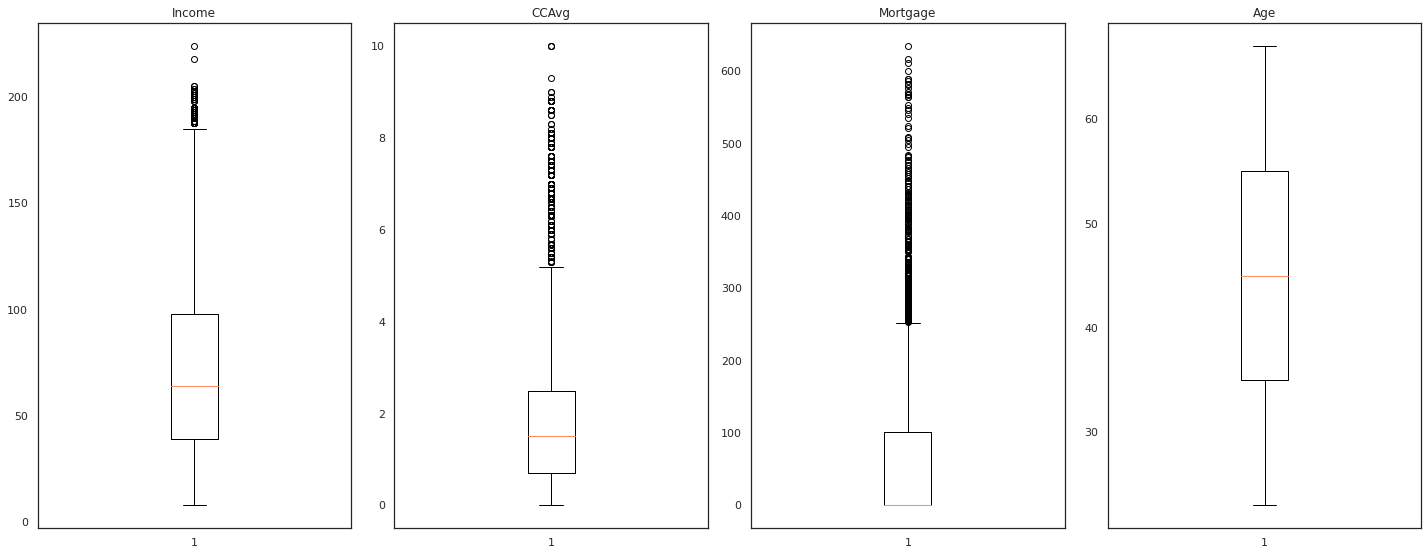

In [58]:
numeric_columns =['Income','CCAvg','Mortgage','Age']
# outlier detection using boxplot
plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(4,4,i+1)
                     plt.boxplot(df_loan[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [59]:
# Check Income extreme values
df_loan.sort_values(by=["Income"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
3896   48          24     224   93940      2 6.67000         1         0   
4993   45          21     218   91801      2 6.67000         1         0   
526    26           2     205   93106      1 6.33000         1       271   
2988   46          21     205   95762      2 8.80000         1       181   
677    46          21     204   92780      2 2.80000         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
4993            0                 0         0      1          0   
526             0                 0         0      0          1   
2988            0                 1         0      1          0   
677             0                 0         0      1          0   

                    County Agebin Income_group Spending_group  \
3896       Monterey County  41-50         High           High   
4993    Los Angeles County  41-50         High           High   
526   Santa Barbara County  18-30         High           High   
2988      El Dorado County  41-50         High           High   
677          Orange County  41-50         High           High   

                 Regions  
3896            Bay Area  
4993  Los Angeles Region  
526             Southern  
2988             Central  
677             Southern

In [60]:
df_loan.loc[(df_loan['Age']==48) & (df_loan['Experience']==24)].sort_values(by=['Income'],ascending=False).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
3896   48          24     224   93940      2 6.67000         1         0   
196    48          24     165   93407      1 5.00000         1         0   
2217   48          24     162   91355      4 3.30000         2       446   
4629   48          24     148   91311      2 3.30000         1         0   
4167   48          24     144   94025      4 3.50000         2         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
3896            0                 0         1      1          1   
196             0                 0         0      0          1   
2217            1                 0         1      1          0   
4629            0                 0         1      1          1   
4167            1                 0         0      0          0   

                      County Agebin Income_group Spending_group  \
3896         Monterey County  41-50         High           High   
196   San Luis Obispo County  41-50         High           High   
2217      Los Angeles County  41-50         High           High   
4629      Los Angeles County  41-50         High           High   
4167        San Mateo County  41-50         High           High   

                 Regions  
3896            Bay Area  
196             Southern  
2217  Los Angeles Region  
4629  Los Angeles Region  
4167            Bay Area

In [61]:
# Check Mortgage extreme values
df_loan.sort_values(by=["Mortgage"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
2934   37          13     195   91763      2 6.50000         1       635   
303    49          25     195   95605      4 3.00000         1       617   
4812   29           4     184   92126      4 2.20000         3       612   
1783   53          27     192   94720      1 1.70000         1       601   
4842   49          23     174   95449      3 4.60000         2       590   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2934            0                 0         0      1          0   
303             1                 0         0      0          0   
4812            1                 0         0      1          0   
1783            0                 0         0      1          0   
4842            1                 0         0      0          0   

                     County Agebin Income_group Spending_group   Regions  
2934  San Bernardino County  31-40         High           High  Southern  
303             Yolo County  41-50         High           High   Central  
4812       San Diego County  18-30         High         Medium  Southern  
1783         Alameda County  51-60         High         Medium  Bay Area  
4842       Mendocino County  41-50         High           High  Superior

In [62]:
# Check CCAVg extreme values
df_loan.sort_values(by=["CCAvg"],ascending = False).head(5)

Age  Experience  Income ZIPCode Family    CCAvg Education  Mortgage  \
2101   35           5     203   95032      1 10.00000         3         0   
2337   43          16     201   95054      1 10.00000         2         0   
787    45          15     202   91380      3 10.00000         3         0   
3943   61          36     188   91360      1  9.30000         2         0   
1339   52          25     180   94545      2  9.00000         2       297   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
2101            1                 0         0      0          0   
2337            1                 0         0      0          1   
787             1                 0         0      0          0   
3943            1                 0         0      0          0   
1339            1                 0         0      1          0   

                  County  Agebin Income_group Spending_group  \
2101  Santa Clara County   31-40         High           High   
2337  Santa Clara County   41-50         High           High   
787   Los Angeles County   41-50         High           High   
3943      Ventura County  60-100         High           High   
1339      Alameda County   51-60         High           High   

                 Regions  
2101            Bay Area  
2337            Bay Area  
787   Los Angeles Region  
3943            Southern  
1339            Bay Area

This is some really extreme values in income 224K USD compared to same age group and experience. Values for Credit card and Mortages looks fine.After identifying outliers, we can decide whether to remove/treat them or not. It depends,here I am  not going to treat them as there will be outliers in real case scenario (in Income, Mortgage value, Average spending on the credit card, etc) and we would want our model to learn the underlying pattern for such customers.

In [63]:
df_loan

Age  Experience  Income ZIPCode Family   CCAvg Education  Mortgage  \
0      25           1      49   91107      4 1.60000         1         0   
1      45          19      34   90089      3 1.50000         1         0   
2      39          15      11   94720      1 1.00000         1         0   
3      35           9     100   94112      1 2.70000         2         0   
4      35           8      45   91330      4 1.00000         2         0   
...   ...         ...     ...     ...    ...     ...       ...       ...   
4995   29           3      40   92697      1 1.90000         3         0   
4996   30           4      15   92037      4 0.40000         1        85   
4997   63          39      24   93023      2 0.30000         3         0   
4998   65          40      49   90034      3 0.50000         2         0   
4999   28           4      83   92612      3 0.80000         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0               0                 1         0      0          0   
1               0                 1         0      0          0   
2               0                 0         0      0          0   
3               0                 0         0      0          0   
4               0                 0         0      0          1   
...           ...               ...       ...    ...        ...   
4995            0                 0         0      1          0   
4996            0                 0         0      1          0   
4997            0                 0         0      0          0   
4998            0                 0         0      1          0   
4999            0                 0         0      1          1   

                    County  Agebin Income_group Spending_group  \
0       Los Angeles County   18-30        Lower         Medium   
1       Los Angeles County   41-50        Lower         Medium   
2           Alameda County   31-40        Lower         Medium   
3     San Francisco County   31-40       Middle           High   
4       Los Angeles County   31-40        Lower         Medium   
...                    ...     ...          ...            ...   
4995         Orange County   18-30        Lower         Medium   
4996      San Diego County   18-30        Lower            Low   
4997        Ventura County  60-100        Lower            Low   
4998    Los Angeles County  60-100        Lower            Low   
4999         Orange County   18-30       Middle         Medium   

                 Regions  
0     Los Angeles Region  
1     Los Angeles Region  
2               Bay Area  
3               Bay Area  
4     Los Angeles Region  
...                  ...  
4995            Southern  
4996            Southern  
4997            Southern  
4998  Los Angeles Region  
4999            Southern  

[4999 rows x 18 columns]

In [64]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   ZIPCode            4999 non-null   category
 4   Family             4999 non-null   category
 5   CCAvg              4999 non-null   float64 
 6   Education          4999 non-null   category
 7   Mortgage           4999 non-null   int64   
 8   PersonalLoan       4999 non-null   category
 9   SecuritiesAccount  4999 non-null   category
 10  CDAccount          4999 non-null   category
 11  Online             4999 non-null   category
 12  CreditCard         4999 non-null   category
 13  County             4999 non-null   category
 14  Agebin             4999 non-null   category
 15  Income_group       4999 non-null   category
 16  Spendi

# Drop column which we don't need for modelling

In [65]:
df_Decision=df_loan.copy()

In [66]:
df_loan.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [67]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Income             4999 non-null   int64   
 2   Family             4999 non-null   category
 3   CCAvg              4999 non-null   float64 
 4   Education          4999 non-null   category
 5   Mortgage           4999 non-null   int64   
 6   PersonalLoan       4999 non-null   category
 7   SecuritiesAccount  4999 non-null   category
 8   CDAccount          4999 non-null   category
 9   Online             4999 non-null   category
 10  CreditCard         4999 non-null   category
 11  Regions            4999 non-null   object  
dtypes: category(7), float64(1), int64(3), object(1)
memory usage: 398.5+ KB


 We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we will only make dummies for Regions and Education.

In [68]:
X = df_loan.drop(['PersonalLoan'], axis=1)
Y = df_loan['PersonalLoan']

# One-Hot Encoder

In [69]:
oneHotCols=['Regions','Education']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [70]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [71]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

# Model building Logistic Regression

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person will buy a loan but he actually doesn't.(Loss of Resource)
2. Predicting a person will not buy a loan but he actually does.(Loss of Opportunity)

### Which case is more important? 
* The whole purpose of the campagin is to bring in more customers. 2nd case is more important to us .A potential customer is missed by the sales/marketing team .It's lost of opportunity.So we want to minimize this loss.

### How to reduce losses?i.e need to reduce False Negatives ?
* In this case, not being able to identify a potential customer is the biggest loss we can face. Hence, recall is the right metric to check the performance of the model.Banks wants Recall to be maximized, greater the recall lesser the chances of false negatives.
* We can use accuracy but since the data is imbalanced it would not be the right metric to check the model performance.
*  Therefore, `Recall` should be maximized, the greater the Recall higher the chances of identifying both the classes correctly.

In [72]:
def make_confusion_matrix(y_actual,y_predict,title):
    fig, ax = plt.subplots(1, 1)
    
    cm = confusion_matrix(y_actual, y_predict, labels=[0,1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=["No","Yes"])
    disp.plot(cmap='Greens',colorbar=True,ax=ax)
    ax.set_title(title)
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.grid(b=None,axis='both',which='both',visible=False)
    plt.show()
   

In [73]:
def get_metrics_score(model,X_train_df,X_test_df,y_train_pass,y_test_pass,statsklearn,threshold=0.5,flag=True,roc=False):
    '''
    Function to calculate different metric scores of the model - Accuracy, Recall, Precision, and F1 score
    model: classifier to predict values of X
    X_train_df, X_test_df: Independent features
    y_train_pass,y_test_pass: Dependent variable
    statsklearn : 0 if calling for Sklearn model else 1
    threshold: thresold for classifiying the observation as 1
    flag: If the flag is set to True then only the print statements showing different will be displayed. The default value is set to True.
    roc: If the roc is set to True then only roc score will be displayed. The default value is set to False.
    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    if statsklearn==0:
        pred_train = model.predict(X_train_df)
        pred_test = model.predict(X_test_df)
    else:
        pred_train = (model.predict(X_train_df)>threshold)
        pred_test = (model.predict(X_test_df)>threshold)
    
    
    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(y_train_pass,pred_train)
    test_acc = accuracy_score(y_test_pass,pred_test)
    
    train_recall = recall_score(y_train_pass,pred_train)
    test_recall = recall_score(y_test_pass,pred_test)
    
    train_precision = precision_score(y_train_pass,pred_train)
    test_precision = precision_score(y_test_pass,pred_test)
    
    train_f1 = f1_score(y_train_pass,pred_train)
    test_f1 = f1_score(y_test_pass,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
      
    if flag == True: 
        print("\x1b[0;30;47m \033[1mMODEL PERFORMANCE\x1b[0m")
        print("\x1b[0;30;47m \033[1mAccuracy   : Train:\x1b[0m",
              round(accuracy_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(accuracy_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mRecall     : Train:\x1b[0m"
              ,round(recall_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m" ,
              round(recall_score(y_test_pass,pred_test),3))
        
        print("\x1b[0;30;47m \033[1mPrecision  : Train:\x1b[0m",
              round(precision_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m ",
              round(precision_score(y_test_pass,pred_test),3))
        print("\x1b[0;30;47m \033[1mF1         : Train:\x1b[0m",
              round(f1_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m",
              round(f1_score(y_test_pass,pred_test),3))
        make_confusion_matrix(y_train_pass,pred_train,"Confusion Matrix for Train")     
        make_confusion_matrix(y_test_pass,pred_test,"Confusion Matrix for Test") 
   
    if roc == True:
        
        print("\x1b[0;30;47m \033[1mROC-AUC Score  :Train:\x1b[0m: ",
              round(roc_auc_score(y_train_pass,pred_train),3),
              "\x1b[0;30;47m \033[1mTest:\x1b[0m: ",
              round(roc_auc_score(y_test_pass,pred_test),3))
    
    return score_list # returning the list with train and test scores

In [74]:
# # defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

def add_score_model(score):
     '''Add scores to list so that we can compare all models score together'''   
     acc_train.append(score[0])
     acc_test.append(score[1])
     recall_train.append(score[2])
     recall_test.append(score[3])
     precision_train.append(score[4])
     precision_test.append(score[5])
     f1_train.append(score[6])
     f1_test.append(score[7])

## Logistic Regression (with Sklearn library)

 MODEL PERFORMANCE
 Accuracy   : Train: 0.658  Test:  0.65
 Recall     : Train: 0.979  Test: 0.986
 Precision  : Train: 0.217  Test:  0.214
 F1         : Train: 0.355  Test: 0.351


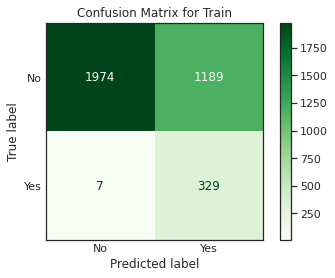

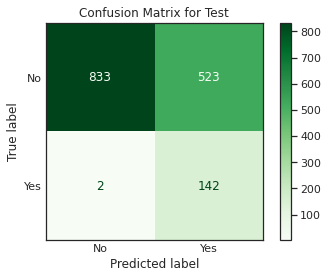

In [75]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False,class_weight={0:0.15,1:0.85})
model  = lr.fit(X_train_scaled_df,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_Sklearn = get_metrics_score(model,X_train_scaled_df,X_test_scaled_df,y_train,y_test,statmodel)


In [76]:
add_score_model(scores_Sklearn)

In [77]:
gc.collect()
time.sleep(5)

# ***Logistic Regression (with Statmodel)

Optimization terminated successfully.
         Current function value: 0.113898
         Iterations 9
 MODEL PERFORMANCE
 Accuracy   : Train: 0.962  Test:  0.953
 Recall     : Train: 0.688  Test: 0.653
 Precision  : Train: 0.888  Test:  0.817
 F1         : Train: 0.775  Test: 0.726


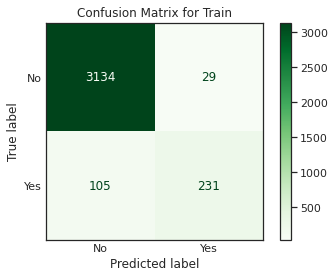

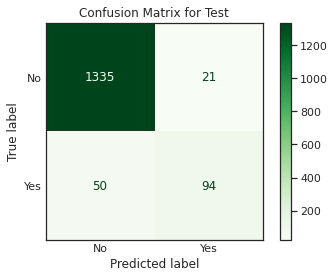

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6399
Time:                        19:24:23   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [78]:
# adding constant to training and test set
X_train_stat = sm.add_constant(X_train_scaled_df)
X_test_stat = sm.add_constant(X_test_scaled_df)
statmodel=1  #0 for sklearn and 1 for statmodel
logit = sm.Logit( y_train, X_train_stat.astype(float) )
lg = logit.fit(warn_convergence=False)

# Let's check model performances for this model
scores_statmodel = get_metrics_score(lg,X_train_stat,X_test_stat,y_train,y_test,statmodel)
lg.summary() 

# Test Assumption**

#### MultiCollinearity

**we will have to  check and remove multicollinearity from the data to get reliable coefficients and p-values.** 
There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.* General Rule of thumb: If VIF is 1 then there is no correlation among the predictor and the remaining predictor variables. Whereas if VIF exceeds 5, we say it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

In [79]:
# changing datatype of colums to numeric for checking vif
X_train_num = X_train_stat.astype(float).copy()

In [80]:
vif_series1 = pd.Series([variance_inflation_factor(X_train_num.values,i) for i in range(X_train_num.shape[1])],index=X_train_num.columns, dtype = float)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        1.00000
Age                          1.01012
Income                       1.90786
Family                       1.05016
CCAvg                        1.74332
Mortgage                     1.06417
SecuritiesAccount            1.15538
CDAccount                    1.35839
Online                       1.04689
CreditCard                   1.11481
Regions_Central              1.11765
Regions_Los Angeles Region   1.22077
Regions_Southern             1.24130
Regions_Superior             1.02791
Education_2                  1.28721
Education_3                  1.25893
dtype: float64



**Observations:**
There is no correlation between predicator variables


In [81]:
lg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3483
Method:                           MLE   Df Model:                           15
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6399
Time:                        19:24:27   Log-Likelihood:                -398.53
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                5.492e-293
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -5.2604      0.236    -22.276      0.000      -5.723      -4.798
Age                            0.1547      0.096      1.618      0.106      -0.033       0.342
Income                         3.0106      0.177     17.055      0.000       2.665       3.357
Family                         0.7829      0.108      7.278      0.000       0.572       0.994
CCAvg                          0.2176      0.094      2.310      0.021       0.033       0.402
Mortgage                       0.0874      0.073      1.206      0.228      -0.055       0.230
SecuritiesAccount             -0.2303      0.112     -2.056      0.040      -0.450      -0.011
CDAccount                      0.8431      0.100      8.459      0.000       0.648       1.038
Online                        -0.3423      0.099     -3.457      0.001      -0.536      -0.148
CreditCard                    -0.3662      0.116     -3.153      0.002      -0.594      -0.139
Regions_Central               -0.1968      0.111     -1.781      0.075      -0.413       0.020
Regions_Los Angeles Region    -0.0451      0.102     -0.444      0.657      -0.244       0.154
Regions_Southern              -0.0149      0.104     -0.143      0.886      -0.219       0.189
Regions_Superior              -0.3143      0.216     -1.456      0.145      -0.737       0.109
Education_2                    1.8569      0.150     12.375      0.000       1.563       2.151
Education_3                    1.9912      0.152     13.101      0.000       1.693       2.289
==============================================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**In this case  'Regions' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.**



In [82]:
X_train1 = X_train_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
X_test1= X_test_stat.drop(['Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'], axis = 1)
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(warn_convergence =False)

lg1.summary()

Optimization terminated successfully.
         Current function value: 0.114762
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           11
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6371
Time:                        19:24:28   Log-Likelihood:                -401.55
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                7.885e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1980      0.230    -22.607      0.000      -5.649      -4.747
Age                   0.1507      0.095      1.585      0.113      -0.036       0.337
Income                2.9923      0.174     17.158      0.000       2.650       3.334
Family                0.7735      0.107      7.240      0.000       0.564       0.983
CCAvg                 0.2112      0.093      2.266      0.023       0.028       0.394
Mortgage              0.0806      0.072      1.116      0.264      -0.061       0.222
SecuritiesAccount    -0.2293      0.113     -2.036      0.042      -0.450      -0.009
CDAccount             0.8396      0.099      8.469      0.000       0.645       1.034
Online               -0.3457      0.099     -3.505      0.000      -0.539      -0.152
CreditCard           -0.3831      0.116     -3.298      0.001      -0.611      -0.155
Education_2           1.8450      0.149     12.388      0.000       1.553       2.137
Education_3           1.9776      0.151     13.123      0.000       1.682       2.273
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**The Pvalue for Mortgage is 0.264 So droping Mortage**

In [83]:
 X_train2 = X_train1.drop(['Mortgage'], axis = 1)
 X_test2= X_test1.drop(['Mortgage'], axis = 1)
 logit2 = sm.Logit(y_train, X_train2.astype(float))
 lg2 = logit2.fit()
 lg2.summary()

Optimization terminated successfully.
         Current function value: 0.114939
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           10
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6366
Time:                        19:24:29   Log-Likelihood:                -402.17
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                1.199e-296
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1941      0.230    -22.613      0.000      -5.644      -4.744
Age                   0.1492      0.095      1.572      0.116      -0.037       0.335
Income                3.0134      0.174     17.341      0.000       2.673       3.354
Family                0.7769      0.107      7.266      0.000       0.567       0.987
CCAvg                 0.1986      0.092      2.148      0.032       0.017       0.380
SecuritiesAccount    -0.2317      0.113     -2.059      0.040      -0.452      -0.011
CDAccount             0.8427      0.099      8.495      0.000       0.648       1.037
Online               -0.3437      0.098     -3.491      0.000      -0.537      -0.151
CreditCard           -0.3882      0.116     -3.348      0.001      -0.616      -0.161
Education_2           1.8369      0.148     12.371      0.000       1.546       2.128
Education_3           1.9659      0.150     13.110      0.000       1.672       2.260
=====================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Dropping Age as pvalue is greater than 0.05**

In [84]:
 X_train3 = X_train2.drop(['Age'], axis = 1)
 X_test3= X_test2.drop(['Age'], axis = 1)
 logit3 = sm.Logit(y_train, X_train3.astype(float))
 lg3 = logit3.fit()
 lg3.summary()

Optimization terminated successfully.
         Current function value: 0.115294
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           PersonalLoan   No. Observations:                 3499
Model:                          Logit   Df Residuals:                     3489
Method:                           MLE   Df Model:                            9
Date:                Mon, 10 Nov 2025   Pseudo R-squ.:                  0.6355
Time:                        19:24:30   Log-Likelihood:                -403.41
converged:                       True   LL-Null:                       -1106.6
Covariance Type:            nonrobust   LLR p-value:                3.200e-297
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.1735      0.228    -22.704      0.000      -5.620      -4.727
Income                3.0026      0.173     17.369      0.000       2.664       3.341
Family                0.7691      0.107      7.196      0.000       0.560       0.979
CCAvg                 0.1792      0.092      1.948      0.051      -0.001       0.360
SecuritiesAccount    -0.2338      0.112     -2.080      0.037      -0.454      -0.014
CDAccount             0.8444      0.099      8.522      0.000       0.650       1.039
Online               -0.3354      0.098     -3.417      0.001      -0.528      -0.143
CreditCard           -0.3854      0.116     -3.322      0.001      -0.613      -0.158
Education_2           1.8329      0.148     12.361      0.000       1.542       2.123
Education_3           1.9513      0.149     13.106      0.000       1.659       2.243
=====================================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

CCavg is important parameter as per EDA so not dropping it

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


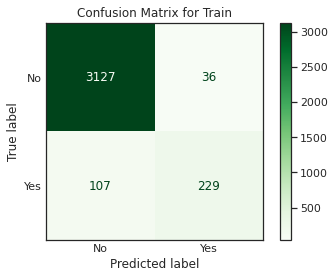

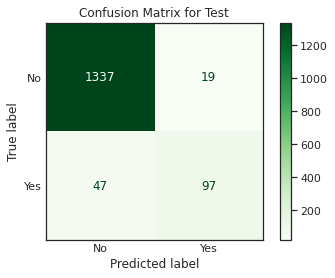

In [85]:
# Let's check model performances for this model

scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)
add_score_model(scores_statmodel)

#### ROC-AUC curve 


#### Roc -Auc curve on Train data

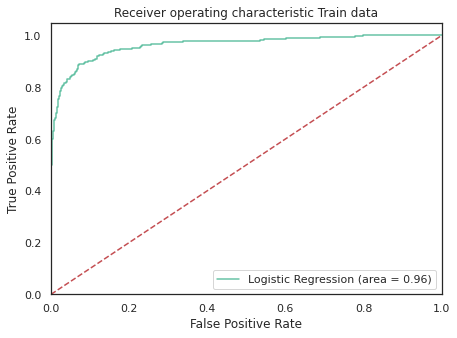

In [86]:
logit_roc_auc_train = roc_auc_score(y_train, lg3.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg3.predict(X_train3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_train)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Train data')
plt.legend(loc="lower right")
plt.show()

#### Roc -Auc curve on Test data

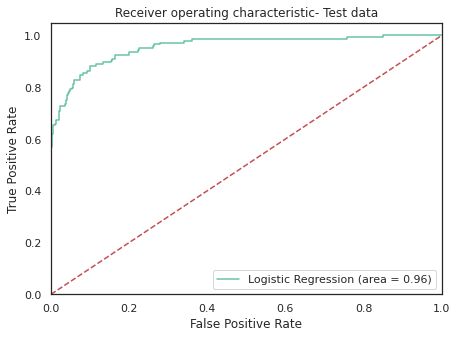

In [87]:
logit_roc_auc_test = roc_auc_score(y_test, lg3.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg3.predict(X_test3))
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic- Test data')
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a generalized performance on training and test set.
* ROC-AUC score of 0.96 on training and test set is quite good.

#### Coefficient interpretations

* Coefficient of  Income, Education, Family,CCavg,CD account,Age,  are positive , ie a one unit  increase in these will lead to increase in chances of a person borrowing loan
* Coefficient of Securities account,online ,Credit card are negative, increase in these will lead to decrease in chances of a person borrowing a loan.

####  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)
* The percentage change in odds is given as odds = (exp(b) - 1) * 100

In [88]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg3.params, columns=['coef'])
lgcoef.loc[:, "Odds Ratio"] = np.exp(lgcoef.coef)
lgcoef['Probability'] = lgcoef['Odds Ratio']/(1+lgcoef['Odds Ratio'])
lgcoef['Percentage Change of Odds']=(np.exp(lg3.params)-1)*100
lgcoef['pval']=lg3.pvalues
pd.options.display.float_format = '{:.2f}'.format
lgcoef = lgcoef.sort_values(by="Odds Ratio", ascending=False)
lgcoef

coef  Odds Ratio  Probability  Percentage Change of Odds  \
Income             3.00       20.14         0.95                    1913.74   
Education_3        1.95        7.04         0.88                     603.79   
Education_2        1.83        6.25         0.86                     525.17   
CDAccount          0.84        2.33         0.70                     132.66   
Family             0.77        2.16         0.68                     115.78   
CCAvg              0.18        1.20         0.54                      19.63   
SecuritiesAccount -0.23        0.79         0.44                     -20.85   
Online            -0.34        0.72         0.42                     -28.50   
CreditCard        -0.39        0.68         0.40                     -31.98   
const             -5.17        0.01         0.01                     -99.43   

                   pval  
Income             0.00  
Education_3        0.00  
Education_2        0.00  
CDAccount          0.00  
Family             0.00  
CCAvg              0.05  
SecuritiesAccount  0.04  
Online             0.00  
CreditCard         0.00  
const              0.00

- Income: Holding all other features constant a 1 unit change in Income will increase the odds of a customer taking a personal loan by 20 times or a 95% chance of a customer taking personal loan.
- Family: Holding all other features constant a 1 unit change in Family will increase the odds of a customer taking a personal loan by 2.16 times increase in the odds of a customer taking personal loan.
- CCAvg: Holding all other features constant a 1 unit change in CCAvg will increase the odds of a customer taking a personal loan by 1.22 times or a 22.16% increase in the odds of a customer taking personal loan.
- Education Advance has  7 times higher chances of taking a personal loan than undergraduate
Interpretation for other attributes can be done similarly.

***Most overall significant varaibles  are Income,Education, CD account ,Family and CCAvg***

### Model performance evaluation and improvement

 MODEL PERFORMANCE
 Accuracy   : Train: 0.959  Test:  0.956
 Recall     : Train: 0.682  Test: 0.674
 Precision  : Train: 0.864  Test:  0.836
 F1         : Train: 0.762  Test: 0.746


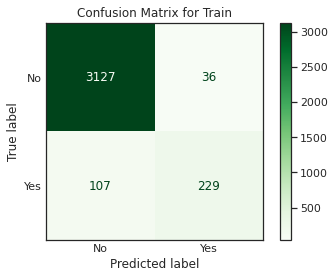

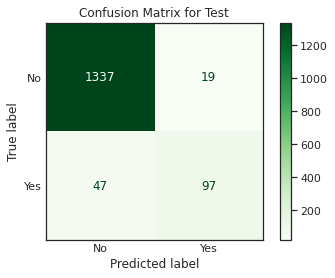

In [89]:
# Let's check model performances for this model
scores_LR = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel)

**Insights:**

**True Positives:**

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will take personal loan.
Outcome: The model is good.
    
**True Negatives**:

Reality: A customer didn't wanted to take personal loan.
Model Prediction: The customer will not take personal loan.
Outcome: The business is unaffected .

**False Positives** :

Reality: A customer didn't want to take personal loan.
Model Prediction: The customer will take personal loan.
Outcome: The team which is targeting the potential customers would waste their resources on the customers who will not be buying a personal loan.

**False Negatives**:

Reality: A customer wanted to take personal Loan.
Model Prediction: The customer will not take personal loan.
Outcome: The potential customer is missed by the salesteam. This is loss of oppurtunity. The purpose of campaign was to target such customers. If team knew about this customers, they could have offered some good APR /interest rates.

### **Right Metric to use:**
**Here not able to identify a potential customer is the biggest loss we can face. Hence, Recall is the right metric to check the performance of the model .We have  recall as `68` on train and `67` on test. False negative are `107` and `47` on train and test. We can further improve this score  using Optimal threshold for ROC AUC curve and precision recall curve**

#### Optimal threshold using AUC-ROC curve

In [90]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
#fpr, tpr, thresholds = metrics.roc_curve(y_test, lg2.predict(X_test2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09150126568446633


 MODEL PERFORMANCE
 Accuracy   : Train: 0.899  Test:  0.897
 Recall     : Train: 0.902  Test: 0.875
 Precision  : Train: 0.487  Test:  0.481
 F1         : Train: 0.633  Test: 0.621


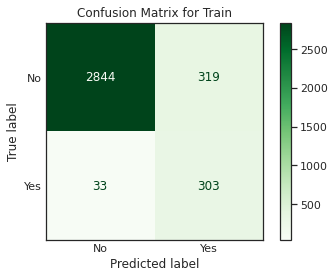

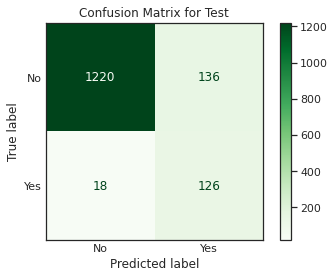

 ROC-AUC Score  :Train::  0.9  Test::  0.887


In [91]:
scores_statmodel = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_auc_roc,roc=True)
add_score_model(scores_statmodel)

With `0.092` Threshold the Recall score has improved  from `68%` to `87%` on test data with 89% accuracy. 
Also False negative  values has decreased to 18 from 46 for testdat. ROC-AUC score is 88 which is good.

##### Let's use Precision-Recall curve and see if we can find a better threshold

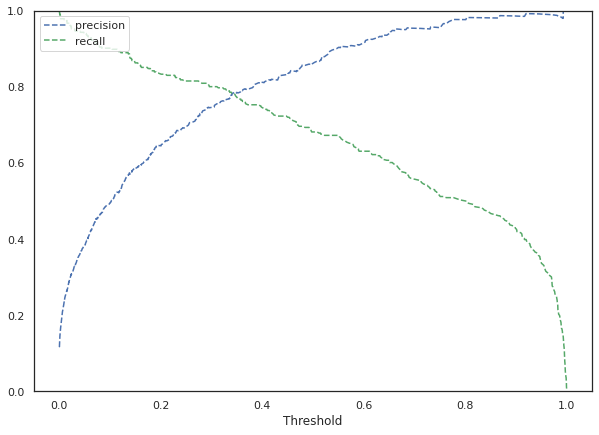

In [92]:
y_scores=lg3.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)

def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label = 'recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plt.figure(figsize=(10,7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

 MODEL PERFORMANCE
 Accuracy   : Train: 0.955  Test:  0.945
 Recall     : Train: 0.801  Test: 0.729
 Precision  : Train: 0.747  Test:  0.705
 F1         : Train: 0.773  Test: 0.717


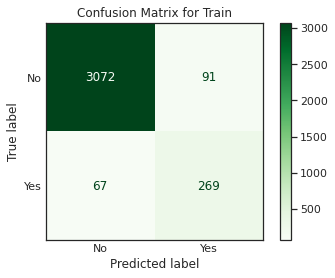

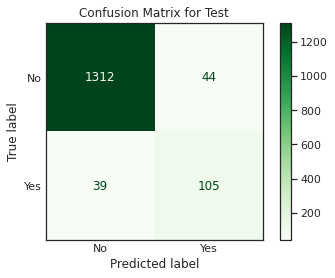

 ROC-AUC Score  :Train::  0.886  Test::  0.848


In [93]:
optimal_threshold_curve = 0.3

scores_opt_curve = get_metrics_score(lg3,X_train3,X_test3,y_train,y_test,statmodel,threshold=optimal_threshold_curve,roc=True)
add_score_model(scores_opt_curve)

With this model the False negative  cases have gone up and recall for test is 72 with 95 % accuracy.
Model is performing well on training and test set.
Model has given a balanced performance, if the bank wishes to maintain a balance between recall and precision this model can be used.
Area under the curve has decreased as compared to the initial model but the performance is generalized on training and test set.

# Using Sequential Feature Selection

In [94]:
X_train_seq=X_train_stat
X_test_seq=X_test_stat

In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.lin
X_train_seq.shape

(3499, 16)

In [96]:

statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 16,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2025-11-10 19:24:50] Features: 1/16 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2025-11-10 19:24:51] Features: 2/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2025-11-10 19:24:52] Features: 3/16 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [97]:
statmodel=0  #0 for sklearn and 1 for statmodel

clf = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
# Build step forward feature selection
sfs1 = sfs(clf,k_features = 11,forward=True,
           floating=False, scoring= 'recall',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train_seq, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    0.6s finished

[2025-11-10 19:25:09] Features: 1/11 -- score: 0.9941176470588236[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.8s finished

[2025-11-10 19:25:10] Features: 2/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.9s finished

[2025-11-10 19:25:11] Features: 3/11 -- score: 0.9970588235294118[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [98]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[1, 2, 4, 5, 6, 8, 9, 10, 11, 13, 14]


In [99]:
X_train_seq.columns[feat_cols]

Index(['Age', 'Income', 'CCAvg', 'Mortgage', 'SecuritiesAccount', 'Online',
       'CreditCard', 'Regions_Central', 'Regions_Los Angeles Region',
       'Regions_Superior', 'Education_2'],
      dtype='object')

## Now we will fit a sklearn model using these features only

In [100]:
X_train_final = X_train_seq[X_train_seq.columns[feat_cols]]
X_test_final = X_test_seq[X_train_final.columns]

 MODEL PERFORMANCE
 Accuracy   : Train: 0.677  Test:  0.686
 Recall     : Train: 0.997  Test: 0.972
 Precision  : Train: 0.229  Test:  0.231
 F1         : Train: 0.372  Test: 0.373


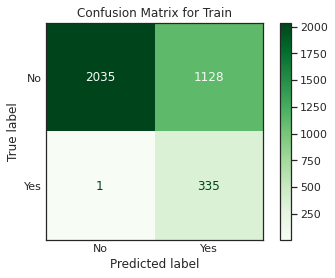

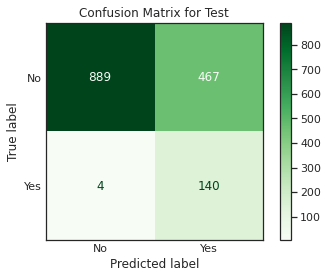

In [101]:
lr = LogisticRegression(solver='newton-cg',random_state=1,fit_intercept=False)
model  = lr.fit(X_train_final,y_train)

statmodel=0  #0 for sklearn and 1 for statmodel

# Let's check model performances for this model
scores_sfs = get_metrics_score(model,X_train_final,X_test_final,y_train,y_test,statmodel)
add_score_model(scores_sfs)

In [102]:
comparison_frame = pd.DataFrame({'Model':['Logistic Regression Model- Sklearn',
                                          'Logistic Regression Model - Statsmodels',
                                          'Logistic Regression - Optimal threshold = 0.092',
                                          'Logistic Regression - Optimal threshold = 0.3',
                                          'Logistic Regression - Sequential feature selection'
                                          ],
                                          'Train_Accuracy':acc_train, 
                                          'Test_Accuracy':acc_test,
                                          'Train Recall':recall_train,
                                          'Test Recall':recall_test, 
                                          'Train Precision':precision_train,
                                          'Test Precision':precision_test,
                                          'Train F1':f1_train,
                                          'Test F1':f1_test
                                })
                                    
    
                                       

comparison_frame

Model  Train_Accuracy  \
0                  Logistic Regression Model- Sklearn            0.66   
1             Logistic Regression Model - Statsmodels            0.96   
2     Logistic Regression - Optimal threshold = 0.092            0.90   
3       Logistic Regression - Optimal threshold = 0.3            0.95   
4  Logistic Regression - Sequential feature selection            0.68   

   Test_Accuracy  Train Recall  Test Recall  Train Precision  Test Precision  \
0           0.65          0.98         0.99             0.22            0.21   
1           0.96          0.68         0.67             0.86            0.84   
2           0.90          0.90         0.88             0.49            0.48   
3           0.94          0.80         0.73             0.75            0.70   
4           0.69          1.00         0.97             0.23            0.23   

   Train F1  Test F1  
0      0.35     0.35  
1      0.76     0.75  
2      0.63     0.62  
3      0.77     0.72  
4      0.37     0.37

Since we want higher Recall with higher accuracy  Optimal Threshold 0.3 seems to be a good choice. Lets explore a model with decison tree if this score can be improved further.

# Model building Decision Tree
- Data preparation
- Partition the data into train and test set.
- Built a CART model on the train data.
- Tune the model and prune the tree, if required.
- Test the data on test set.

In [103]:
df_Decision

Age  Experience  Income ZIPCode Family  CCAvg Education  Mortgage  \
0      25           1      49   91107      4   1.60         1         0   
1      45          19      34   90089      3   1.50         1         0   
2      39          15      11   94720      1   1.00         1         0   
3      35           9     100   94112      1   2.70         2         0   
4      35           8      45   91330      4   1.00         2         0   
...   ...         ...     ...     ...    ...    ...       ...       ...   
4995   29           3      40   92697      1   1.90         3         0   
4996   30           4      15   92037      4   0.40         1        85   
4997   63          39      24   93023      2   0.30         3         0   
4998   65          40      49   90034      3   0.50         2         0   
4999   28           4      83   92612      3   0.80         1         0   

     PersonalLoan SecuritiesAccount CDAccount Online CreditCard  \
0               0                 1         0      0          0   
1               0                 1         0      0          0   
2               0                 0         0      0          0   
3               0                 0         0      0          0   
4               0                 0         0      0          1   
...           ...               ...       ...    ...        ...   
4995            0                 0         0      1          0   
4996            0                 0         0      1          0   
4997            0                 0         0      0          0   
4998            0                 0         0      1          0   
4999            0                 0         0      1          1   

                    County  Agebin Income_group Spending_group  \
0       Los Angeles County   18-30        Lower         Medium   
1       Los Angeles County   41-50        Lower         Medium   
2           Alameda County   31-40        Lower         Medium   
3     San Francisco County   31-40       Middle           High   
4       Los Angeles County   31-40        Lower         Medium   
...                    ...     ...          ...            ...   
4995         Orange County   18-30        Lower         Medium   
4996      San Diego County   18-30        Lower            Low   
4997        Ventura County  60-100        Lower            Low   
4998    Los Angeles County  60-100        Lower            Low   
4999         Orange County   18-30       Middle         Medium   

                 Regions  
0     Los Angeles Region  
1     Los Angeles Region  
2               Bay Area  
3               Bay Area  
4     Los Angeles Region  
...                  ...  
4995            Southern  
4996            Southern  
4997            Southern  
4998  Los Angeles Region  
4999            Southern  

[4999 rows x 18 columns]

In [104]:
#drop column which we don't need for modelling
df_Decision.drop(columns=["Agebin", "ZIPCode","County",'Experience','Income_group','Spending_group'], inplace=True)

In [105]:
X_dt = df_Decision.drop('PersonalLoan', axis=1)
y_dt = df_Decision['PersonalLoan']

In [106]:
#oneHotCols=['Regions']
oneHotCols=X_dt.select_dtypes(exclude='number').columns.to_list()
X_dt=pd.get_dummies(X_dt,columns=oneHotCols,drop_first=True)
# Spliting data set
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.3, random_state=1, stratify=y_dt)

#### Build Model
* We are using  'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* To handle this imbalanced data set,we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.
* Since not being able to identify a potential customer is the biggest loss as mentioned  earlier with logistic regression. Hence, recall is the right metric to check the performance of the model.

In [107]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train_dt)
    ytest_predict = model.predict(X_test_dt)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train_dt,y_train_dt),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test_dt,y_test_dt))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train_dt,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test_dt,ytest_predict))
    make_confusion_matrix(y_train_dt,ytrain_predict,"Confusion Matric on Train Data")
    make_confusion_matrix(y_test_dt,ytest_predict,"Confusion Matric on Test Data")

# since data is imbalanced adding weights

 Accuracy : Train : 1.0  Test: 0.984
 Recall   : Train : 1.0  Test: 0.9027777777777778


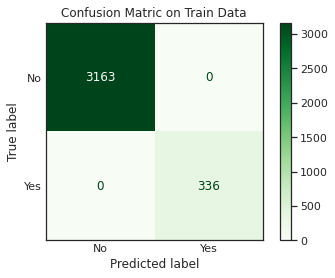

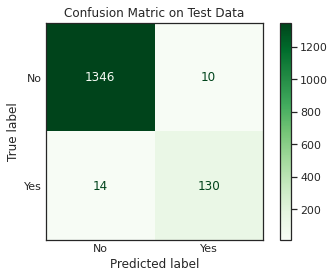

In [108]:
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train_dt, y_train_dt)
get_recall_score(model)

Decision tree tends to Overfit and the disparity between the Recall on Train and Test suggest that the model is overfitted

### Visualizing the Decision Tree

In [109]:
column_names = list(X_dt.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'CCAvg', 'Mortgage', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'SecuritiesAccount_1', 'CDAccount_1', 'Online_1', 'CreditCard_1', 'Regions_Central', 'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']


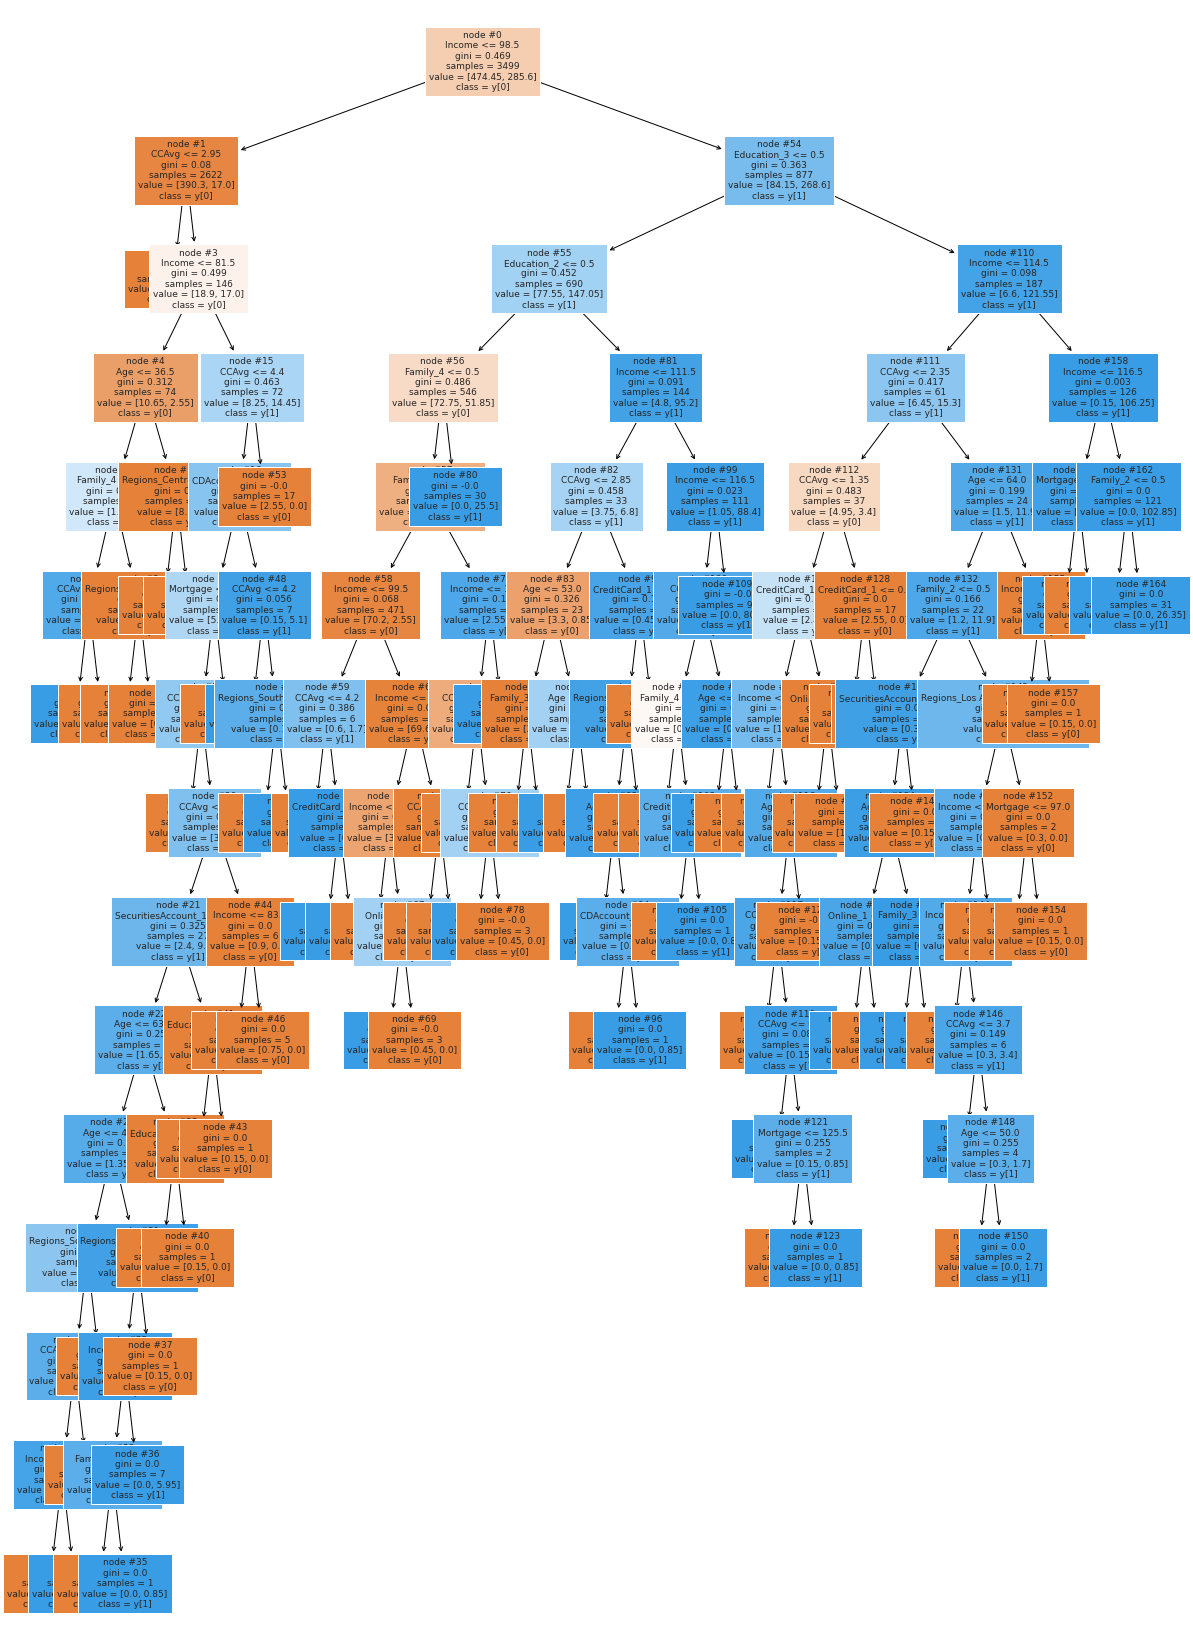

In [110]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [111]:
# Text report showing the rules of a decision tree -
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |   |--- weights: [1.35, 0.00] class: 0
|   |   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- Regions_Central <= 0.50
|   |   |   |   |   |--- weights: [8.25, 0.00] class: 0
|   |   |   |   |--- Regions_Central >  0.50
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount_1 <= 0.50
|  

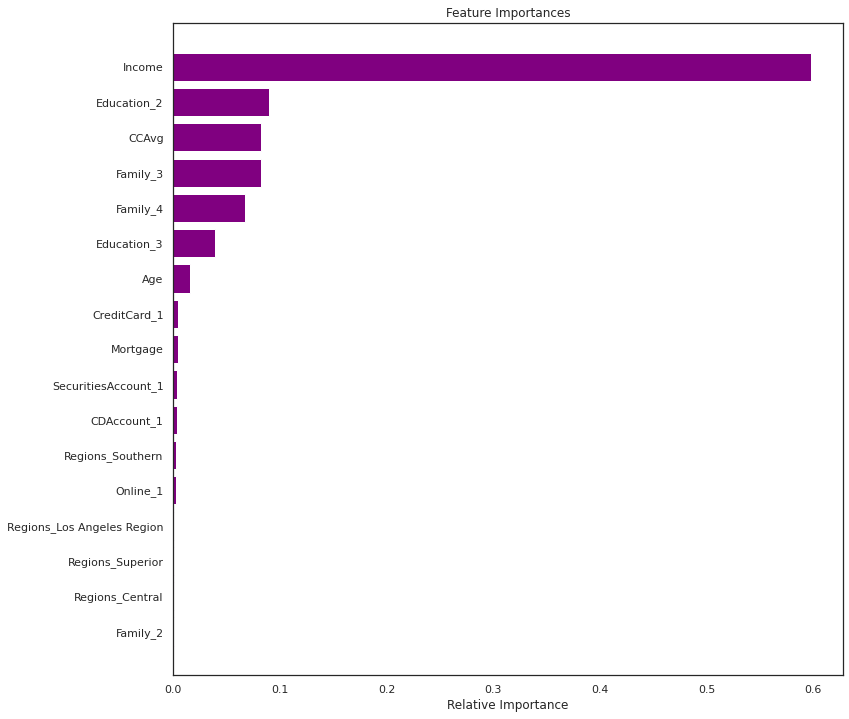

In [112]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Using GridSearch for Hyperparameter tuning of our tree model 
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.
* Let's see if we can improve our model performance even more.


In [113]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [5, 10,15,20,25,30],
              }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_dt, y_train_dt)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_
estimator

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=30, min_samples_leaf=2,
                       random_state=1)

In [114]:
# Fit the best algorithm to the data. 
estimator.fit(X_train_dt, y_train_dt)
ytrain_predict=estimator.predict(X_train_dt)
ytest_predict=estimator.predict(X_test_dt)

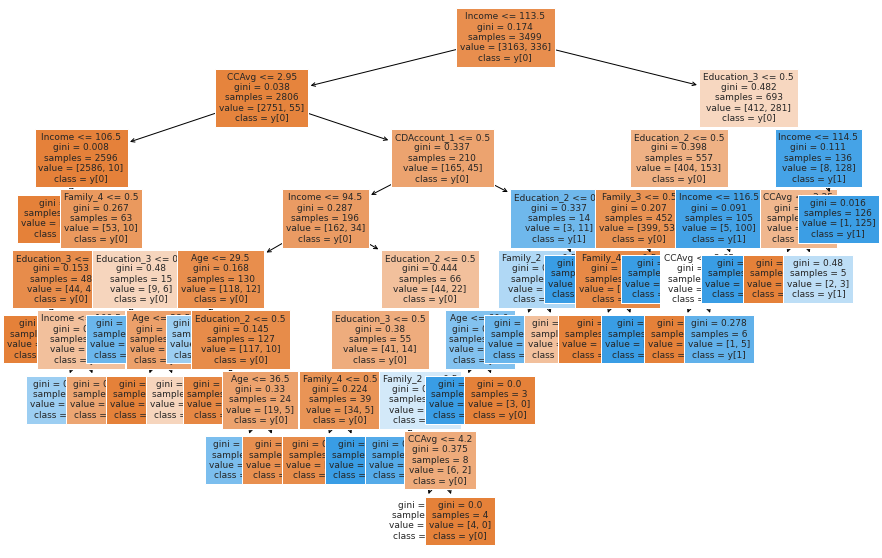

In [115]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

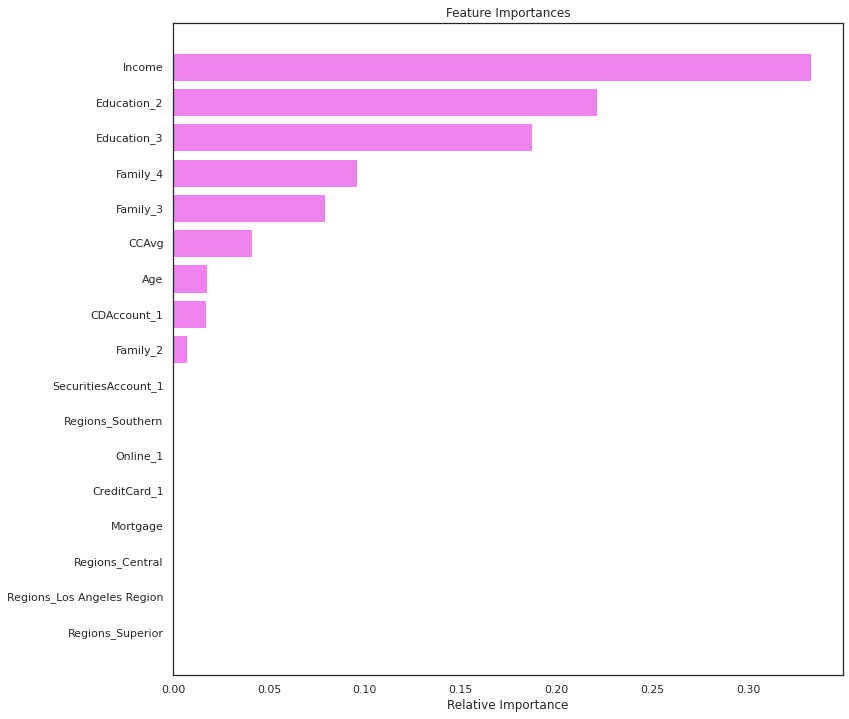

In [116]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 Accuracy : Train : 0.992283509574164  Test: 0.984
 Recall   : Train : 0.9494047619047619  Test: 0.9166666666666666


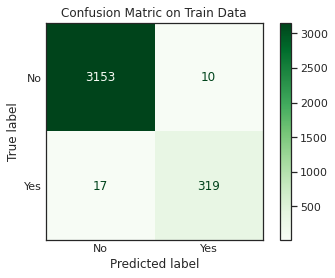

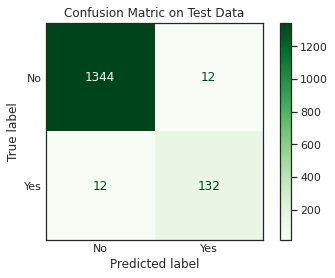

In [117]:
get_recall_score(estimator)

- With HyperParameter `max_depth=6, max_leaf_nodes=20, min_samples_leaf=7` the overfitting on  train has reduced, but the recall for test has not improved.
- Important features are Income,Education 2 and Education 3, Family 4, Family 3, CCavg & Age.
- But the recall metric is still 91 and false negatives are 12.We don't want to loose opportunity in predicting this customers. so  Let see if instead of pre pruning , post pruning helps in reducing false negative.

# Cost Complexity Pruning

In [118]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train_dt, y_train_dt)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

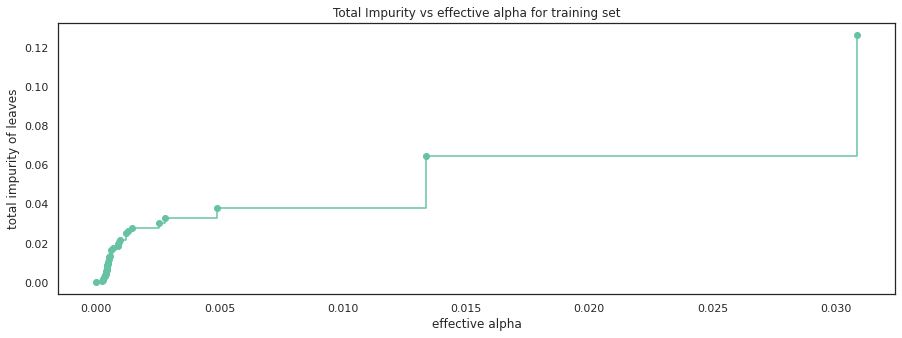

In [119]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. We will set these values of alpha and pass it to the ccp_alpha parameter of our DecisionTreeClassifier. By looping over the alphas array, we will find the accuracy on both Train and Test parts of our dataset.



In [120]:
clfs = []
accuracy_train=[]
accuracy_test=[]
recall_train=[]
recall_test=[]
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha,class_weight = {0:0.15,1:0.85})
    clf.fit(X_train_dt, y_train_dt)
    y_train_pred=clf.predict(X_train_dt)
    y_test_pred=clf.predict(X_test_dt)
    accuracy_train.append(clf.score(X_train_dt,y_train_dt))
    accuracy_test.append(clf.score(X_test_dt,y_test_dt))
    recall_train.append(metrics.recall_score(y_train_dt,y_train_pred))
    recall_test.append(metrics.recall_score(y_test_dt,y_test_pred))
    clfs.append(clf)
    


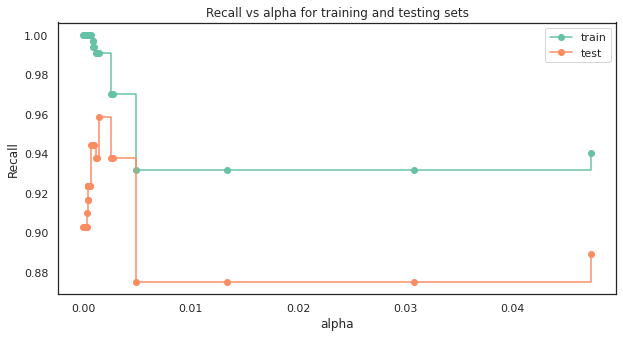

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
   

We are gettingt a higher recall on test data between 0.002  to 0.005. Will choose alpha as **0.002.**

#### Creating model with 0.002 ccp_alpha

In [122]:
best_model = DecisionTreeClassifier(ccp_alpha=0.002,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)
best_model.fit(X_train_dt, y_train_dt)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

 Accuracy : Train : 0.9794226921977708  Test: 0.9753333333333334
 Recall   : Train : 0.9791666666666666  Test: 0.9583333333333334


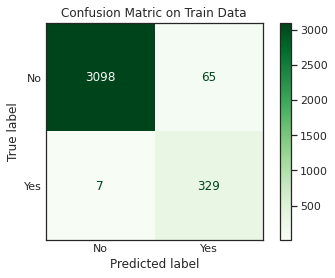

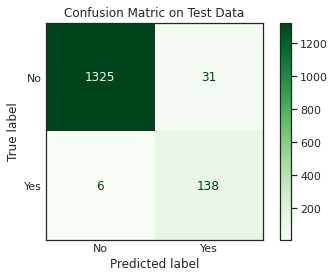

In [123]:
get_recall_score(best_model)

**The Recall on train  and  test indicate we have created a generalized model. with 96 % accuracy and reduced False negatives.**

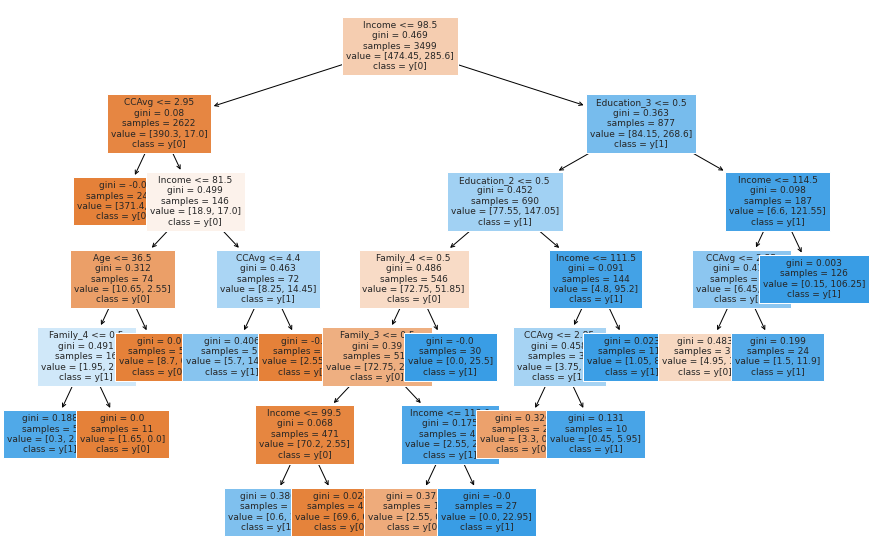

In [124]:
plt.figure(figsize=(15,10))

out = tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=False,class_names=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family_4 <= 0.50
|   |   |   |   |   |--- weights: [0.30, 2.55] class: 1
|   |   |   |   |--- Family_4 >  0.50
|   |   |   |   |   |--- weights: [1.65, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- weights: [5.70, 14.45] class: 1
|   |   |   |--- CCAvg >  4.40
|   |   |   |   |--- weights: [2.55, 0.00] class: 0
|--- Income >  98.50
|   |--- Education_3 <= 0.50
|   |   |--- Education_2 <= 0.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- Family_3 <= 0.50
|   |   |   |   |   |--- Income <= 99.50
|   |   |   |   |   |   |--- weights: [0.60, 1.70] class: 1
|   |   |   |   |   |--- Income >  99.50
|   |   |   |   |   |   |--- weights: [69.60, 0.85] class: 0
|   

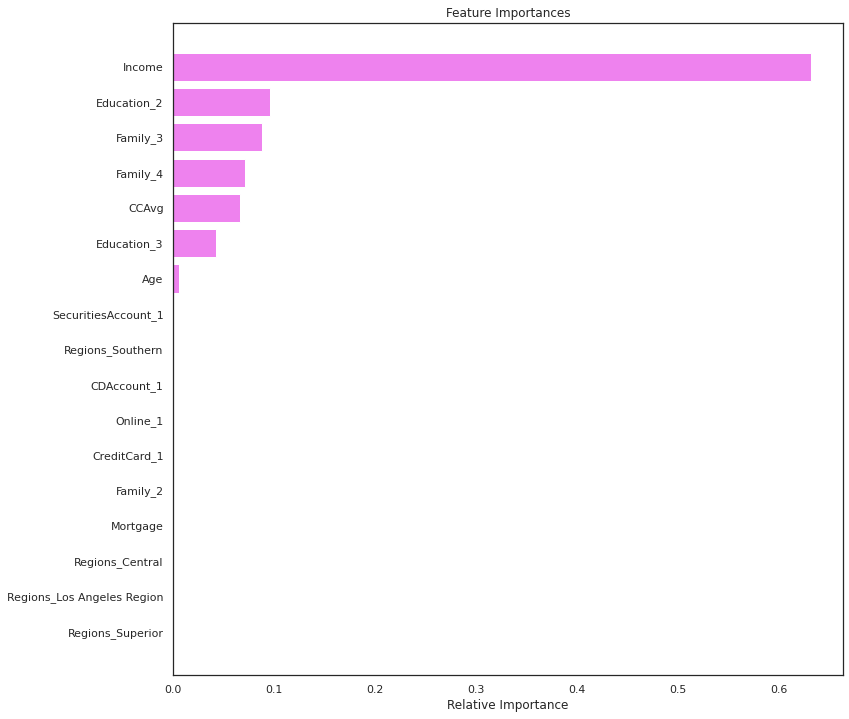

In [126]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- We are getting  a higher recall on test data between 0.002  to 0.005. Will choosed alpha as 0.002.
- The Recall on train  and  test indicate we have created a generalized model. with 96 % accuracy and reduced False  negatives.
- Important features : Income, Graduate education, Family member  3 and 4, Ccavg, Advanced education, Age.
- This is the best model as false negative is only 6 on Testdata.


### Comparing all the models based on Model Performance

In [127]:
comparison_frame = pd.DataFrame({'Model':['Logisitic Regression with Optimal Threshold 0.104',
                                          'Initial decision tree model',
                                          'Decision treee with hyperparameter tuning',
                                          'Decision tree with post-pruning'], 
                                          'Train_accuracy':[0.92,1,0.99,0.98],
                                          'Test_accuracy':[0.91,0.98,0.98,0.97],
                                          'Train_Recall':[0.90,1,0.92,0.98], 
                                          'Test_Recall':[0.88,0.86,0.84,0.96]})  

comparison_frame

Model  Train_accuracy  \
0  Logisitic Regression with Optimal Threshold 0.104            0.92   
1                        Initial decision tree model            1.00   
2          Decision treee with hyperparameter tuning            0.99   
3                    Decision tree with post-pruning            0.98   

   Test_accuracy  Train_Recall  Test_Recall  
0           0.91          0.90         0.88  
1           0.98          1.00         0.86  
2           0.98          0.92         0.84  
3           0.97          0.98         0.96

**Decision tree model post pruning has given us best recall scores on data with 97% accuracy . Exploratory data analysis  also suggested income and education were important features in deciding if person will borrow personal loan.
so choosing  Decision Tree with post-pruning for our prediction.**

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1356
           1       0.82      0.96      0.88       144

    accuracy                           0.98      1500
   macro avg       0.91      0.97      0.93      1500
weighted avg       0.98      0.98      0.98      1500



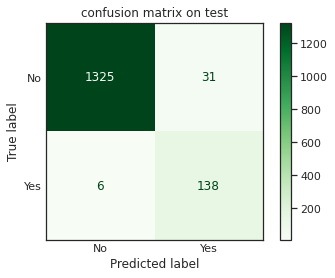

In [128]:
y_pred = best_model.predict(X_test_dt)
print(classification_report(y_test_dt,y_pred))
make_confusion_matrix(y_test,y_pred,"confusion matrix on test")

**Observation**

- After Post Pruning ,the false negative has reduced to 6.The accuracy on test data is 97% & Recall is 97% after choosing optimal cc-alpha. 


# Conclusion

- We analyzed the Personal Loan campaign data using EDA and by using different models like Logistic Regression and Decision Tree Classifier to build a likelihood of Customer buying Loan.
- First we built model using Logistic Regression and performance metric used was Recall. The most important features for classification were Income,Education, CD account ,Family and CCAvg .
- Coefficient of Income, Graduate and Advanced Education, Family_3,Family 4,CCavg,CD account,Age, are positive , ie a one unit increase in these will lead to increase in chances of a person borrowing loan
- Coefficient of Securities account,online ,Family_2 credit card are negative increase in these will lead to decrease in chances of a person borrowing a loan.
- We also improved the performance using  ROC-AUC curve and optimal threshold .This was best model with high recall and accuracy .
- Decision tree can easily overfit. They require less datapreprocessing  compared to logistic Regression and are easy to understand.
- We used decision trees  with prepruning and post pruning. The Post pruning model gave 96 % recall with 97% accuracy.
- Income, Customers with graduate degree, customers having 3 family members are some of the most  important variables in predicting if the customers will purchase a personal loan.


# Actionable Insights & Recommendations

### Misclassification Analysis

In [129]:
misclass_df = X_test_dt.copy()

In [130]:
misclass_df['Actual']=y_test_dt
misclass_df['Predicted'] = y_pred

([<matplotlib.patches.Wedge at 0x79e08cb8bf90>,
 [Text(-1.050350983068654, 0.3267457916587637, ''),
  Text(1.0503509677725784, -0.32674584082924163, '')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.5729187096941336, -0.17822500408867725, '9.6%')])

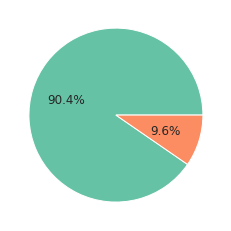

In [131]:
plt.pie(data=misclass_df,x=misclass_df["Actual"].value_counts(),autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x79e08ed32190>,
 [Text(-1.031810979134434, 0.3812690694740925, ''),
  Text(1.031810979134434, -0.3812690694740926, '')],
 [Text(-0.5628059886187822, 0.20796494698586862, '88.7%'),
  Text(0.5628059886187822, -0.20796494698586868, '11.3%')])

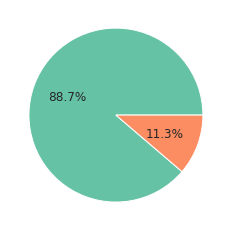

In [132]:
plt.pie(data=misclass_df,x=misclass_df["Predicted"].value_counts(),autopct='%1.1f%%')

Percentage of value predicted by our model has been very close to the actual values. Lets find out False Negative and False Positive observations

In [133]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],margins=True)

Actual        0    1   All
Predicted                 
0          1325    6  1331
1            31  138   169
All        1356  144  1500

<AxesSubplot:xlabel='Predicted'>

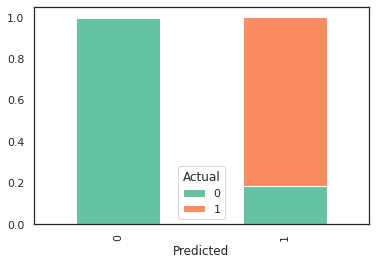

In [134]:
pd.crosstab(misclass_df['Predicted'],misclass_df['Actual'],normalize='index').plot(kind='bar',stacked=True)

In [135]:
# Rows that were classified as Negative when they were actually positive
fn_rows = misclass_df[(misclass_df['Actual'] == 1) & (misclass_df['Predicted'] == 0)]

In [136]:
False_negative= df_Decision[df_Decision.index.isin(fn_rows.index.values)].copy()
False_negative

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
322    63     101      1   3.90         1         0            1   
1069   44      75      2   3.50         1         0            1   
1518   43      64      4   3.00         3       221            1   
2533   54     111      1   1.10         2         0            1   
2623   42     111      3   3.00         1         0            1   
2996   42     103      1   3.33         1         0            1   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
322                  1         1      1          0            Southern  
1069                 0         0      1          0  Los Angeles Region  
1518                 0         0      1          0            Bay Area  
2533                 0         0      1          0            Southern  
2623                 1         1      0          1            Bay Area  
2996                 1         1      1          1  Los Angeles Region

**Our model predicted 6 customers wrongly. On analyzing the Income , Education,Family , we can see the income is not in range of High income group and education is undergrad for most of them and there average spending is also low.  These cases are some exceptions.**

In [137]:
# Rows that were classified as postive when they were actually negative
fp_rows = misclass_df[(misclass_df['Actual'] == 0) & (misclass_df['Predicted'] == 1)]
fp_rows
False_Positive= df_Decision[df_Decision.index.isin(fp_rows.index.values)].copy()
False_Positive

Age  Income Family  CCAvg Education  Mortgage PersonalLoan  \
10     65     105      4   2.40         3         0            0   
82     41      82      1   4.00         3         0            0   
185    39     115      1   1.00         3         0            0   
621    41     114      2   1.80         2         0            0   
640    43      85      1   3.70         3       327            0   
683    40      82      1   3.60         2         0            0   
731    28      90      2   3.30         1         0            0   
746    62      85      4   3.40         2         0            0   
792    41      98      1   4.00         3         0            0   
932    51     112      3   1.80         2         0            0   
950    32     112      4   1.80         2         0            0   
973    43      85      1   4.00         3       287            0   
986    53     101      4   4.90         1         0            0   
1263   35      85      4   4.00         3         0            0   
1303   29     112      2   2.00         2       382            0   
1401   40      84      1   3.70         3         0            0   
1910   43      83      2   3.80         3       112            0   
2437   65     114      4   3.40         2         0            0   
3064   59      83      3   4.40         1         0            0   
3081   36      78      2   4.50         3       204            0   
3263   32      84      4   3.40         1         0            0   
3322   41     104      1   4.00         3         0            0   
3409   29     113      2   2.00         2        84            0   
3468   43     113      2   1.80         2         0            0   
3754   63     112      4   2.40         3         0            0   
4419   42      85      1   3.70         3       272            0   
4492   56      91      1   3.00         3         0            0   
4570   32      99      2   4.50         3       249            0   
4671   39     104      1   4.00         3         0            0   
4678   33     115      1   2.70         2       283            0   
4815   58      99      2   1.40         1         0            0   

     SecuritiesAccount CDAccount Online CreditCard             Regions  
10                   0         0      0          0            Bay Area  
82                   0         0      1          0            Southern  
185                  0         0      1          0            Southern  
621                  0         0      1          0  Los Angeles Region  
640                  1         0      1          0            Bay Area  
683                  0         0      0          0  Los Angeles Region  
731                  0         0      1          1  Los Angeles Region  
746                  0         0      1          0            Bay Area  
792                  0         0      0          1            Southern  
932                  1         1      1          1            Bay Area  
950                  0         0      1          0            Bay Area  
973                  0         0      1          0            Southern  
986                  0         0      1          0  Los Angeles Region  
1263                 0         0      1          0            Southern  
1303                 1         0      0          0            Bay Area  
1401                 0         0      1          0            Bay Area  
1910                 0         0      0          0             Central  
2437                 0         0      0          1            Bay Area  
3064                 0         0      1          0            Bay Area  
3081                 0         0      1          1            Bay Area  
3263                 0         0      1          0            Southern  
3322                 0         1      1          1            Southern  
3409                 0         0      1          1             Central  
3468                 0         0      0          1            Bay Area  
3754

On analyzing the  Education , we can see most of them  have  education as Advance or Graduate . These cases are some exceptions.

### Recommendation 

- Decision trees doesn't require to much data preparation or handling of outliers like logistic regression. They are easy to understand. Decision tress can easily overfit , so we have to be careful using decision tree.
- Based on EDA, logistic Regression , Decision tree , Income ,Educatoin,Family,CCavg are most  important factor.
- Customers who have income above 98k dollars , Advance/graduate level education, a family of more than 2, such customers have higher chances of taking personal loans.
- So for this campaign we can have different profiles for customers.
- `High Profile Clients` :-Higher income,Advanced/Graduate level education, 3 /4 Family members,high spending
- `Average Profile` :- Medium income  group,Graduate level education.3/4Family members,medium spending
- `Low Profile`:-Lower income group,undergrads ,3/4Family Member,low spending
-  Customer Average Spending and Mortages can also be looked upon as based on EDA and logistic Regression this parameters also play some role in likelihood of buy loan.
- We can 1st  target high profile customers , by providing them with a personal relationship managers who can address there concerns and  can pursue them to buy loan from the bank with completive interest rates.
- Prequalifying for Loan can also attract more customers.
- Our 2nd target would be Medium profile customers. 
- The model cannot identify  well if there are some exceptional cases when low profile customer is ready to buy a personal  loan.


# Handeling Data Imbalance

In [138]:
gc.collect()
time.sleep(5)

In [139]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, StandardScaler
from sklearn.naive_bayes import ComplementNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
from scipy import stats
from sklearn.base import clone 
%matplotlib inline

In [140]:
df = pd.read_csv('/kaggle/input/personal-loan-modeling/Bank_Personal_Loan_Modelling.csv')
df.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4   1.60          1         0   
1   2   45          19      34     90089       3   1.50          1         0   
2   3   39          15      11     94720       1   1.00          1         0   
3   4   35           9     100     94112       1   2.70          2         0   
4   5   35           8      45     91330       4   1.00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [141]:
df.drop('ID', axis=1, inplace=True) 

Let's compare Spearman's correlation with Pearson's correlation:

- Pearson works with a linear relationship between the two variables whereas the Spearman works with monotonic relationships as well.
- Pearson works with raw data values of the variables whereas Spearman works with rank-ordered variables.

When the variables have a "might be monotonic, might be linear" relationship, our best bet is to use Spearman rather than Pearson

In [142]:
# Define a colormap
royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
royalblue_r = royalblue.reversed()

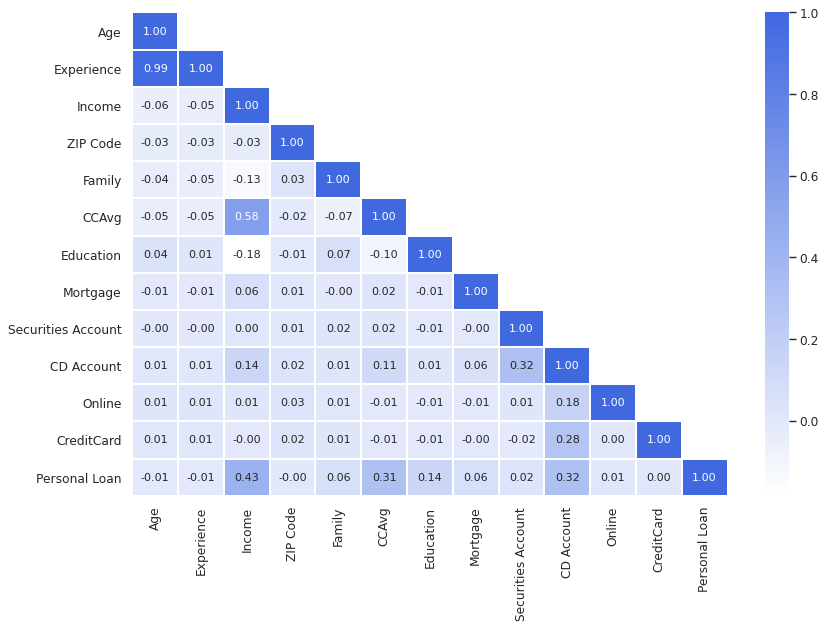

In [143]:
# Calculation of the Spearman correlation
target = 'Personal Loan'
df_ordered = pd.concat([df.drop(target,axis=1), df[target]],axis=1)
corr = df_ordered.corr(method='spearman')

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=royalblue, fmt='.2f', linewidths=0.2)
plt.show()


Personal Loan is highly correlated with Income, CD_Account, CCAvg.
Experience is highly correlated with Age. (ρ = 0.99)
CCAvg is correlated with Income to a good extent. (ρ = 0.58)

# Data Cleansing
## Noise treatment


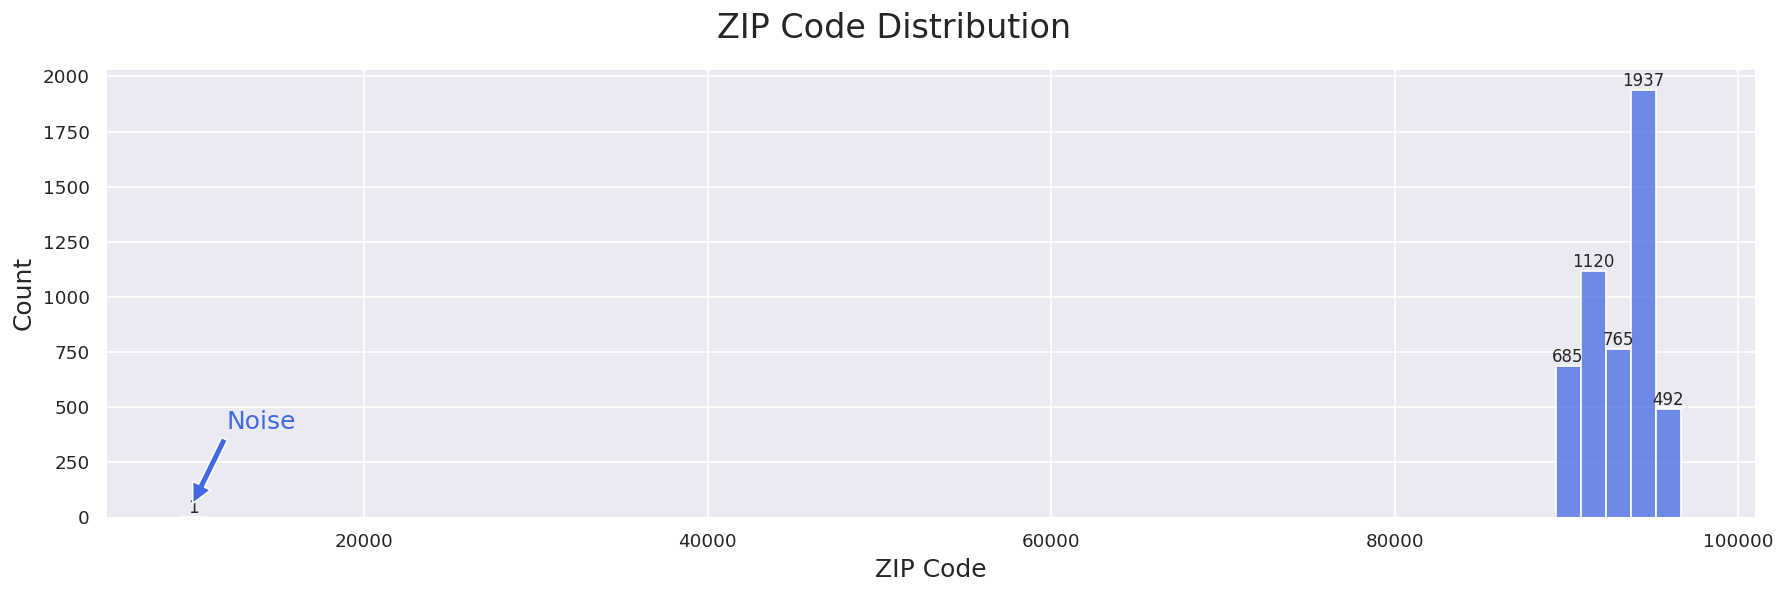

In [144]:
# Set the style of the graph
sns.set_style('darkgrid')
color = 'royalblue'

# Plot histogram
plt.figure(figsize=(15,5), dpi=120)
graph = sns.histplot(x='ZIP Code', data=df, bins=60, color=color)

# Show non-zero values of the individual bars
labels = [str(v) if v else '' for v in graph.containers[0].datavalues]
graph.bar_label(graph.containers[0], labels=labels)

plt.annotate('Noise', xy=(10000,60), xytext=(12000,400), color=color, fontsize=15, 
             arrowprops=dict(facecolor=color, shrink=0.01))
plt.xlabel('ZIP Code', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.suptitle('ZIP Code Distribution', fontsize=20)
plt.tight_layout()
plt.show()

In [145]:
df[df['ZIP Code']<20000]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4   0.60          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

We found 1 noisy data in ZIP Code. We drop the corresponding sample because it contains 4 digits, while the other values of this feature all have 5 digits:

In [146]:
df.drop(df[df['ZIP Code']<20000].index, inplace=True)
df.reset_index(drop=True, inplace =True)

the dataset contains negative values for Experience. Considering that the values of this feature indicate work experience in years, these negative values are considered noise:

In [147]:
df[df['Experience']<0]['Experience'].count()

52

In [148]:
df[df['Experience']<0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

Since the number of these noise values in the Experience feature is small, we assume that these values are incorrectly recorded as negative and replace them with their absolute value:

In [149]:
df['Experience'] = df['Experience'].apply(abs)

# Outlier Treatment

Outliers are data points that are significantly higher or lower than most other values in the set.

**Kurtosis** is a measure of the "tailedness" or shape of a distribution. If the Kurtosis value is greater than 3, it is likely that the variable contains outliers. This is because excessive kurtosis indicates that the data points have a higher concentration in the tails than normal, which may indicate the presence of outliers.

In 3d step, of all the continuous features, only the Mortgage feature had a kurtosis value above 3. To detect possible outliers in this feature, we use Z-score technique

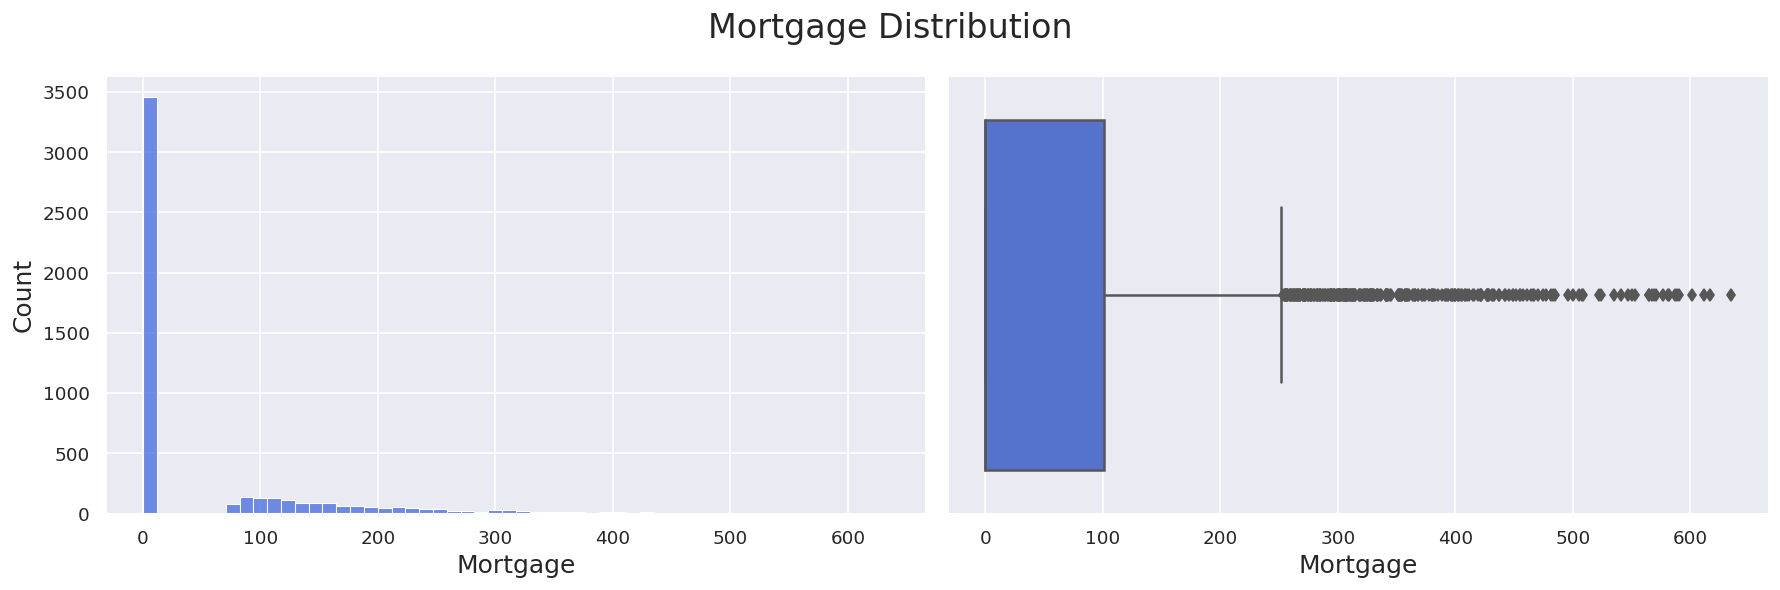

In [150]:
sns.set(rc = {'axes.labelsize' : 15})               
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=120)
sns.histplot(x='Mortgage', data=df, color='royalblue', ax=ax[0])
sns.boxplot(x='Mortgage', data=df, color='royalblue', ax=ax[1])
plt.suptitle('Mortgage Distribution', fontsize=20)
plt.tight_layout()
plt.show()

**The Z-score method** for outlier detection is a statistical technique used to detect outliers from data sets by calculating how many standard deviations away from the mean each data point is. A data point with a Z score of more than 3 standard deviation away from the mean is considered an outlier. We use the scipy.stats module to perform the zscore technique:

In [151]:
df[stats.zscore(df['Mortgage'])>3]['Mortgage'].count()

105

We found 105 records with a Z-score mortgage value greater than 3. Therefore, we consider these 105 records as outliers and filter out these records from our dataset:

In [152]:
outlier_indexes = df[stats.zscore(df['Mortgage'])>3].index
df.drop(outlier_indexes, inplace=True)
df.reset_index(drop=True, inplace=True)

# Missing Value Treatment

In [153]:
df.isnull().sum().sum()

0

# Duplicate Values Treatment

In [154]:
df[df.duplicated(keep=False)].sum().sum()

0.0

#  Feature Transformation

In the dataset, CCAVG represents average monthly credit card spending, but Income represents the amount of annual income. To make the units of the features equal, we convert average monthly credit card spending to annual:

In [155]:
df['CCAvg'] = df['CCAvg']*12

# Categorical Features vs Target

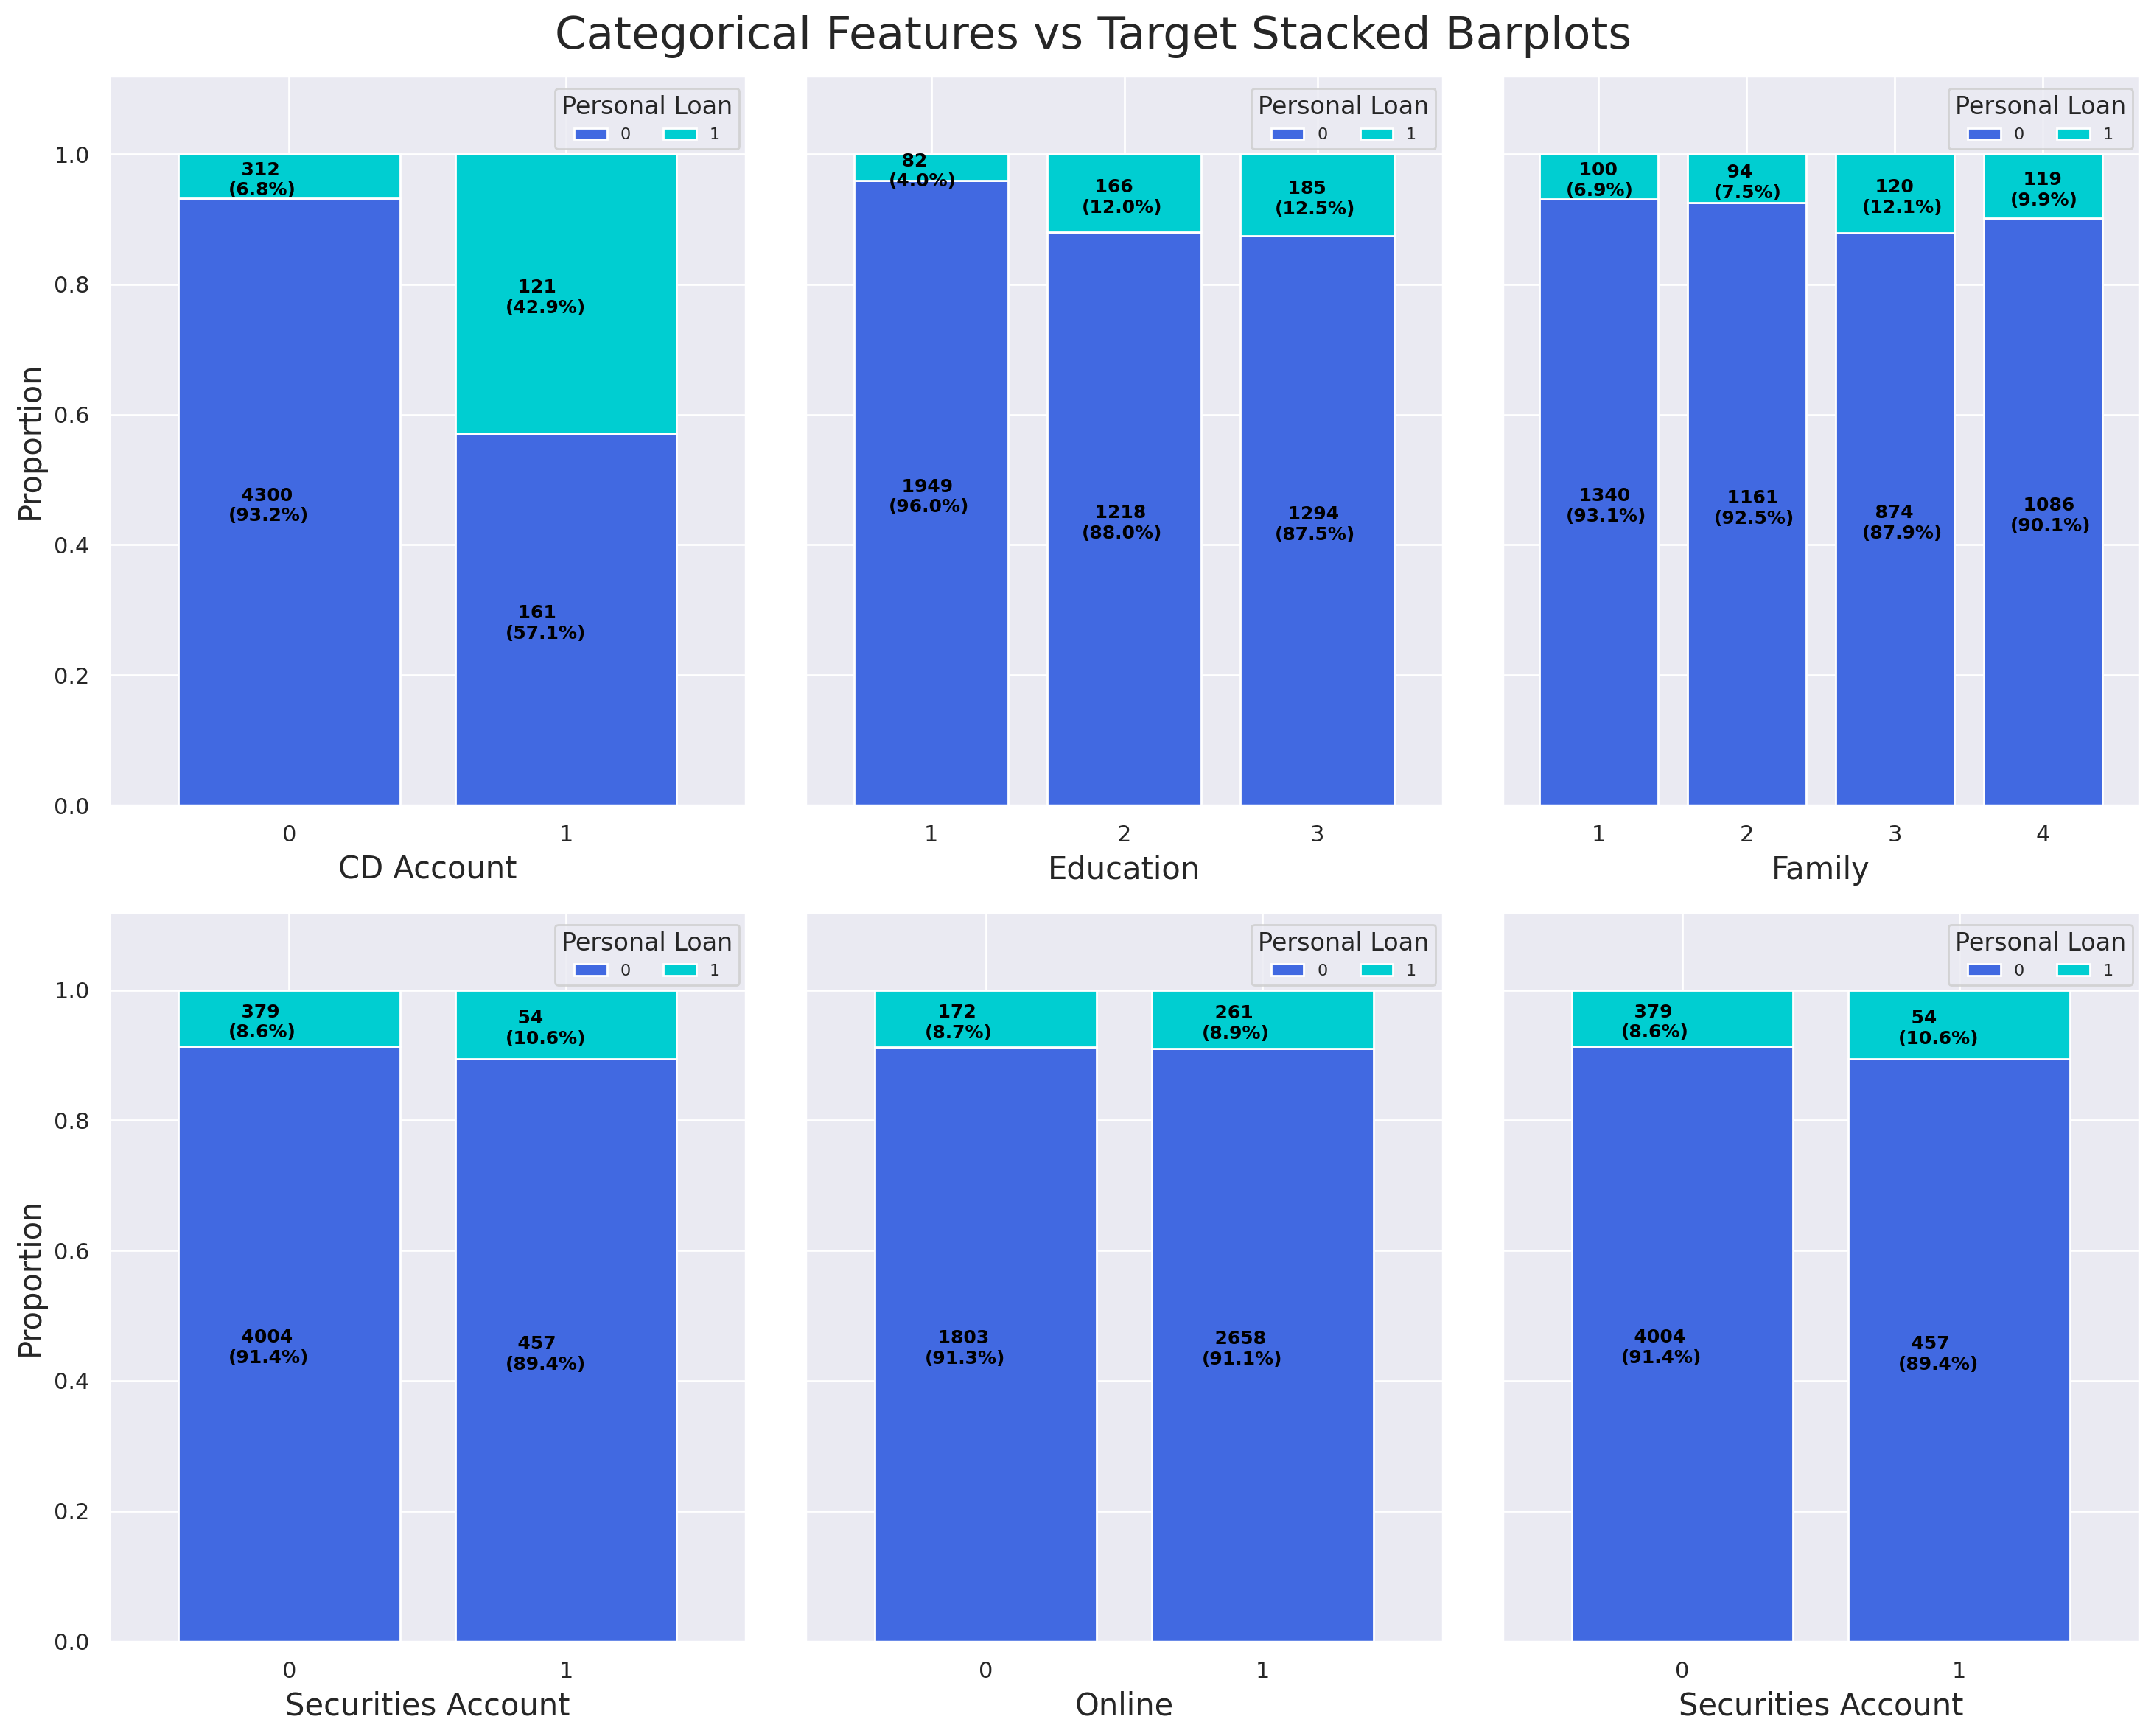

In [156]:
# Define a list containing the names of important categorical features in the dataset 
Cat_Features = ['CD Account','Education','Family','Securities Account','Online','Securities Account']

# Define the target name in a variable for simplicity
Target = 'Personal Loan'


fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15,12), dpi=200)

for i,col in enumerate(Cat_Features):
    
    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=df[col], columns=df[Target])
    
    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=df[col], columns=df[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['royalblue', 'darkturquoise'])
    
    # Plot stacked bar charts
    x, y = i//3, i%3
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)
    
    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)', 
                         color = "black", fontsize=9, fontweight="bold")
    
    # Add legend
    ax[x,y].legend(title='Personal Loan', loc=(0.7,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
            

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()                     
plt.show()

The customer who has a certificate of deposit (CD) with the bank appears to buy personal loans from the bank.

Customers with higher levels of education are more likely to buy personal loans.

The number of family members has no significant effect on the probability of buying personal loans.

Customers who have or do not have a securities account at the bank have no influence on the probability of buying a personal loan.

The customer who uses or does not use internet banking does not seem to have any influence on the probability of buying a personal loan.

The customer who uses or does not use a credit card does not appear to have an impact on the likelihood of purchasing a personal loan.

# Numerical Features vs Target

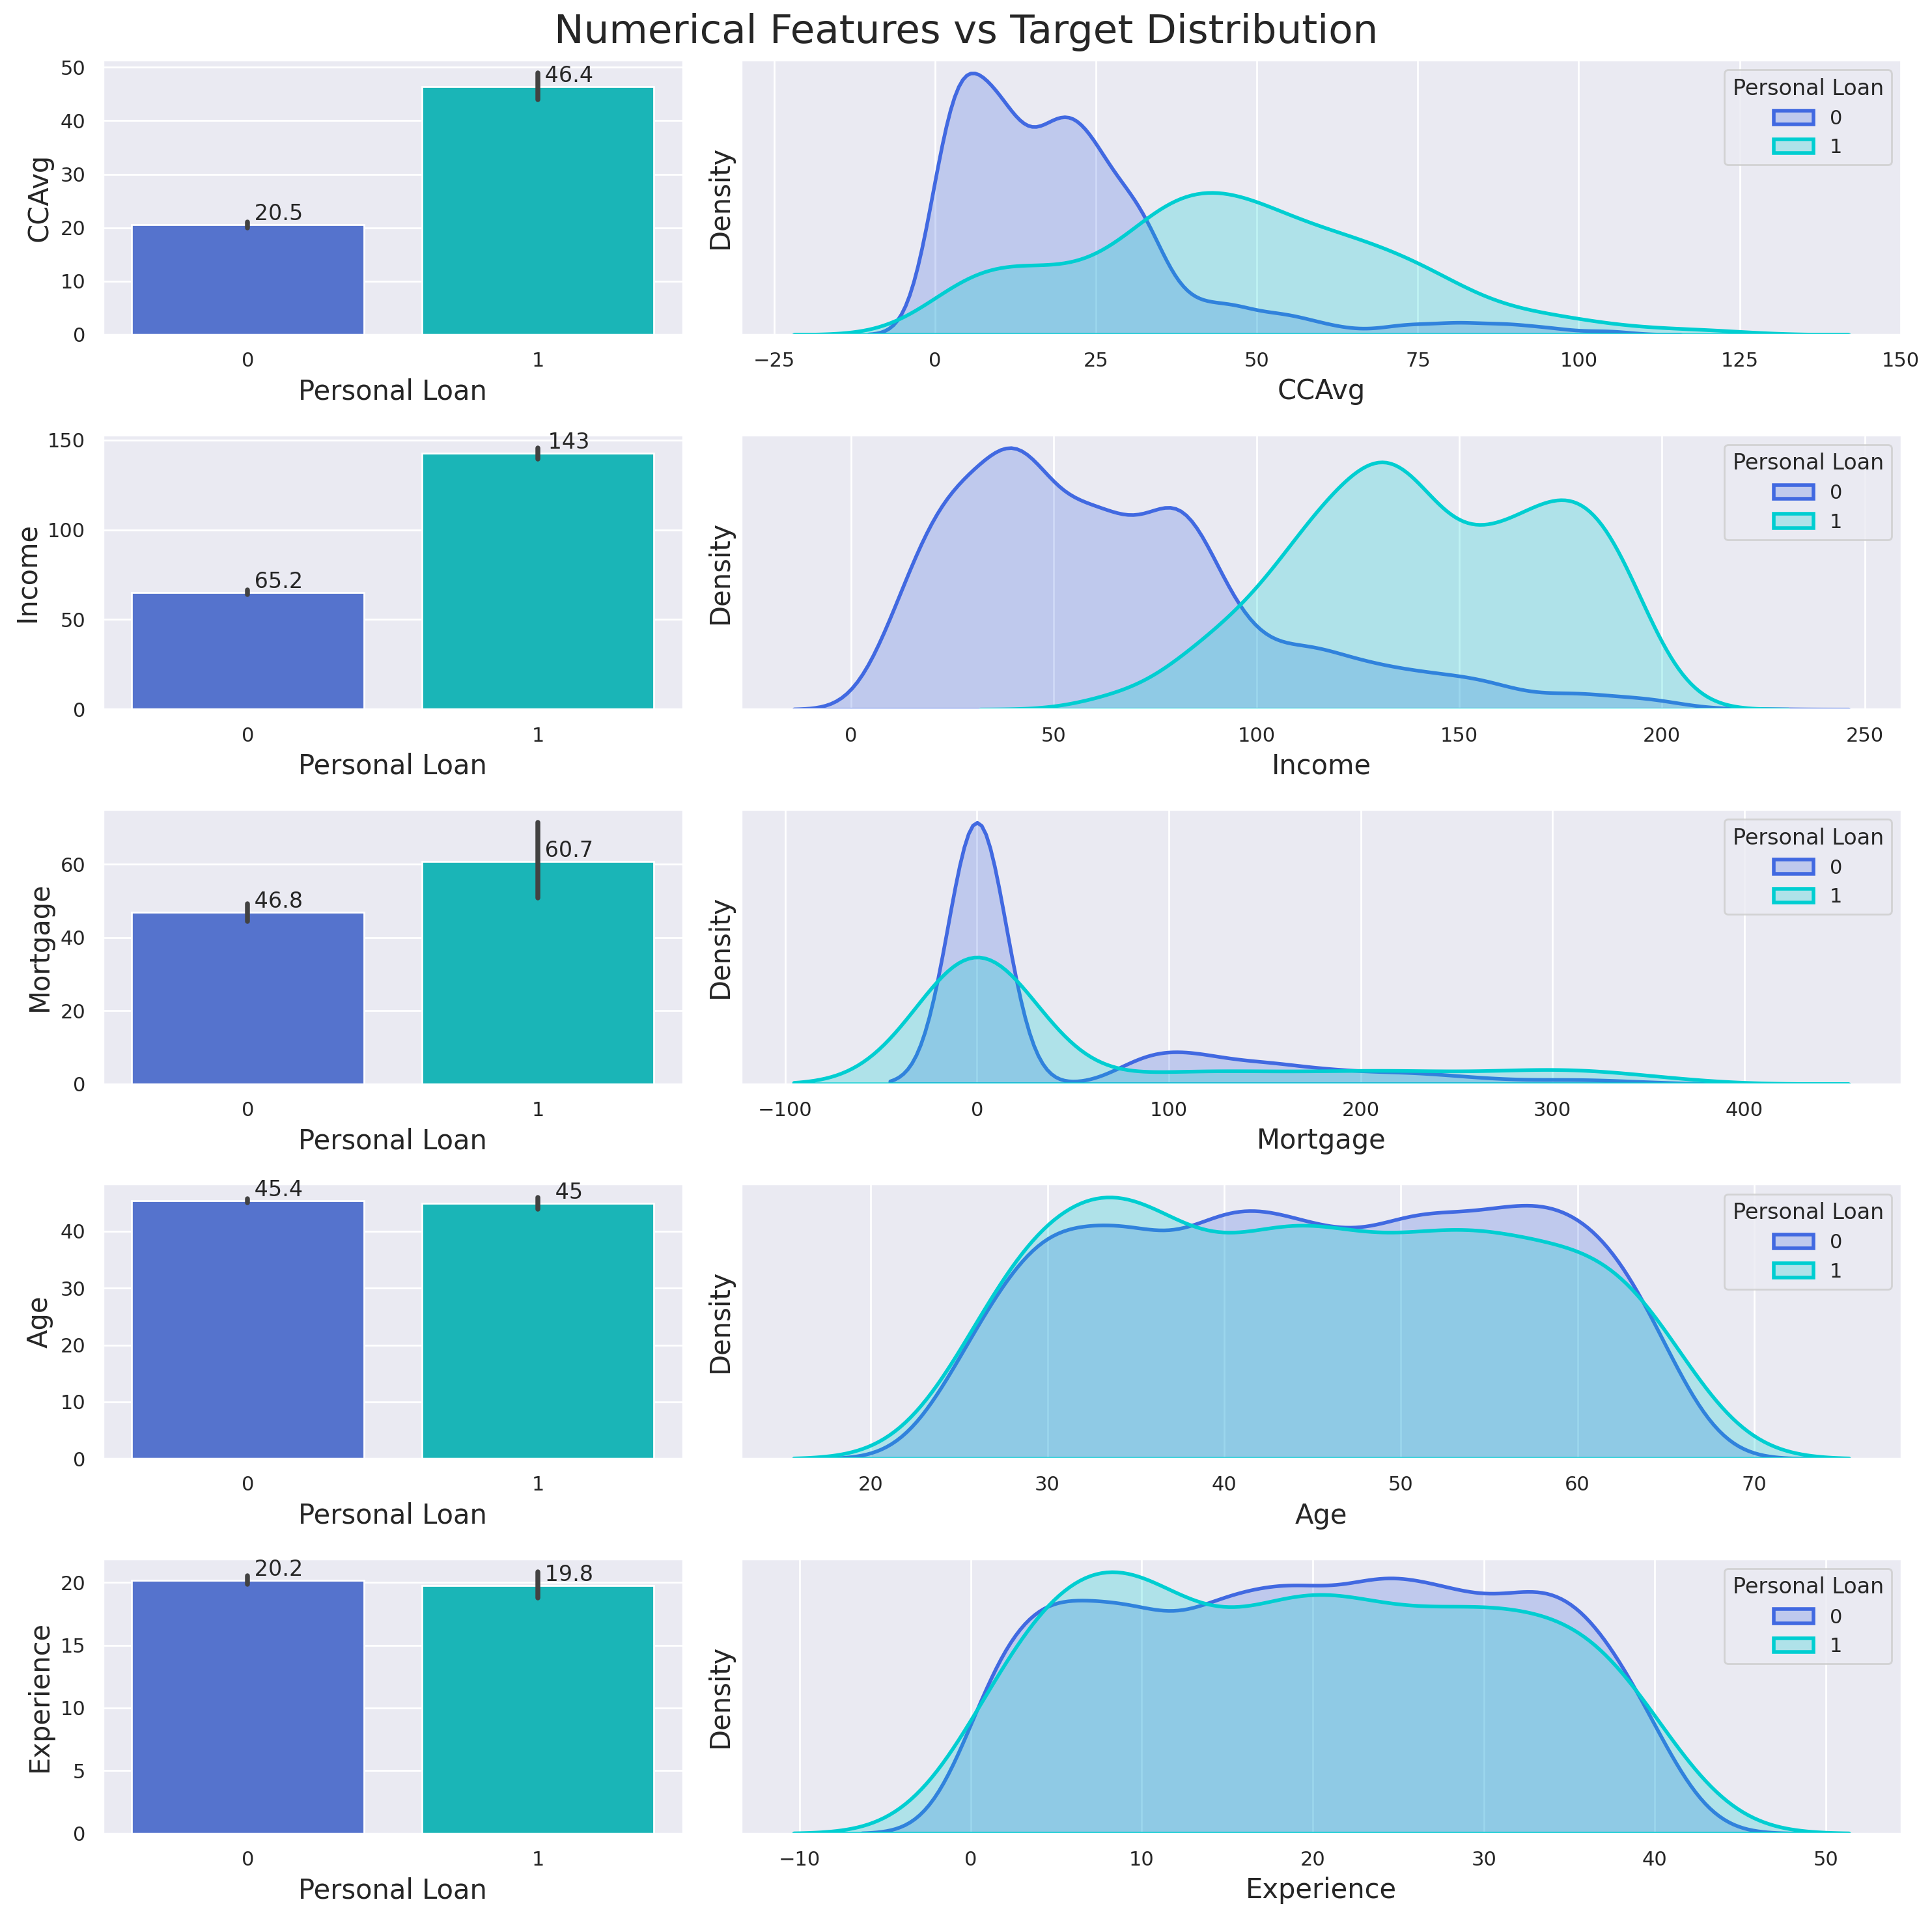

In [157]:
# Define a list containing the names of important numerical features in the dataset 
Num_Features = ['CCAvg','Income','Mortgage','Age','Experience']
sns.set_palette(['royalblue', 'darkturquoise'])

fig, ax = plt.subplots(5, 2, figsize=(15,15), dpi=200, gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=df, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=df[df[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=df[df[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Personal Loan', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='         %.3g')
        
plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()                     
plt.show()

Customers who spend more on credit cards are more likely to take out personal loans.

Customers with high incomes are more likely to purchase a personal loan.

Customers with a high mortgage value are more likely to purchase personal loans.

It can be inferred that the age of customers has no influence on the probability of purchasing personal loans.

The effect of the amount of work experience on the purchase of a loan is similar to that of the age of the customer. The distribution of the Experience is very similar to the distribution of Age, as Experience is strongly correlated with Age.

Therefore, we remove Experience because it doesn't provide any more information than Age:


In [158]:
df.drop('Experience', axis=1, inplace=True)

# Train Test Split

In [159]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan'] 

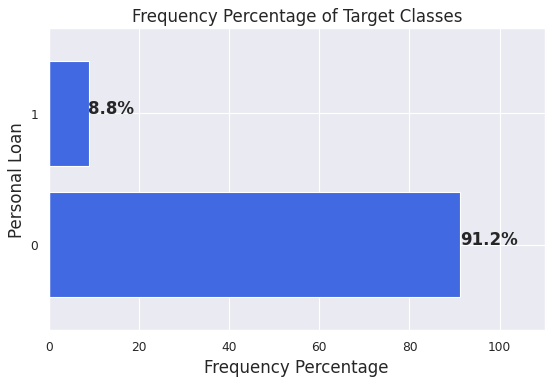

In [160]:
plt.figure(dpi=80)

# Plot frequency percentages barplot
df['Personal Loan'].value_counts(normalize=True).mul(100).plot(kind='barh', width=0.8, figsize=(8,5))

# Add frequency percentages to the plot
labels = df['Personal Loan'].value_counts(normalize=True).mul(100).round(1)
for i in labels.index:
    plt.text(labels[i], i, str(labels[i])+ '%', fontsize=15, weight='bold')

plt.xlim([0, 110])
plt.xlabel('Frequency Percentage', fontsize=15)
plt.ylabel('Personal Loan', fontsize=15)
plt.title('Frequency Percentage of Target Classes', fontsize=15)
plt.show()

As can be seen, the dataset we are working on is imbalanced.

Imbalanced datasets can lead to algorithms that are biased towards the majority class. This means that any classification algorithm trained on an imbalanced dataset will often inaccurately classify minority classes as the majority class.

The performance of a machine learning model can become highly skewed when it is fed with imbalanced data. For example, our dataset has 91.2% class 0 and 8.8% class 1, then the learning model could be easily optimized to just predict all test input as belonging to class 0 and still get 91.2% accuracy!

If a model is trained on data which is heavily imbalanced, it can develop an incorrect understanding of the underlying trends in the data. The model may not be able to recognize how certain values are distributed among different classes or even how certain classes overlap with each other.

**The approach to train test split**

The approach to train test split when dealing with imbalanced datasets is to use stratification. Stratification is an important step in splitting imbalanced datasets into training and test sets. Stratification ensures that the proportion of each class remains the same across both the training and test sets. This is important as it allows for a more accurate evaluation of the model, avoiding bias due to a disproportion of one class being over-represented in either dataset. Stratified sampling also ensures that any trends or correlations among different classes that exist within the overall dataset are preserved after splitting into training and test datasets:

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

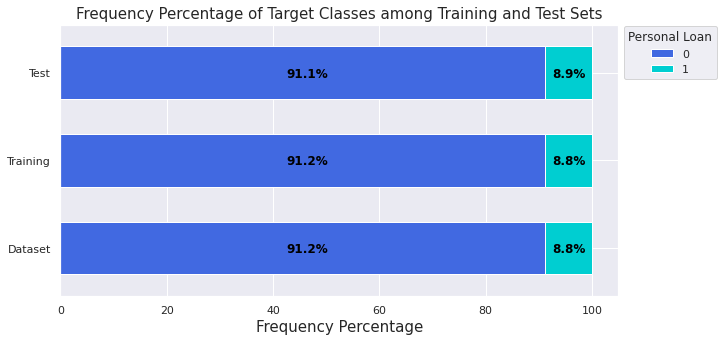

In [162]:
# Define a dataframe containing frequency percentages
df_perc = pd.concat([y.value_counts(normalize=True).mul(100).round(1),
                     y_train.value_counts(normalize=True).mul(100).round(1),
                     y_test.value_counts(normalize=True).mul(100).round(1)], axis=1)
df_perc.columns=['Dataset','Training','Test']
df_perc = df_perc.T

# Plot frequency percentages barplot
df_perc.plot(kind='barh', stacked=True, figsize=(10,5), width=0.6)

# Add the percentages to our plot
for idx, val in enumerate([*df_perc.index.values]):
    for (percentage, y_location) in zip(df_perc.loc[val], df_perc.loc[val].cumsum()):
        plt.text(x=(y_location - percentage) + (percentage / 2)-3,
                 y=idx - 0.05,
                 s=f'{percentage}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.legend(title='Personal Loan', loc=(1.01,0.8))
plt.xlabel('Frequency Percentage', fontsize=15)
plt.title('Frequency Percentage of Target Classes among Training and Test Sets', fontsize=15)
plt.show()   

3. Approaches for model building:
4. 
**I) Data-based approaches:**

**Random undersampling: **Undersampling involves randomly removing instances from the majority class to reduce its size.

Cons: Information loss caused by discarding the majority of the training set.

**Random oversampling:** It involves adding additional copies of instances from the minority class to make it more equal in size.

Cons: Overfitting, which is caused by replicating observations from the minority class.

**SMOTE:** SMOTE (Synthetic Minority Oversampling Technique) is an oversampling technique that creates new, synthetic observations from the minority class. This way, the algorithm avoids the problem of overfitting encountered with random oversampling.

Cons: Since SMOTE randomly creates rows of new data, the newly created synthetic samples lack real value information, thus leading to a potential decrease in accuracy overall. In addition, if there are natural boundaries between classes such as overlapping classes, additional outliers may be created due to the artificial creation of data points through SMOTE.

**II) Model-based approaches:**

**Penalize Algorithms:** Penalize algorithms by giving more weight to a specific classification label, making correct classification of the minority class more important than correct classification of the majority class during optimisation process.

**Use Tree-Based Algorithms:** Tree-based algorithms like Random Forest, Extra Trees Classifiers and XGBoost can naturally handle imbalanced data because they make decisions based on a majority vote among randomized decision trees and do not require balancing classes before training.

Considering the disadvantages of data-based methods, we will just implement model-based approaches.

# Feature Selection

Feature selection is the process of selecting a subset of relevant features for use in model building.

**Advantages of Feature Selection:**

Enhanced Accuracy: When there are fewer features, the model has fewer potential aspects to learn, which may lead to fewer errors being made when predicting new data.

Improved Interpretability: Feature selection helps to identify important features and also make a model more interpretable by removing redundant or irrelevant features from the data set.

Faster Training Time: Feature selection reduces the computational cost by reducing the number of computations that need to be performed in order to train and test the model. This, in turn, reduces training time and makes models more efficient.

Reduced Overfitting: By removing irrelevant and redundant features from data, feature selection can also help in reducing overfitting which can occur when too many variables are included in a model without sufficient observations or regularization techniques applied.

## Feature Selection Methods:

**I) Wrapper Methods:**

These methods use a predictive model to score each subset of features and determine the importance of each feature. Most important wrapper methods are:
Forward Selection: Forward Selection is an iterative feature selection method that starts off with no features in the model and one by one adds the most predictive feature to the model, stopping when there is no improvement on a validation score. This process is repeated until certain criteria are met or all possible sets of features have been considered. By using a metric , the algorithm can identify which combinations of features best improve model performance. The result of Forward Selection is an ordered list that ranks the importance of each feature according to its contribution to improving model accuracy.

Permutation: Permutation evaluates the influence of a given feature by shuffling its values and thereby creating a random permutation, measuring how much the model accuracy drops as consequence. The greater the drop in accuracy, the more important this feature proved to be for solving the task at hand.

Drop-column: The idea is to calculate the model performance with all predictors and drop a single predictor and see the reduction in the performance. The more important the feature is, the larger the decrease we see in the model performance.

**II) Filter Methods:**

These methods use statistical measures such as:

- Correlation Coefficients
- Information Gain
- Chi-square Test
- 
**III) Embedded Methods:**

Embedded methods combine elements of both filter and wrapper approaches by constructing predictive models during the feature selection process in order to better evaluate potential features. Examples of embedded methods include:
- LASSO Regression
- Decision Trees
- Random Forest
- Gradient Boosting Machines (GBM)

We will continue to use Drop-column Feature Importance method as it is actually the most accurate way to calculate the feature importances.

**Note:** Drop-column method does not reflect to the intrinsic predictive value of a feature by itself but how important this feature is for a particular model.

In [163]:
# Define a scorer function
def f1_metric(model, X_train, y_train):
    '''
    This function reports f1-score metric for the class specified by 'Positive Label' (or '1')
    '''
    return f1_score(y_train, model.predict(X_train), average='binary')

**Cloning a model** can be useful for creating multiple versions of the same model. This way, different versions of the model can be tested with various parameters or datasets. This can allow for more thorough and accurate evaluation of the model so that one version is not overly biased towards previous versions. Additionally it may be desirable to find out how slightly different parameters affect the performance of a model. Cloning a model allows us to do this quickly and easily by generating multiple models and testing them side-by-side.

Next, we will implement Drop-column Feature Importance Technique through a function using cloning:

In [164]:
def drop_column_importance(model, X_train, y_train, random_state=0):
    # list containing feature importances
    importances = []
    # Clone the model
    model_clone = clone(model)
    # Set random_state for comparability
    model_clone.random_state = random_state
    # Train the model
    model_clone.fit(X_train, y_train)
    # Create the cross-validation object using StratifiedKFold 
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    # Score the benchmark model using cross-validation
    benchmark_score = cross_val_score(model_clone, X_train, y_train, cv=cv, scoring=f1_metric).mean()

    
    # Iterate over all features and store feature importance
    for col in X_train.columns:
        # Clone the model
        model_clone = clone(model)
        # Set random_state for comparability
        model_clone.random_state = random_state
        # Traint the model on the the dataset with a single feature removed
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        # Score the droped-column model
        drop_column_score = cross_val_score(model_clone, X_train.drop(col,axis=1), y_train, cv=cv, scoring=f1_metric).mean()
        # Store feature importance which is defined as the difference between the benchmark and the new model score
        importances.append(benchmark_score - drop_column_score)
        
    # Return the features along with their importances in the form of a dataframe
    importances_df = pd.DataFrame({'feature': X_train.columns, 'feature importance': importances}) \
                     .sort_values('feature importance', ascending = False).reset_index(drop = True)
           
    return importances_df   

In [165]:
def drop_column_importance_plot(model, X_train, y_train):
    # Call drop-column feature importance function
    df_drop_column = drop_column_importance(model, X_train, y_train, random_state=0)
    # Rename columns
    df_drop_column.columns = ['Feature', 'Feature Importance']
    
    # Plot barchart
    plt.figure(figsize=(12,10))
    sns.barplot(data=df_drop_column, x='Feature Importance', y='Feature', orient='h', color='royalblue')
    plt.title('Drop Column Feature Importance', fontsize=20)
    plt.show()

#  Naive Bayes Model Building

Naive Bayes is a classification algorithm in machine learning. It is used to predict the probability of a given input belonging to different classes or categories. It is based on Bayes' theorem, which uses the prior probability of the class and the likelihood of the features given the class to calculate the posterior probability of the class. The class with the highest posterior probability is then chosen as the predicted class for the input. The Naive Bayes classifier algorithm makes several assumptions about the data and the problem it is being used to solve.

**Naive Bayes Main Assumptions:**

Independence: The algorithm assumes that all the features in the data are independent of each other given the class. This is the "naive" part of the algorithm and is often unrealistic in real-world problems, but it allows for a computationally efficient solution.

Conditional independence: The algorithm also assumes that the features are conditionally independent, meaning that the probability of a feature given the class is independent of the other features.

Constant class prior: The algorithm assumes that the class prior probabilities are constant and do not change with the data.

Note: The Naive Bayes basic assumptions have been satisfied since only two features were highly correlated, Experience and Age, and the Experience feature had been removed earlier.

**Different types of Naive Bayes algorithms available in sklearn:**

Gaussian Naive Bayes: This algorithm is used when the data is continuous and follows a normal distribution.

Multinomial Naive Bayes: This algorithm is used when the data is discrete and represents the count of occurrences of each category.

Bernoulli Naive Bayes: This algorithm is similar to the multinomial Naive Bayes, but it is used when the data is binary.

Complement Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for imbalanced data sets.

Categorical Naive Bayes: This algorithm is similar to the Multinomial Naive Bayes, but it is designed for categorical data, rather than count data.

In this project, our dataset contains a mixture of features with different distributions:

Continuous Features - Age, Income, CCAvg, Mortgage

Binary Features - Securities Account, CD Account, Online, CreditCard

Multinomial Features - Family

Categorical Features - Education, ZIP Code

**Strategies:**

First strategy is to independently fit a Gaussian NB model on the continuous part of the data, a Complement NB model (imbalanced dataset) on the multinomial part of the data, a Bernoulli model on the bernoulli part of the data and a Categorical NB on the categorical part of the data. After fitting each model on the corresponding part of the dataset, then we actually transform the dataset by taking the class assignment probabilities (using predict_proba method) as new features and then refit a new Gaussian NB model on the new features.

Second strategy is to discretize continuous features and apply different discrete-data based Naive Bayes models, including Complement NB, and Bernoulli NB, in order to find the model with the best performance.

We will implement the second strategy because Income, CCAvg, and Mortgage are continuous features that are important features according to step 6.2, but their distribution is not normal and has high skewness and kurtosis, which causes a large error when performing Gaussian NB.


Multinomial NB is a probabilistic classifier that is commonly used in text classification tasks. It is based on the assumption that the features (e.g. words) in the text are conditionally independent given the class label. Multinomial NB models the probability of each feature given a class label using a multinomial distribution.

Complement NB is a variant of Multinomial NB algorithm that is designed to correct for the bias that is inherent in Multinomial NB algorithm. Multinomial NB algorithm tends to assign higher probability to classes that have more training samples. Complement NB aims to correct for this bias by computing the complement of the standard Naive Bayes probability estimates and then using these complement probabilities to make predictions.

**Since our dataset is imbalanced, we will use CNB instead of MNB.**

**KBinsDiscretizer class** from scikit-learn provides an implementation of discretization using the binning method. It allows us to choose between different number of bins (n_bins) and strategies for binning.

We will define a function containing GridSearchCV class to find the best combination of n_bins and strategy. In other words, we try all combinations of n_bins and strategy within the defined range and use the considered NB model to evaluate the discretizer's performance on the validation set in order to find the optimal combination:

In [166]:
def discretization_report(df, clf):
    '''
    This function finds the optimal combination of n_bins and strategy for continuous features discretization
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['Age', 'Income', 'CCAvg', 'Mortgage']

    # Define the features (X) and the output labels (y) 
    X = df[cols_to_discretize]
    y = df['Personal Loan']

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Define the grid search parameters
    param_grid = {'discretizer__strategy': ['uniform', 'quantile', 'kmeans'],
                  'discretizer__n_bins': np.arange(2,11)}

    # Define the KBinsDiscretizer and OneHotEncoder and ComplementNB objects
    discretizer = KBinsDiscretizer(encode='ordinal')
    onehot = OneHotEncoder(handle_unknown='error', drop='first')

    # Create the pipeline
    pipeline = Pipeline([('discretizer', discretizer), ('onehot', onehot), ('clf', clf)])

    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
    
    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and the best score
    print("Best discretization parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    
    # Return optimal values for n_bins and strategy
    return grid_search.best_params_['discretizer__n_bins'], grid_search.best_params_['discretizer__strategy']

In [167]:
# Ignore a warning that in some cases, the width of the bins will be too small
warnings.simplefilter(action='ignore')

# Initialize the CNB classifier
cnb = ComplementNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, cnb)

Best discretization parameters: {'discretizer__n_bins': 6, 'discretizer__strategy': 'quantile'}
Best score: 0.5354708442834474


The optimal values obtained for n_bins and strategy considering the CNB model are:

n_bins : 6

strategy : quantile (All bins in each feature have the same number of points)

After obtaining the optimal values for KBinsDiscretizer arguments including n_bins and strategy, we discretize continuous features with these optimal arguments. Then, we implement dummy encoding on non-binary categorical features. We define a function for feature encoding:


In [168]:
def nb_feature_encoding(df, n_bins, strategy, cols_to_encode):
    '''
    This function performs dummy encoding on the desired categorical features after performing feature discretization 
    considering optimal n_bins and strategy values.
    '''
    # Define continuous features to perform discretization on
    cols_to_discretize = ['Age', 'Income', 'CCAvg', 'Mortgage']

    # Define the features (X) and the output labels (y) 
    X = df.drop('Personal Loan', axis=1)
    y = df['Personal Loan'] 

    # Split dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

    # Discretize the continuous features
    discretizer = KBinsDiscretizer(n_bins=n_bins, strategy=strategy, encode='ordinal')
    X_train[cols_to_discretize] = discretizer.fit_transform(X_train[cols_to_discretize])
    X_test[cols_to_discretize] = discretizer.transform(X_test[cols_to_discretize])

    # Onehot encode the discretized features
    X_train = pd.get_dummies(X_train, columns=cols_to_encode, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=cols_to_encode, drop_first=True)
    
    # Align the columns of the test set with the training set
    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
    
    # Return transformed features
    return X_train, X_test

In [169]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df, n_bins, strategy, cols_to_encode)

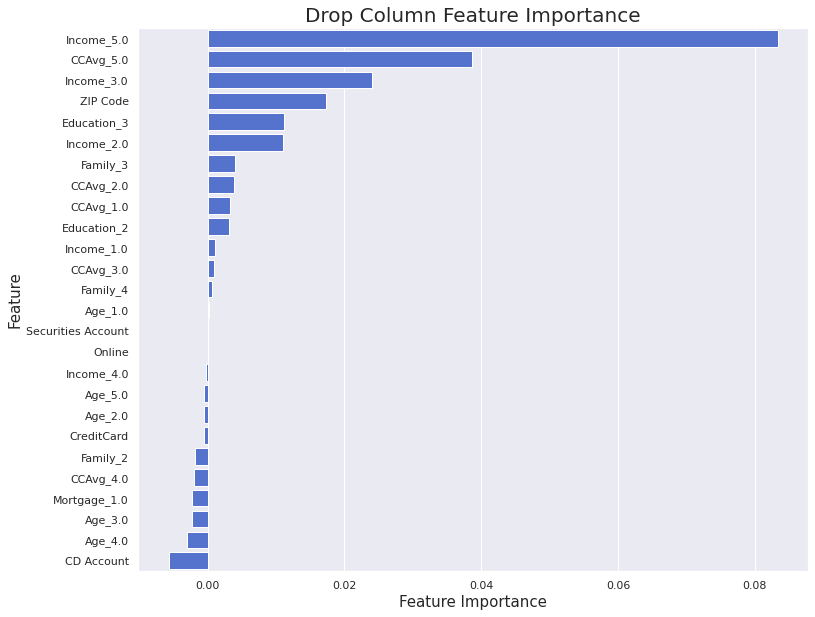

In [170]:
# Initialize the CNB classifier
cnb = ComplementNB()

# Call drop_column_importance_plot
drop_column_importance_plot(cnb, X_train, y_train)

# **Negative importance of Feature
in Drop-column Feature Importance means that removing the corresponding feature from the model actually improves the model performance. So we filter our dataset:

In [171]:
feature_importances = drop_column_importance(cnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [172]:
cnb = ComplementNB()
cnb.fit(X_train, y_train)

ComplementNB()

In [173]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, average='binary'),
                                recall_score(y_test, y_pred, average='binary'),
                                f1_score(y_test, y_pred, average='binary'),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[::,1])],
                          index=['Accuracy','Precision','Recall','F1-score','AUC'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [174]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    sns.set(font_scale=1.2)
    
    # Classification reports
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))
    
    # Figure setup
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', colorbar=False, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')
    ax1.grid(False)
    
    # ROC Curve (manual for backward compatibility)
    if hasattr(clf, "predict_proba"):
        y_proba = clf.predict_proba(X_test)[:, 1]
    else:
        y_proba = clf.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, color='royalblue', lw=2, label=f'AUC = {roc_auc:.3f}')
    ax2.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data')
    ax2.legend(loc='lower right')
    
    # Metrics Table
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')

    plt.tight_layout()
    plt.show()



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3569
           1       0.41      0.95      0.57       346

    accuracy                           0.88      3915
   macro avg       0.70      0.91      0.75      3915
weighted avg       0.94      0.88      0.90      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       892
           1       0.38      0.94      0.54        87

    accuracy                           0.86       979
   macro avg       0.69      0.90      0.73       979
weighted avg       0.94      0.86      0.88       979



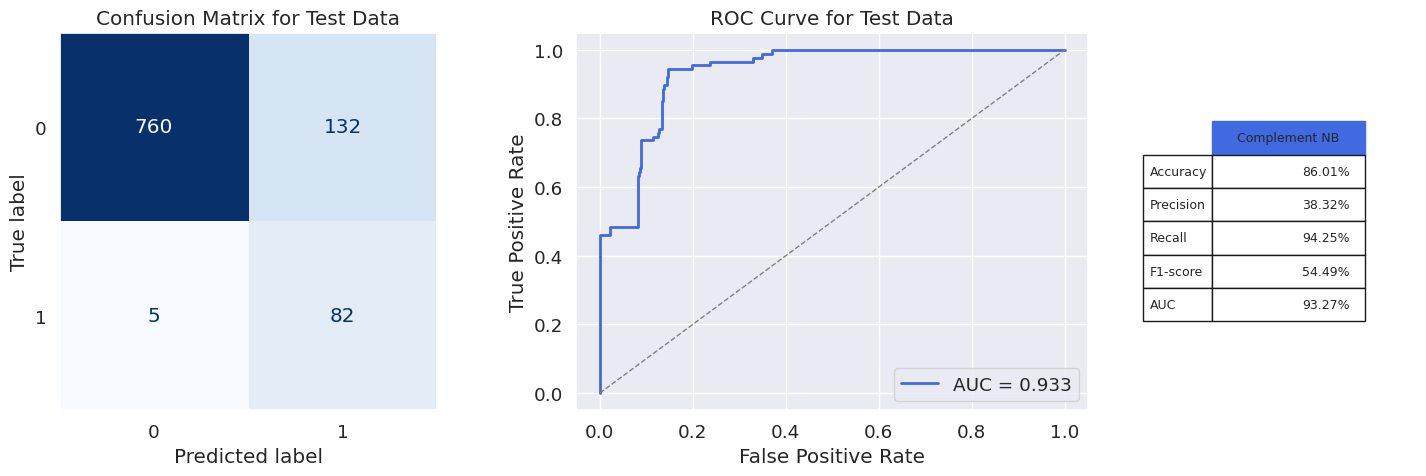

In [175]:
model_evaluation(cnb, X_train, X_test, y_train, y_test, 'Complement NB')

In [176]:
# Save the final performance of Complement Naive Bayes classifier
cnb_result = metrics_calculator(cnb, X_test, y_test, 'Complement Naive Bayes')

# Bernoulli NB Model Building

Bernoulli NB, like MultinomialNB, is suitable for discrete data. The difference is that while MultinomialNB works with occurrence counts, BernoulliNB is designed to work with binary data, where the features are either true or false (1 or 0).

In [177]:
# Initialize the Categorical NB classifier
bnb = BernoulliNB()

# Call discretization_report
n_bins, strategy = discretization_report(df, bnb)

Best discretization parameters: {'discretizer__n_bins': 7, 'discretizer__strategy': 'uniform'}
Best score: 0.5167750705438299


The optimal values obtained for n_bins and strategy considering the BNB model are:

n_bins : 9

strategy : uniform (All bins in each feature have identical widths)

In [178]:
df_bnb = df.copy()
df_bnb.drop('ZIP Code', axis=1, inplace=True)

In [179]:
# All non-binary features are selected for onehot encoding
cols_to_encode = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Family', 'Education']

# Call nb_feature_encoding
X_train, X_test = nb_feature_encoding(df_bnb, n_bins, strategy, cols_to_encode)

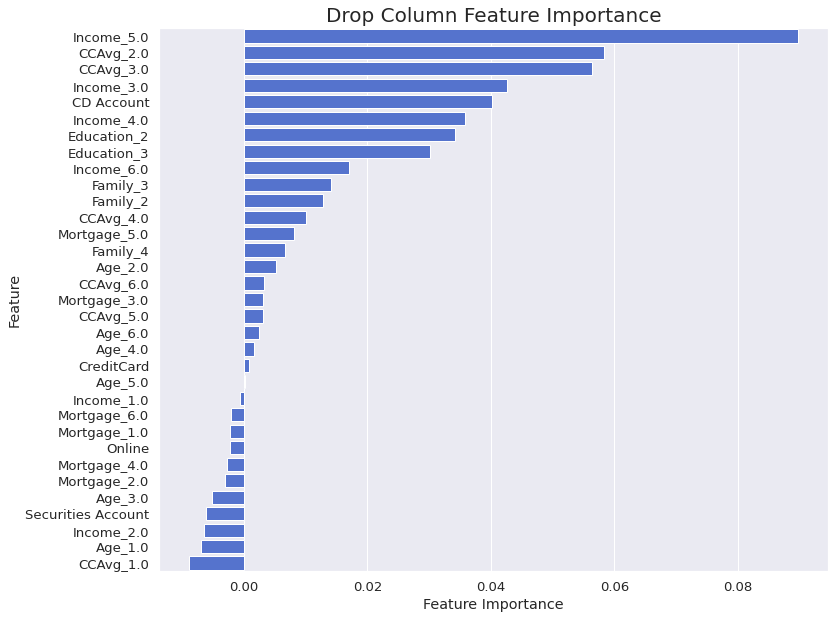

In [180]:
# Initialize the BNB classifier
bnb = BernoulliNB()

# Call drop_column_importance_plot
drop_column_importance_plot(bnb, X_train, y_train)

In [181]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(bnb, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [182]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

BernoulliNB()


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3569
           1       0.82      0.49      0.61       346

    accuracy                           0.95      3915
   macro avg       0.88      0.74      0.79      3915
weighted avg       0.94      0.95      0.94      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       892
           1       0.78      0.48      0.60        87

    accuracy                           0.94       979
   macro avg       0.86      0.73      0.78       979
weighted avg       0.94      0.94      0.94       979



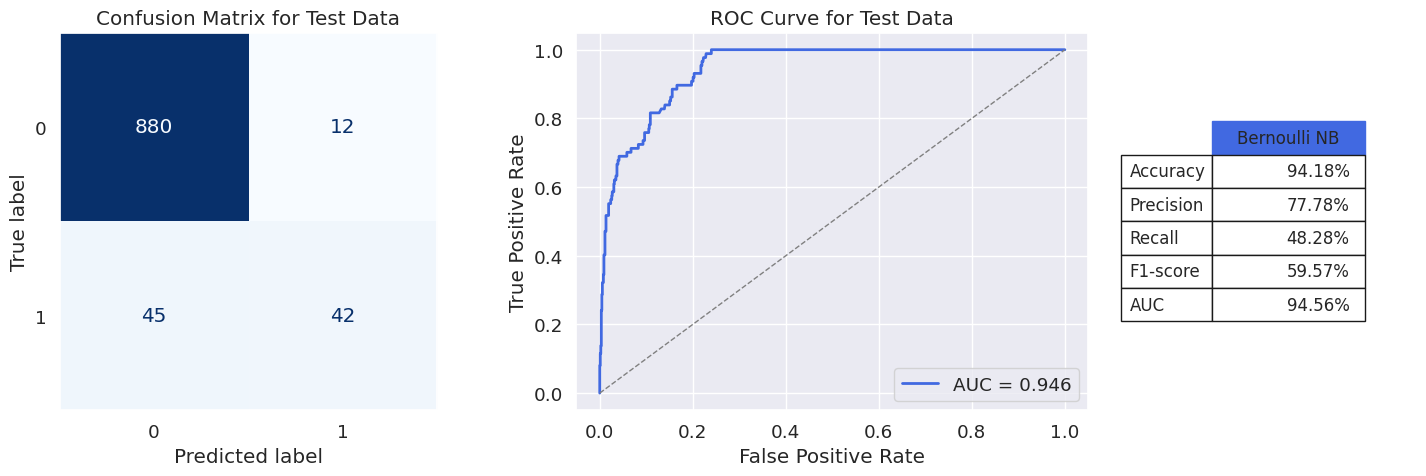

In [183]:
model_evaluation(bnb, X_train, X_test, y_train, y_test, 'Bernoulli NB')

In [184]:
# Save the final performance of Bernoulli Naive Bayes classifier
bnb_result = metrics_calculator(bnb, X_test, y_test, 'Bernoulli Naive Bayes')

# Logistic Regression Model

Logistic Regression is a type of supervised machine learning algorithm used for binary classification problems. It models the probability of a target variable (usually binary) as a function of input features, using a logistic function (sigmoid) to map predictions between 0 and 1. The model is trained using labeled data to optimize the coefficients of the features to minimize the prediction error.

Before building our logistic classifier, we will apply Standard Scaler to our data.

**Standard Scaler** is used to scale the data. It transforms the data by subtracting the mean and dividing by the standard deviation, ensuring that all features have a similar range of values.

Benefits of Standard Scaling on Logistic Regression:

**Gradient Descent Convergence:** The optimization algorithm used in logistic regression is gradient descent. When the features have different scales, the magnitude of the gradient will also be different for different features. Scaling the features to have the same scale ensures that the magnitude of the gradient is the same for all features, which can lead to faster convergence of the optimization algorithm.

**Regularization:** Logistic regression uses regularization to prevent overfitting. When the features have different scales, the regularization term in the cost function tends to give more weight to the features with higher values, which can be problematic in certain cases. Scaling the features to have the same scale can alleviate this issue.

**Better Performance:** In some cases, scaling the features can lead to a better performance of the logistic regression model, especially when the features have a skewed distribution or are not on the same scale.

In [185]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [186]:
# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In Logistic Regression, solver choice is determined by penalty choice. Supported penalties by solvers are:

lbfgs -> [ l2 , None ]

liblinear -> [ l1 , l2 ]

newton-cg -> [ l2 , None ]

sag -> [ l2 , None ]

saga -> [ elasticnet , l1 , l2 , None ]

Therefore, different combinations of solver and penalty should be considered:

In [187]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,20)]

# Define hyperparameters grid
param_grid = [{'solver':['lbfgs', 'newton-cg', 'sag', 'saga'], 
               'penalty':['none'], 
               'class_weight':class_weights}, 
              
              {'solver':['lbfgs', 'newton-cg', 'sag'], 
               'penalty':['l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['liblinear', 'saga'], 
               'penalty': ['l1', 'l2'], 
               'C': np.logspace(-5, 5, 10), 
               'class_weight':class_weights},
              
              {'solver':['saga'], 
               'penalty':['elasticnet'], 
               'C': np.logspace(-5, 5, 10),
               'l1_ratio': np.arange(0,1.1,0.1), 
               'class_weight':class_weights}]  

In [188]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train):
    '''
    This function optimize the hyperparameters for a classifier by searching over a specified hyperparameter grid. It uses 
    GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters, and selects  
    the combination with the highest f1-score. The function returns the best classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=f1_metric, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    print("Best hyperparameters:\n", clf_grid.best_params_)
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_

In [189]:
# Define the base model
logreg = LogisticRegression(max_iter=1000)

# Call tune_clf_hyperparameters function to find the optimal combination of hyperparameters 
logreg_opt = tune_clf_hyperparameters(logreg, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 3.593813663804626, 'class_weight': {0: 0.4474736842105263, 1: 0.5525263157894738}, 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}


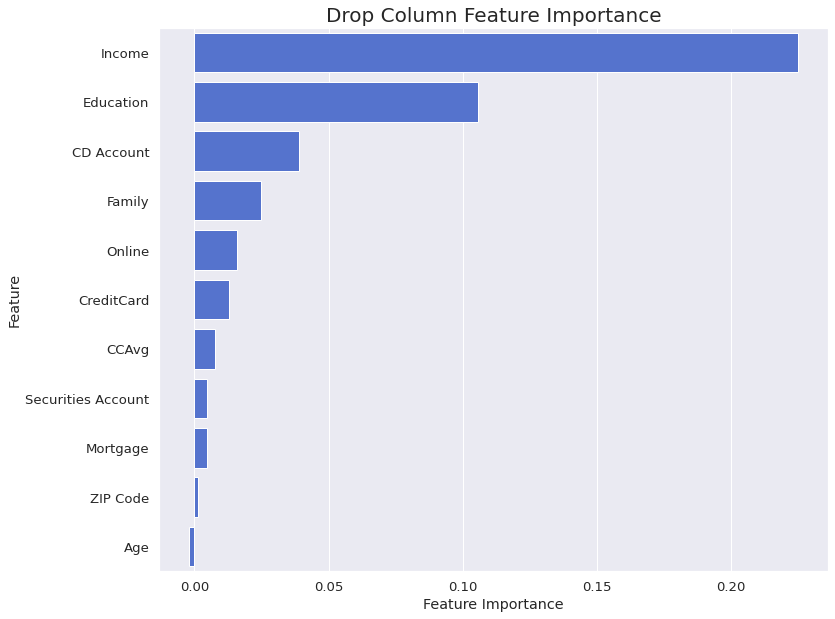

In [190]:
drop_column_importance_plot(logreg_opt, X_train, y_train)


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3569
           1       0.81      0.65      0.72       346

    accuracy                           0.96      3915
   macro avg       0.89      0.82      0.85      3915
weighted avg       0.95      0.96      0.95      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       892
           1       0.72      0.67      0.69        87

    accuracy                           0.95       979
   macro avg       0.85      0.82      0.83       979
weighted avg       0.95      0.95      0.95       979



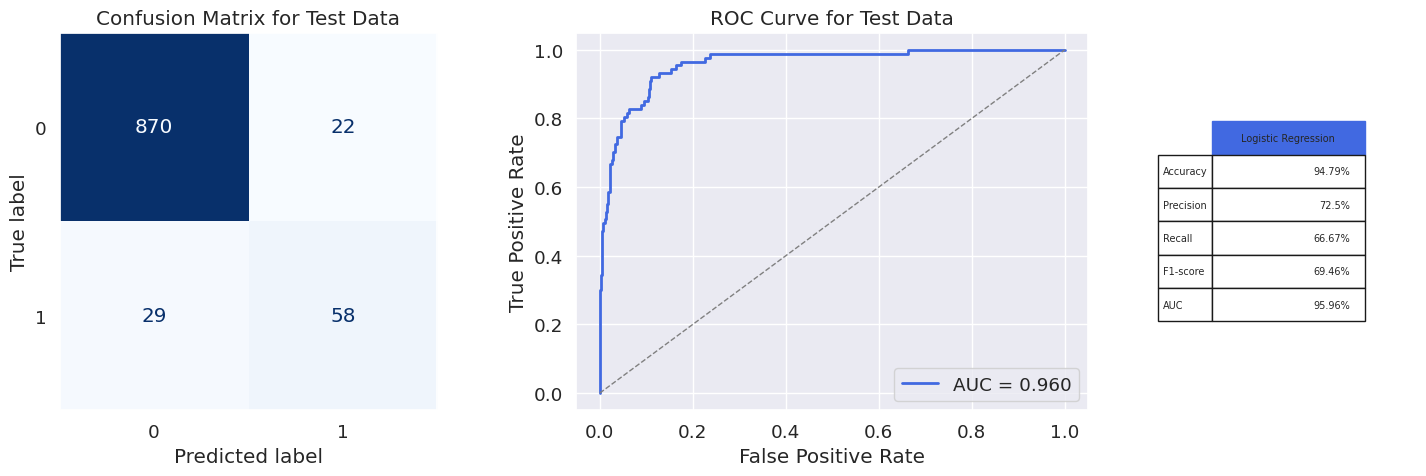

In [191]:
model_evaluation(logreg_opt, X_train, X_test, y_train, y_test, 'Logistic Regression')

In [192]:
# Save the final performance of Logistic Regression classifier
logreg_result = metrics_calculator(logreg_opt, X_test, y_test, 'Logistic Regression')

In [193]:
gc.collect()
time.sleep(5)

# KNN Model

**KNN (K-Nearest Neighbors)** is a supervised learning algorithm used for classification and regression problems in machine learning. The algorithm works by finding the K nearest data points to a given test sample, and then classifying the test sample based on the majority class among the K nearest neighbors. The algorithm uses a distance metric (such as Euclidean distance) to determine the nearest neighbors. The value of K is a hyperparameter and determines the number of neighbors used to make the prediction.

**Advantages:**

Easy to implement and understand.

No need for training, it saves the training data and does not need to estimate parameters.

Can be used for both classification and regression problems.

**Disadvantages:**

It requires a large amount of memory to store the training data.

Computationally expensive during prediction stage.

Does not work well with high dimensional data as the distance metric becomes less effective.

It can be biased towards the majority class.

Sensitive to outliers.

Sensitive to irrelevant features and noisy data. It's important to perform proper feature selection.

As KNN uses a distance metric to find its nearest neighbors, **standard scaling** (or normalization) is necessary to rescale the features so they have the same scale. Features with different scales and distributions can affect the distance calculation and affect the algorithm's performance.


KNN classifier hyperparameters are as follows:

n_neighbors: This is the number of nearest neighbors that will be used to predict the class of a new sample.

weights: This determines how the distances between samples are weighted when making predictions.

uniform - all neighbors are weighted equally

distance - neighbors closer to the sample are weighted more heavily

metric: This is the distance metric used to determine the closest neighbors. The options are:

- euclidean
- manhattan
- minkowski (the generalization of both distances)

p: This is the power parameter for the Minkowski metric. When p=1, the Minkowski metric is equivalent to the Manhattan distance; when p=2, it is equivalent to the Euclidean distance. A value of p other than 1 or 2 can be used to weight the contribution of the distances between coordinates differently.

In [194]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [195]:
# Define hyperparameters grid to search
param_grid = [{'n_neighbors': np.arange(2, 30), 'metric': ['euclidean','manhattan'], 'weights': ['uniform']},
              {'n_neighbors': np.arange(2, 30), 'metric': ['minkowski'], 'p': [3,4,5], 'weights': ['uniform']}]

In [196]:
# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

Best hyperparameters:
 {'metric': 'minkowski', 'n_neighbors': 3, 'p': 3, 'weights': 'uniform'}


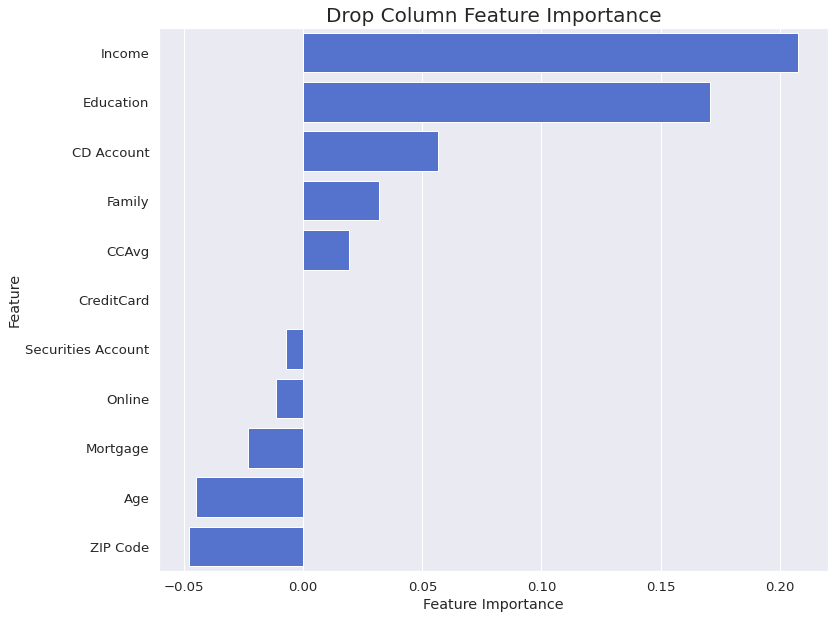

In [197]:
drop_column_importance_plot(knn_opt, X_train, y_train)

Best hyperparameters:
 {'metric': 'minkowski', 'n_neighbors': 3, 'p': 5, 'weights': 'uniform'}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       0.99      0.90      0.94       346

    accuracy                           0.99      3915
   macro avg       0.99      0.95      0.97      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.87      0.91        87

    accuracy                           0.98       979
   macro avg       0.97      0.93      0.95       979
weighted avg       0.98      0.98      0.98       979



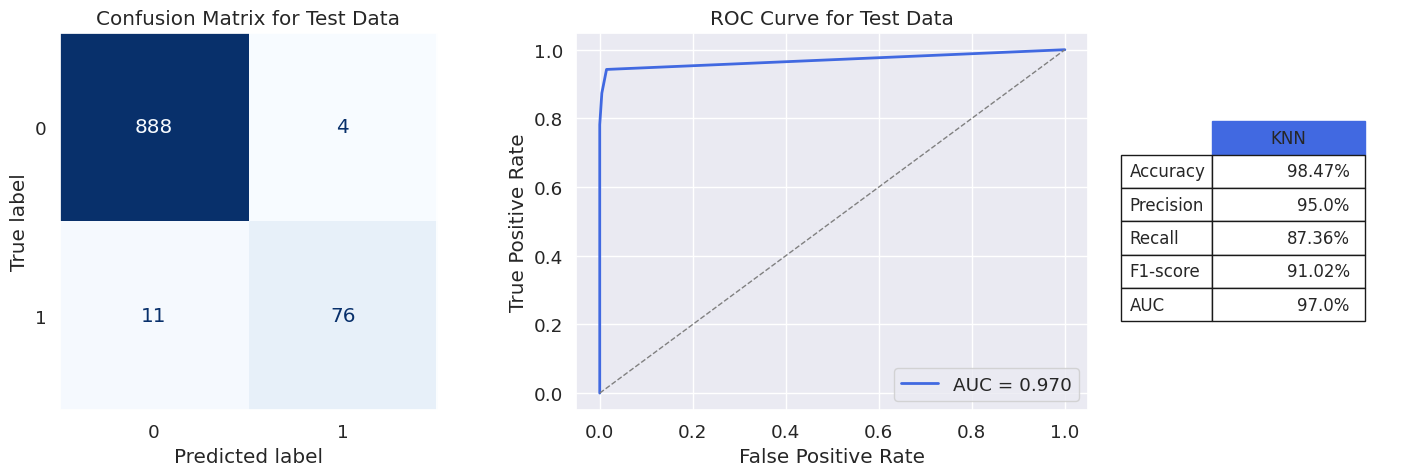

In [198]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(knn_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0]['feature']

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Find the best classifier with the optimal hyperparameters
knn_opt = tune_clf_hyperparameters(knn, param_grid, X_train, y_train)

model_evaluation(knn_opt, X_train, X_test, y_train, y_test, 'KNN')

# Save the final performance of KNN classifier
knn_result = metrics_calculator(knn_opt, X_test, y_test, 'K-Nearest Neighbors')

In [199]:
gc.collect()
time.sleep(5)

# SVM Model

Support Vector Machine (SVM) is a type of supervised learning algorithm that is used for classification or regression tasks. It works by finding the best boundary (also known as the decision boundary) that separates the data points into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). SVM can handle non-linearly separable data by transforming it into a higher-dimensional space, where it becomes linearly separable.

**Advantages:**

Robust to outliers: SVM is less sensitive to outliers compared to other algorithms, making it suitable for tasks where the presence of outliers is expected.

Versatile: SVM can be used for classification and regression tasks, as well as handling non-linear data through the use of kernel functions.

Effective in high dimensional spaces: SVM is effective in higher dimensional spaces, where the number of features is greater than the number of samples.

Good performance on smaller datasets: SVM has a good performance even on smaller datasets and it doesn't require a large amount of training data to produce accurate results.

**Disadvantages:**

Poor performance on large datasets: SVM can be computationally intensive and may become slow when the dataset is large.

Overfitting: SVM can overfit the data, especially when the number of features is much higher than the number of samples.

Limited interpretability: SVM is a black-box model and it can be difficult to interpret the results and understand how the algorithm makes predictions.

Difficulty in choosing the right kernel function: The choice of the kernel function is crucial for the performance of SVM and it can be difficult to determine the best one for a particular problem.


SVM (Support Vector Machine) is a distance-based classifier. SVM works by finding the boundary that best separates the data into classes, while maximizing the margin (the distance between the boundary and the closest data points from each class, known as support vectors). This means that SVM is based on the concept of distance and seeks to find the optimal boundary that maximizes the distance between the classes. Therefore, Standard Scaling must be performed before model building:

SVM classifier hyperparameters are as follows:

C: This hyperparameter controls the trade-off between achieving a low training error and a low testing error. A smaller value of C results in a wider margin and a larger number of misclassified training examples, while a larger value of C results in a narrower margin and fewer misclassified training examples.

kernel: This hyperparameter defines the type of kernel function used to transform the input data into a higher dimensional space where a linear boundary can be found. Common kernel functions include the linear, polynomial, rbf(radial basis function), sigmoid and precomputed kernels.

gamma: Kernel coefficient for rbf, poly and sigmoid kernels.

degree: This hyperparameter is only relevant when using the polynomial kernel. It defines the degree of the polynomial function used to transform the input data.

The performance of an SVM classifier can be greatly affected by the choice of hyperparameters, and finding the optimal hyperparameters can help improve the performance of the classifier. Therefore, again we define the hyperparameters grid for search, and then call tune_clf_hyperparameters function to find the optimal values for the SVM hyperparameters that best fit our data:

In [200]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Scale the training and test data using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training and test sets from numpy array to pandas dataframes
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [201]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['poly'], 
               'degree': [2,3,4,5], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},
                  
              {'kernel': ['rbf','sigmoid'],
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights},
                  
              {'kernel': ['linear'],
               'C': [0.01,0.1,1, 10, 100, 1000],
               'class_weight': class_weights}
             ]

Tuning hyperparameters for Support Vector Machines (SVM) can be time-consuming as it involves training the model multiple times with different hyperparameter values and evaluating their performance to find the optimal set of hyperparameters. After tuning SVM hyperparameters once, we found that the rbf kernel is the optimal kernel for this dataset. Therefore, we limit our param_grid to the rbf kernel to reduce the program's run time:

In [202]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,0.5,12)]

# Define the hyperparameter grid to search
param_grid = [{'kernel': ['rbf'],
               'gamma': [0.1, 0.01, 0.001, 0.0001], 
               'C': [0.1, 1, 10, 100, 1000],
               'class_weight': class_weights}] 

# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 100, 'class_weight': {0: 0.3639090909090909, 1: 0.636090909090909}, 'gamma': 0.01, 'kernel': 'rbf'}


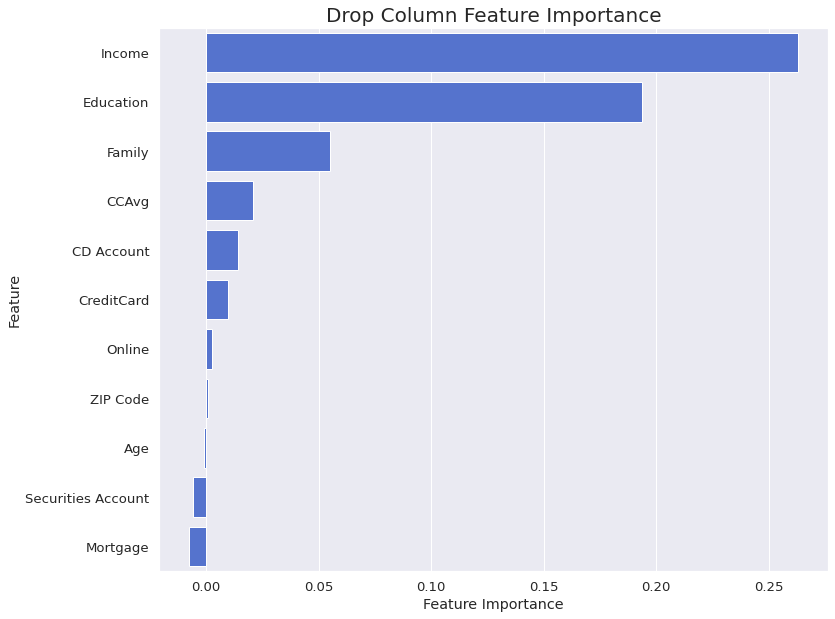

In [203]:
drop_column_importance_plot(svm_opt, X_train, y_train)

In [204]:
# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(svm_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature']  # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a SVC object
svm = SVC(probability=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
svm_opt = tune_clf_hyperparameters(svm, param_grid, X_train, y_train)

Best hyperparameters:
 {'C': 1000, 'class_weight': {0: 0.4546363636363636, 1: 0.5453636363636364}, 'gamma': 0.1, 'kernel': 'rbf'}



	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3569
           1       0.97      0.93      0.95       346

    accuracy                           0.99      3915
   macro avg       0.98      0.97      0.97      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       892
           1       0.94      0.89      0.91        87

    accuracy                           0.98       979
   macro avg       0.96      0.94      0.95       979
weighted avg       0.98      0.98      0.98       979



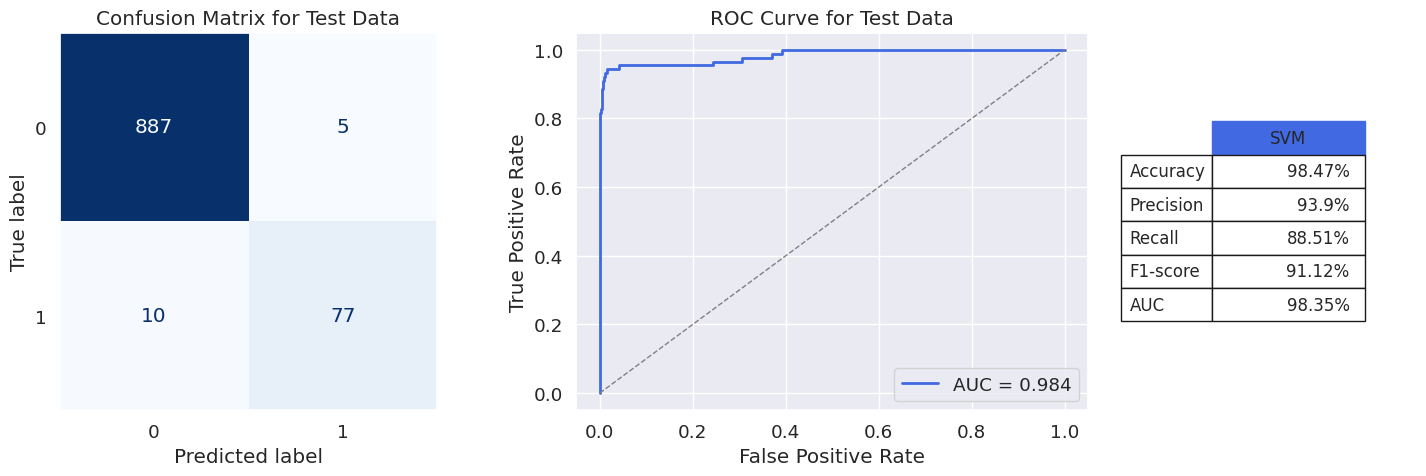

In [205]:
model_evaluation(svm_opt, X_train, X_test, y_train, y_test, 'SVM')
# Save the final performance of SVM classifier
svm_result = metrics_calculator(svm_opt, X_test, y_test, 'SVM')

# Decision Tree Model

A Decision Tree is a tree-based supervised learning algorithm that can be used for classification or regression tasks. It works by recursively splitting the data into subsets based on the values of the features, with the goal of minimizing a cost function, such as Gini impurity or entropy.

**Advantages:**

Easy to understand and interpret: Decision Trees are simple to understand and visualize.

Handles both numerical and categorical data: Decision Trees can handle both numerical and categorical data.

Feature selection: Decision Trees can be used for feature selection, as important features will appear near the root of the tree.

Non-parametric: Decision Trees are non-parametric, meaning that they make no assumptions about the underlying distribution of the data.

**Disadvantages:**

Overfitting: Decision Trees can be prone to overfitting, especially with deep trees or with small training sets. This can result in poor generalization to new data.

Instability: Small changes in the data can result in large changes in the tree, making Decision Trees unstable.

Bias towards features with many categories: Decision Trees can be biased towards features with many categories, as they may dominate the construction of the tree.

Poor approximation of complex functions: Decision Trees may not be suitable for approximating complex functions, as they are limited by the axis-parallel splits at each node.

Note: Decision Trees do not require standard scaling of the data before model building. Standard scaling is typically used for algorithms that are sensitive to the scale of the input features, such as distance-based algorithms like KNN and SVM.

**Decision Tree classifiers are prone to overfitting.** This occurs when the tree is too complex and fits the training data too closely, capturing even the noise in the data.

Ways to prevent overfitting in decision tree classifiers:

Pruning: Removing branches of the tree that do not contribute much to the classification.

Using ensemble methods: Combining multiple decision trees to obtain a more robust model.

Limiting tree size: Setting a minimum number of samples required to split an internal node or a maximum depth for the tree.

The following are the most common hyperparameters for Decision Tree Classifiers:

Criterion: This hyperparameter determines the criterion used to measure the quality of a split. Commonly used criteria are "Gini Impurity" and "Information Gain".

Maximum depth: This hyperparameter controls the maximum depth of the tree. The deeper the tree, the more complex it becomes, which can lead to overfitting. Setting a maximum depth can prevent overfitting by limiting the size of the tree.

Minimum samples per split: This hyperparameter sets the minimum number of samples required to split an internal node. If the number of samples at a node is less than this value, the node cannot be split further. This can also prevent overfitting by limiting the size of the tree.

Minimum samples per leaf: This hyperparameter sets the minimum number of samples required for a leaf node. If a leaf node has fewer samples than this value, it can be removed.

Maximum features: This hyperparameter determines the maximum number of features to consider when splitting a node. It is used to prevent overfitting by reducing the complexity of the model.

Class_weight: Weights associated with classes.

Again we define our hyperparameters grid using the above hyperparameteres and then call tune_clf_hyperparameters function to find the best combination:

In [206]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]
    
# Define the hyperparameter grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': np.arange(1, 10),
              'min_samples_split': np.arange(1, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': [None, 'sqrt', 'log2'],
              'class_weight': class_weights} 

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.6319473684210526, 1: 0.3680526315789474}, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}


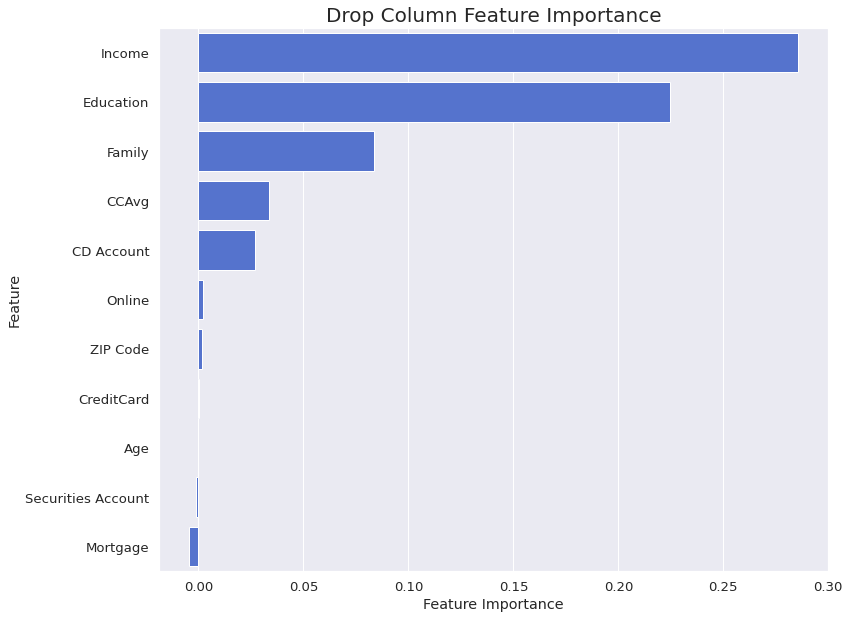

Best hyperparameters:
 {'class_weight': {0: 0.5267894736842105, 1: 0.4732105263157895}, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 6, 'min_samples_split': 2}

	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       0.97      0.90      0.93       346

    accuracy                           0.99      3915
   macro avg       0.98      0.95      0.96      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.86      0.91        87

    accuracy                           0.98       979
   macro avg       0.97      0.93      0.95       979
weighted avg

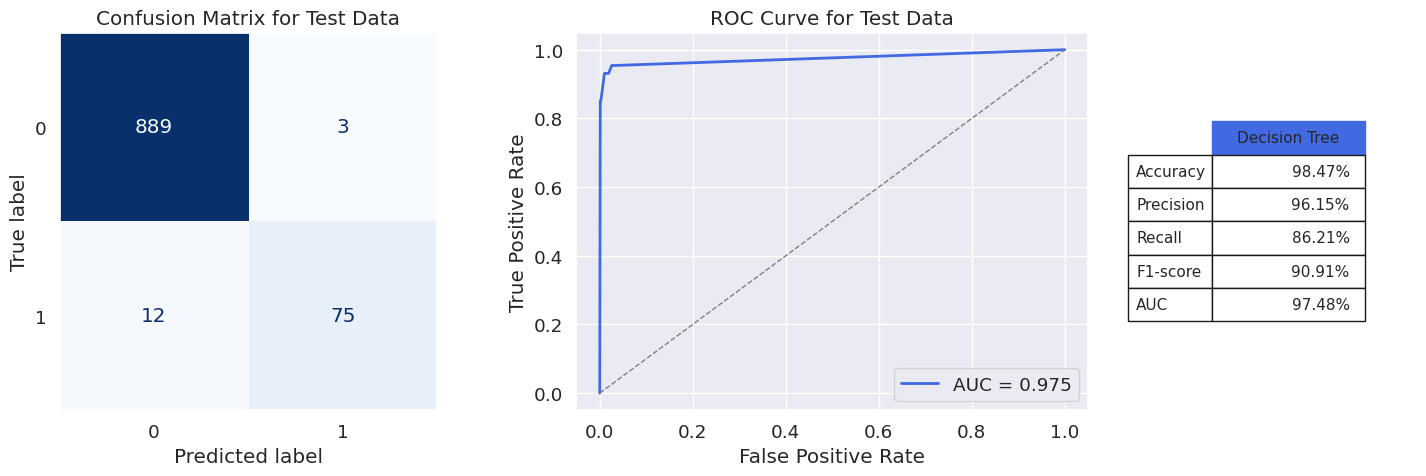

In [207]:
drop_column_importance_plot(dt_opt, X_train, y_train)

# Find Important features with positive feature_importance value
feature_importances = drop_column_importance(dt_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.01]['feature'] # Threshold value of 0.01

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Create a  Decision Tree Classifier object
dt = DecisionTreeClassifier(random_state=0)

# Find the best classifier with the optimal hyperparameters
dt_opt = tune_clf_hyperparameters(dt, param_grid, X_train, y_train)

model_evaluation(dt_opt, X_train, X_test, y_train, y_test, 'Decision Tree')

# Save the final performance of Decision Tree classifier
dt_result = metrics_calculator(dt_opt, X_test, y_test, 'Decision Tree')

# Ensemble Learning

**Ensemble learning** is a machine learning technique that combines the predictions of multiple models to make more accurate and robust predictions. The idea behind ensemble learning is that by combining several models, or weak learners, to solve the same problem, the resulting ensemble model can perform better than any individual model. There are three main ensemble learning methods:

Bagging stands for bootstrapped aggregating. In bagging, multiple instances of the same base model are trained in parallel on different bootstrapped samples of the data, and the results are aggregated through an averaging operation. Bagging is best suited for base models with low bias but high variance, as the averaging operation reduces the variance of the final ensemble model.

Boosting is an iterative technique where multiple instances of the same base model are trained sequentially. At each iteration, the current weak learner is trained based on the previous weak learners and how well they performed on the data. Boosting is best suited for base models with low variance but high bias, as the iterative strategy of learning reduces the bias of the final ensemble model.

Stacking is a technique where different base models are trained independently, and a meta-model is trained on top of that to predict outputs based on the outputs of the base models. In stacking, the base models are used as features for the meta-model, which makes the final predictions based on the combined information from all the base models.

DTs are often used as base models in ensemble methods because they have several properties that make them well-suited for this purpose:
Simple and easy to understand: Decision trees are simple and easy to understand, which makes them a good choice for use as base models in ensemble methods.

Handle non-linear relationships: Decision trees can handle non-linear relationships between features and target variables, which makes them a good choice for modeling complex datasets.

Handle missing values and outliers: Decision trees are able to handle missing values and outliers in the data, which is important for real-world datasets that often have such problems.

Can capture interactions between features: Decision trees can capture interactions between features, which is important for capturing complex relationships in the data.

Fast to train and make predictions: Decision trees are fast to train and make predictions, which makes them well-suited for use in large-scale machine learning models.

Provide feature importance: Decision trees provide feature importance, which can be useful for understanding which features are contributing the most to the predictions made by the model.

The most important bagging models based on decision tree classifier are:

Random Forest: Random forests are an ensemble learning method that utilizes decision trees as its base model. The trees in a random forest are grown on bootstrapped samples of the training data and a randomly selected subset of features. This helps reduce the correlation between the trees and makes the model more robust to missing data. The goal of random forests is to lower the variance of the model by combining multiple deep decision trees. The combination of bagging and random feature subspace selection results in a more robust and accurate model compared to individual decision trees.

Extra Trees: Extra trees are an extension of random forests that use random splits instead of optimizing the splits based on information gain or other criteria. This makes extra trees faster to train than random forests and less prone to overfitting.
The most important boosting models are:

Adaboost: This is one of the earliest and most popular boosting algorithms. It trains a series of weak decision trees and assigns more weight to the misclassified samples in each iteration.

Gradient Boosting: This is a general purpose boosting algorithm that works well with a variety of weak models, including decision trees. It uses the gradient descent optimization method to minimize the loss function and find the best combination of weak models.

XGBoost: This is an optimized implementation of gradient boosting and one of the most widely used algorithms in the machine learning community. It is known for its fast training speed, scalability, and ability to handle large datasets.

LightGBM: This is another optimized implementation of gradient boosting that is designed for large datasets and has been widely adopted in industry.

# Random Forest Model

Random Forest is an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. The trees in a random forest are grown from randomly selected samples of the training data and a subset of the features. It reduces overfitting and improving its stability by combining multiple trees and hence the name "Forest".

Tuning the hyperparameters of a Random Forest classifier can improve its performance on a given problem. The hyperparameters control the complexity and behavior of the model, and their values can have a significant impact on the model's accuracy and generalization ability. For example, setting the maximum depth of the trees too high can result in overfitting, while setting it too low can result in underfitting. The same is true for other hyperparameters such as the minimum number of samples required to split a node, or the number of features considered when splitting a node. Tuning the hyperparameters helps to find the best combination of values that result in the best performance on the particular problem being solved.

The hyperparameters of a Random Forest classifier are:
n_estimators: The number of trees in the forest.

criterion: The function to measure the quality of a split. Common criteria include Gini impurity and information gain.

max_depth: The maximum depth of a tree. This can be used to control the complexity of the model and prevent overfitting.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

bootstrap: Whether or not to sample with replacement when building the trees in the forest.

oob_score: Whether or not to use out-of-bag samples to estimate the generalization accuracy.

class_weight: Weights associated with classes.

max_features: The maximum number of features to consider when splitting a node. This can be set as a number or a float (percentage) or 'sqrt' or 'log2'.

We set the range of values for each hyperparameter that we want to consider for our Random Forest classifier, and then use tune_clf_hyperparameters function to find the best combination of hyperparameters that provides the best results:

Note: Trees that compose a forest can either be shallow, meaning they have a limited number of branches or levels, or deep, meaning they have many branches or levels and are not fully grown. Deep trees have low bias but high variance and, so, are relevant choices for bagging methods that is mainly focused at reducing variance. We consider to have deep trees in choosing the range of values for random forest hyperparameters.

In [208]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150], 
    'max_depth': np.arange(5, 12),
    'min_samples_split': [1, 2, 3],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': class_weights
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
rf = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
rf_opt = tune_clf_hyperparameters(rf, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.47421052631578947, 1: 0.5257894736842106}, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


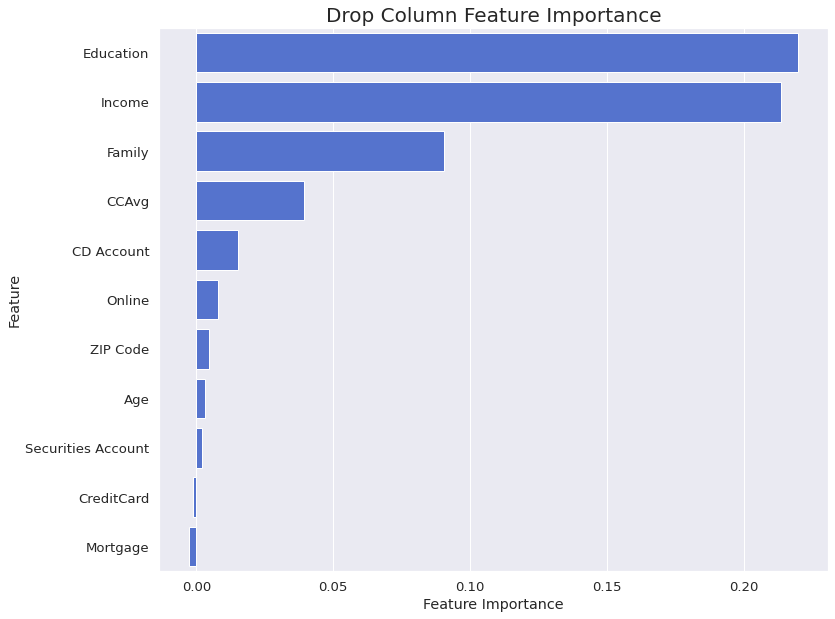


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3569
           1       0.99      0.95      0.97       346

    accuracy                           0.99      3915
   macro avg       0.99      0.97      0.98      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.97      0.90      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



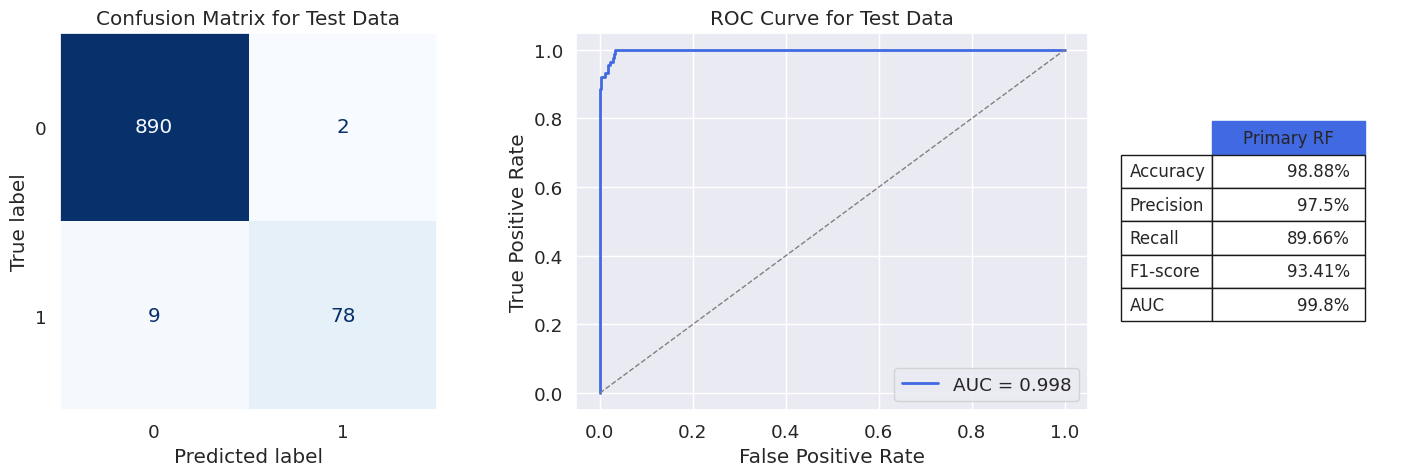

In [209]:
drop_column_importance_plot(rf_opt, X_train, y_train)

model_evaluation(rf_opt, X_train, X_test, y_train, y_test, 'Primary RF')

If we compare the values of precision, recall and f1-score for class 1 (more important class) on both training and test sets, we see a slight decrease in the scores on the test dataset compared to training, which shows that the model is fairly overfit. Overfitting of the model is due to its high variance, and in the following, we try to release the model from overfitting by applying a small change in the value of hyperparameters, hoping that the performance of the model will improve on the test data.

How do each of these Random Forest classifier hyperparameters increase model variance?
n_estimators - Increasing the number of trees in the forest will increase the variance, as more trees in the forest can capture more diverse patterns in the data.

max_depth - Increasing the maximum depth of a tree allows the tree to capture more complex patterns in the data, increasing its variance.

min_samples_split - Decreasing the minimum number of samples required to split an internal node will increase the variance as it allows for more splits to occur.

min_samples_leaf - Decreasing the minimum number of samples required to be at a leaf node will increase the variance as it allows for smaller leaves to form.

max_features - Increasing the maximum number of features to consider when splitting a node will increase the variance as it allows for more diverse sets of features to be considered when splitting.

bootstrap - Sampling with replacement when building the trees in the forest will increase the variance as it allows for more diverse sets of samples to be used for each tree.

Among the optimal values obtained for hyperparameters, we only increase the value of min_samples_leaf from 2 to 6 in order to partially reduce the variance of the model:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3569
           1       0.99      0.90      0.94       346

    accuracy                           0.99      3915
   macro avg       0.99      0.95      0.97      3915
weighted avg       0.99      0.99      0.99      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.99      0.90      0.94        87

    accuracy                           0.99       979
   macro avg       0.99      0.95      0.97       979
weighted avg       0.99      0.99      0.99       979



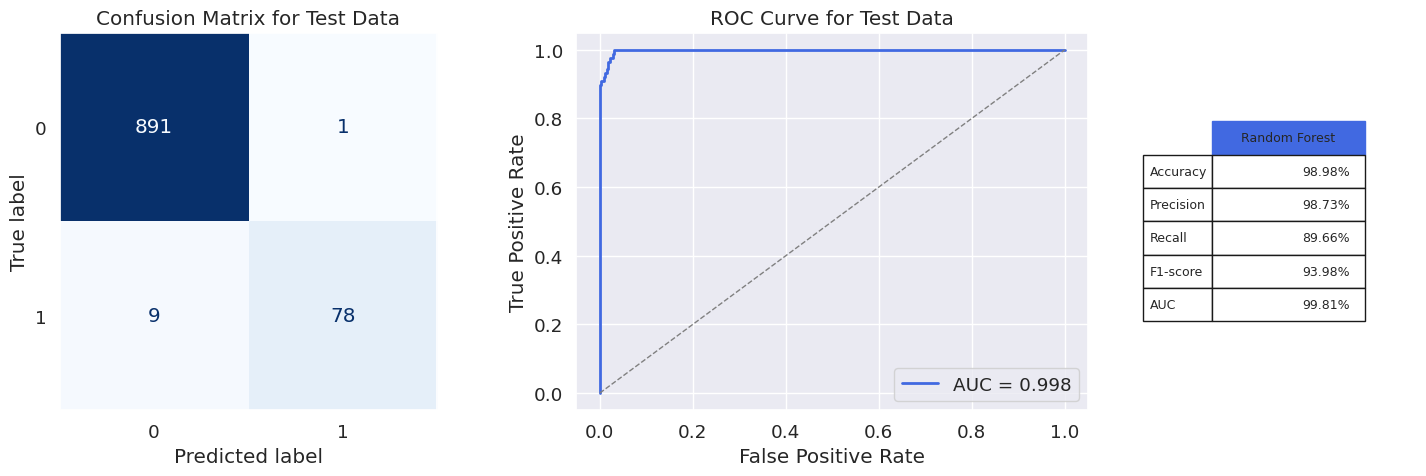

In [210]:
# Build random forest classifier object considering the obtained optimal values for hyperparameters
rf_final = RandomForestClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=100, 
                                  max_depth = 9,  min_samples_leaf=6, min_samples_split=2,
                                  class_weight={0: 0.58, 1: 0.42}, random_state=0)
                             
                            
# Train the final Random Forest model
rf_final.fit(X_train, y_train)

model_evaluation(rf_final, X_train, X_test, y_train, y_test, 'Random Forest')

# Save the final performance of Random Forest classifier
rf_result = metrics_calculator(rf_final, X_test, y_test, 'Random Forest')

# Extra Trees Model

Extra Trees (Extremely Randomized Trees) is an ensemble learning method for classification and regression problems. It is a variation of the popular Random Forest algorithm and uses randomization in the construction of decision trees to create a forest of trees.

In a Random Forest, each tree in the ensemble is constructed using a random subset of the features and a random subset of the training samples. The final prediction is made by taking an average (for regression) or a majority vote (for classification) of the predictions made by all the trees in the ensemble. But in an Extra Trees classifier, each tree in the ensemble is constructed using a random subset of the training samples and a random threshold value is used for each feature to split the samples. This means that the Extra Trees classifier allows for more randomness in the construction of the trees compared to Random Forest, which can make Extra Trees more suitable for certain types of datasets.

Another difference between the two is that the Extra Trees classifier tends to have slightly higher variance compared to Random Forest, meaning it can be more prone to overfitting the training data. However, this higher variance can also lead to better performance on certain datasets, making Extra Trees a useful alternative to consider in some cases.

The hyperparameters of Extra Trees classifier are similar to Random Forest. Therefore, we again set the range of values for each hyperparameter that we want to consider for our Extra Trees classifier, and then use tune_clf_hyperparameters function to find the best combination of hyperparameters that provides the best results:

Note: Tuning Random Forest hyperparameters can be time-consuming. This is because finding the optimal values for the hyperparameters involves training several decision tree classifiers with different combinations of hyperparameter values and evaluating their performance, which can be computationally expensive and time-consuming. Therefore, we performed hyperparameter tuning once and then narrowed the range of hyperparameter values in the following param_grid:

In [211]:
# Weights associated with classes
class_weights = [{0:x, 1:1.0-x} for x in np.linspace(0.001,1,20)]

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [70, 100, 150], 
    'max_depth': [10,12,14],
    'min_samples_split': [1,2,3],
    'min_samples_leaf': [1,2,3],
    'class_weight': class_weights
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create a random forest classifier object
et = ExtraTreesClassifier(criterion='gini', max_features=None, bootstrap=True, random_state=0)

# Find the best classifier with the optimal hyperparameters
et_opt = tune_clf_hyperparameters(et, param_grid, X_train, y_train)

Best hyperparameters:
 {'class_weight': {0: 0.9474210526315789, 1: 0.05257894736842106}, 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}


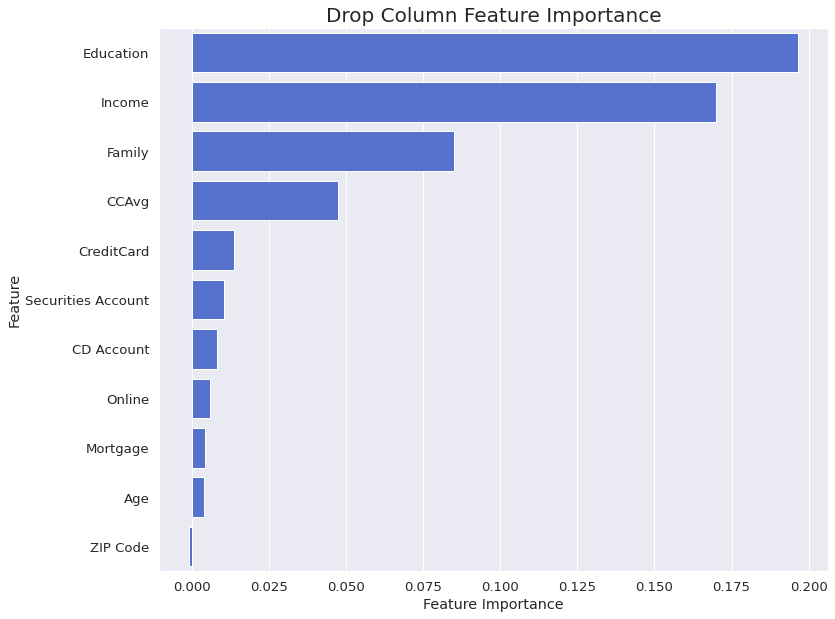


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.98      0.91      0.94        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.97       979
weighted avg       0.99      0.99      0.99       979



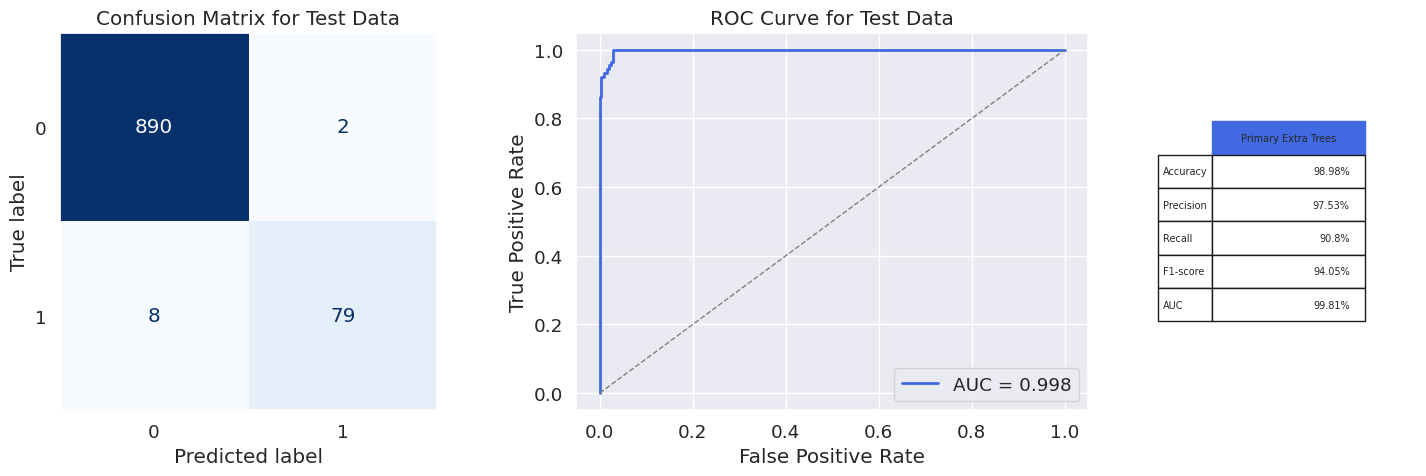

In [212]:
drop_column_importance_plot(et_opt, X_train, y_train)

model_evaluation(et_opt, X_train, X_test, y_train, y_test, 'Primary Extra Trees')


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      0.97      0.99       346

    accuracy                           1.00      3915
   macro avg       1.00      0.99      0.99      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.99      0.89      0.93        87

    accuracy                           0.99       979
   macro avg       0.99      0.94      0.96       979
weighted avg       0.99      0.99      0.99       979



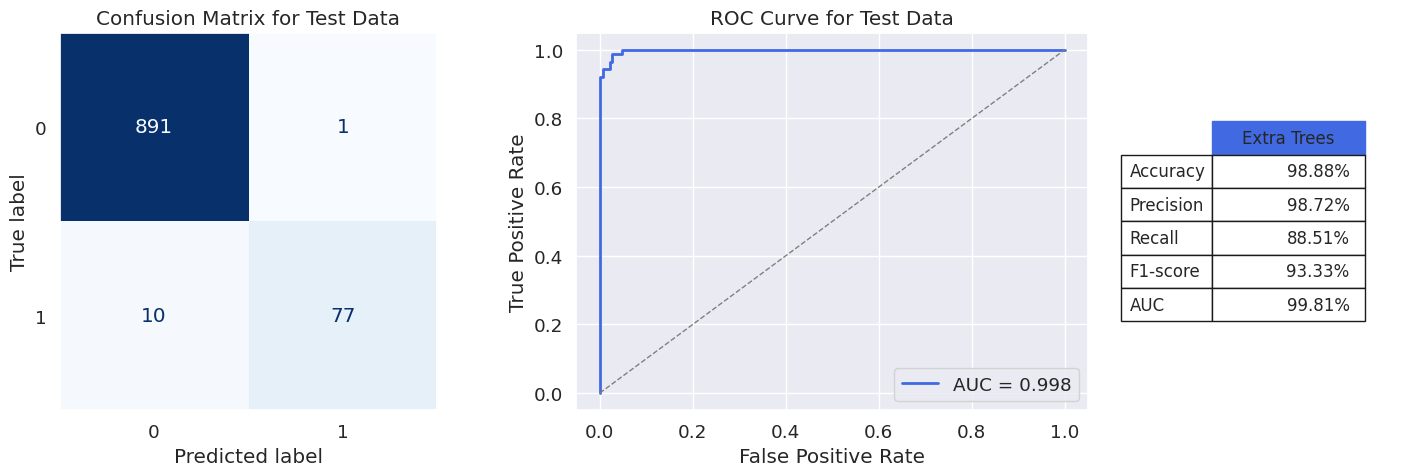

In [213]:
# Build Extra Trees classifier object considering the obtained optimal values for hyperparameters
et_final = ExtraTreesClassifier(criterion='gini', max_features=None, bootstrap=True,  n_estimators=70, 
                                max_depth = 14,  min_samples_leaf=1, min_samples_split=3,
                                class_weight= {0: 0.95, 1: 0.05}, random_state=0)
                             
                            
# Train the final Extra Trees model
et_final.fit(X_train, y_train)

model_evaluation(et_final, X_train, X_test, y_train, y_test, 'Extra Trees')

# Save the final performance of Extra Trees classifier
et_result = metrics_calculator(et_final, X_test, y_test, 'Extra Trees')

# AdaBoost Model

AdaBoost (Adaptive Boosting) is a popular boosting ensemble learning algorithm that is used for classification and regression tasks. It combines multiple "weak" classifiers to create a strong classifier that makes accurate predictions. The weak classifiers are trained one by one and the algorithm adjusts the weights of the training instances based on their misclassification rates. The idea behind AdaBoost is to focus on the samples that are misclassified by the previous weak classifiers, so that the subsequent weak classifiers can do a better job in classifying those samples. In this way, the algorithm tries to improve the overall accuracy of the classifier by combining the outputs of multiple weak classifiers.

The term "weak classifier" refers to a simple classifier that is not highly accurate, but when combined with other weak classifiers, results in a strong overall classifier. Typically, decision trees are used as the weak classifiers in AdaBoost. However, any machine learning algorithm that accepts weights on the training data can be used as the base learner in AdaBoost.

Hyperparameter tuning is generally necessary for most machine learning algorithms, including the AdaBoost classifier. It can help to optimize the performance of the model and avoid overfitting or underfitting.

The hyperparameters of the AdaBoost classifier include:
learning rate: This parameter determines the contribution of each weak learner in the final prediction. A lower learning rate results in a slower convergence, but a more accurate prediction.

number of estimators: This is the maximum number of weak learners that will be used to create the final strong classifier. A larger number of estimators can lead to a more accurate prediction, but it also increases the computation time.

estimator: The algorithm used for the weak learner can be selected based on the problem at hand. We choose Decision Tree.

Note: In addition to the hyperparameters of the AdaBoost classifier, such as the learning rate, number of estimators, and sampling strategy, the hyperparameters of the base estimator also need to be optimized to achieve the best performance. Shallow trees have high bias but low variance and, so, are relevant choices for boosting methods that are mainly focused at reducing bias. Shallow trees allow the boosting algorithm to focus on samples that are difficult to classify.

We set the range of values for each hyperparameter that we want to consider for our AdaBoost classifier, and then use tune_clf_hyperparameters function to find the best combination of hyperparameters that provides the best results:

In [214]:
# Define the hyperparameter grid for AdaBoost
ada_param_grid = {
    'base_estimator__max_depth': [3, 5, 7],
    'base_estimator__min_samples_split': [3, 5, 7],
    'base_estimator__min_samples_leaf': [1, 2, 3],
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.8, 0.9, 1]
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Create the Decision Tree classifier as the base estimator
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state=0)

# Create the AdaBoost classifier using Decision Tree as base estimator
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)

# Find the best AdaBoost classifier with the optimal hyperparameters
ada_opt = tune_clf_hyperparameters(ada, ada_param_grid, X_train, y_train)

Best hyperparameters:
 {'base_estimator__max_depth': 5, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 3, 'learning_rate': 0.9, 'n_estimators': 150}


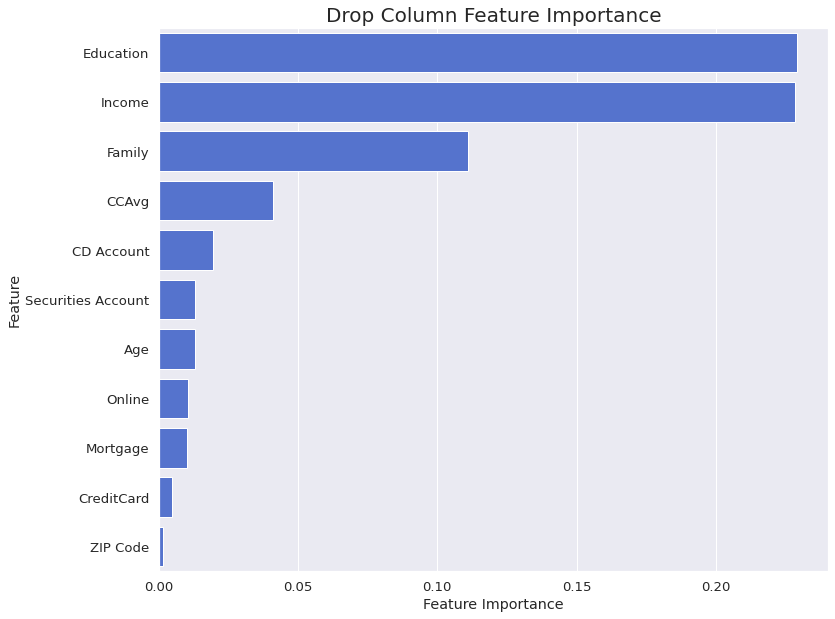


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.97      0.89      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.94      0.96       979
weighted avg       0.99      0.99      0.99       979



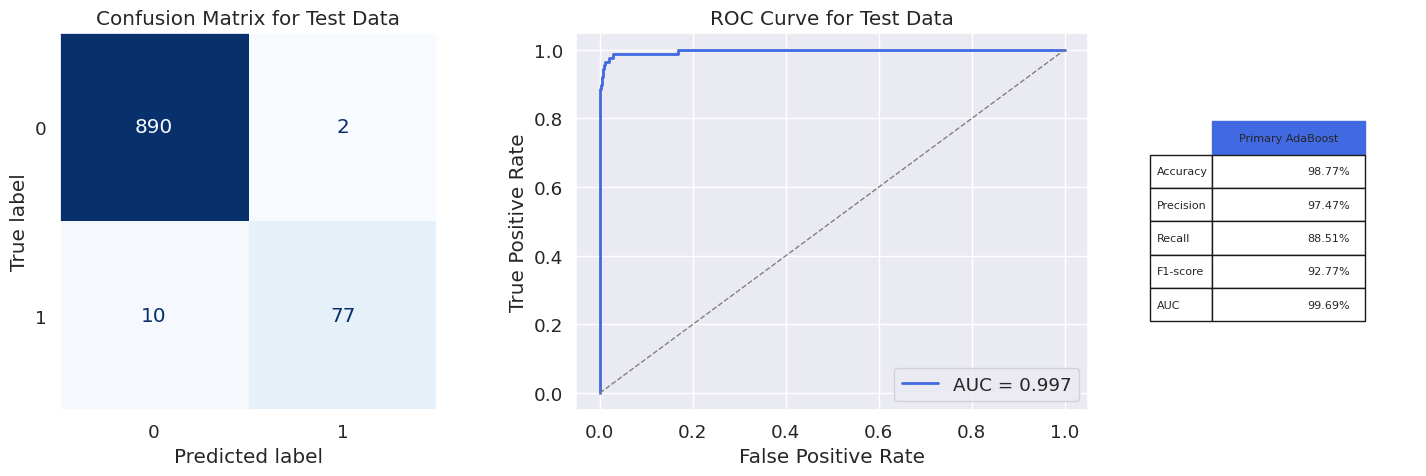

In [215]:
drop_column_importance_plot(ada_opt, X_train, y_train)

model_evaluation(ada_opt, X_train, X_test, y_train, y_test, 'Primary AdaBoost')



Performance metrics for the minority class on the test data show that the model is not overfitting completely, but may not be the best model for the problem. Overfitting of the classifier is due to its high variance, and to avoid overfitting, we can try regularization techniques, which means applying a small change in the value of hyperparameters to reduce the variance of the classifier.

How to reduce our AdaBoost classifier variance by tuning model hyperparameters?
Decrease the number of trees in the model: AdaBoost uses multiple weak learners (in this case decision trees) to build a strong model. Decreasing the number of trees in the model can reduce model variance.

Decrease the maximum depth of the decision trees: Decreasing the maximum depth of the decision trees can reduce model variance.

Increase the minimum number of samples required to split an internal node: Increasing the minimum number of samples required to split an internal node can reduce model variance.

Increase the minimum number of samples required to be at a leaf node: Increasing the minimum number of samples required to be at a leaf node can reduce model variance.

Decrease the learning rate: The learning rate in AdaBoost determines the weight that each weak learner is given. Decreasing the learning rate can make the model less prone to overfitting.

Among the optimal values obtained for hyperparameters, we only decrease the value of learning_rate from 0.9 to 0.8 in order to partially reduce the variance of the model:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.95      0.90      0.92        87

    accuracy                           0.99       979
   macro avg       0.97      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



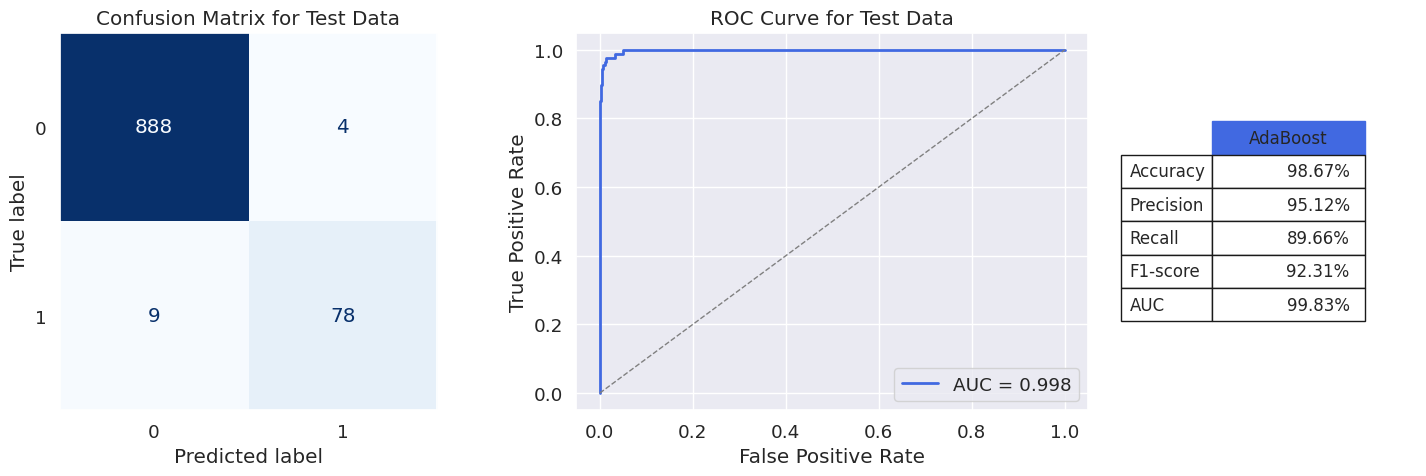

In [216]:
# Create the Decision Tree classifier as the base estimator
dt = DecisionTreeClassifier(criterion='gini', max_features=None, random_state=0, max_depth=5, min_samples_leaf=2, min_samples_split=5)

# Create the AdaBoost classifier using Decision Tree as base estimator
ada_final = AdaBoostClassifier(base_estimator=dt, random_state=0, learning_rate=0.8, n_estimators=100)

# Train the final AdaBoost classifier
ada_final.fit(X_train, y_train)

model_evaluation(ada_final, X_train, X_test, y_train, y_test, 'AdaBoost')

# Save the final performance of AdaBoost classifier
ada_result = metrics_calculator(ada_final, X_test, y_test, 'AdaBoost')

# Gradient Boosting Model

Gradient Boosting is an ensemble machine learning technique for classification and regression problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise manner, where each subsequent model tries to correct the mistakes of the previous model. The algorithm iteratively trains decision trees in such a way that the trees are able to fit the negative gradient of the loss function being optimized. The final prediction is made by combining the outputs of all the individual trees.

Note : The implementation of Gradient Boosting Classifier in scikit-learn's ensemble module (sklearn.ensemble.GradientBoostingClassifier) is based on decision tree as the base estimator.

The hyperparameters of Gradient Boosting Classifier include:
n_estimators: The number of trees in the ensemble.

learning_rate: The learning rate shrinks the contribution of each tree by a factor of learning_rate. It is a parameter to control the magnitude of update, and the value should be set lower for a large number of trees.

max_depth: The maximum depth of the individual decision trees. The deeper the tree, the more splits it has and the more complex the model becomes.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

subsample: The fraction of samples to be used for fitting the individual base learners.

loss: The loss function to be optimized. The default loss function is ‘deviance’ which refers to logistic regression for binary classification and multinomial deviance for multi-class classification problems.

criterion: The function to measure the quality of a split. Supported criteria are “friedman_mse” for mean squared error, which is used for regression problems, and “entropy” or “gini” for the information gain, which is used for classification problems.

We again set the range of values for each hyperparameter that we want to consider for our Gradient Boosting classifier, and then use tune_clf_hyperparameters function to find the best combination of hyperparameters that provides the best results:

In [217]:
# Define the hyperparameter grid for tuning
gbc_param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'loss': ['deviance', 'exponential'],
    'criterion': ['friedman_mse', 'squared_error'],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Define the hyperparameter grid for tuning
gbc_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'subsample': [0.9, 1.0],
    'learning_rate': [0.3, 0.4, 0.5]
}

# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(max_features=None, loss='deviance', criterion='friedman_mse', random_state=0)

# Find the best hyperparameters from the tuning process
gbc_opt = tune_clf_hyperparameters(gbc, gbc_param_grid, X_train, y_train)

Best hyperparameters:
 {'learning_rate': 0.5, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


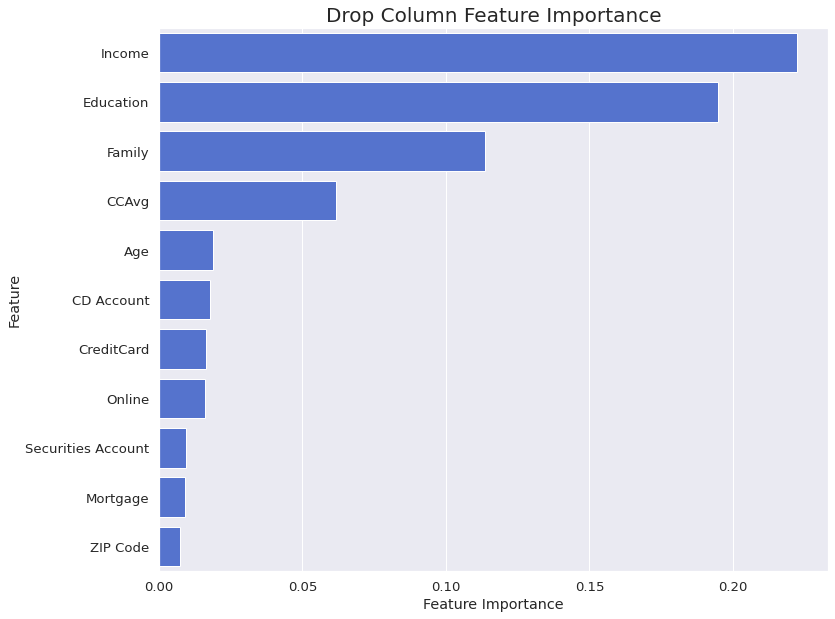


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



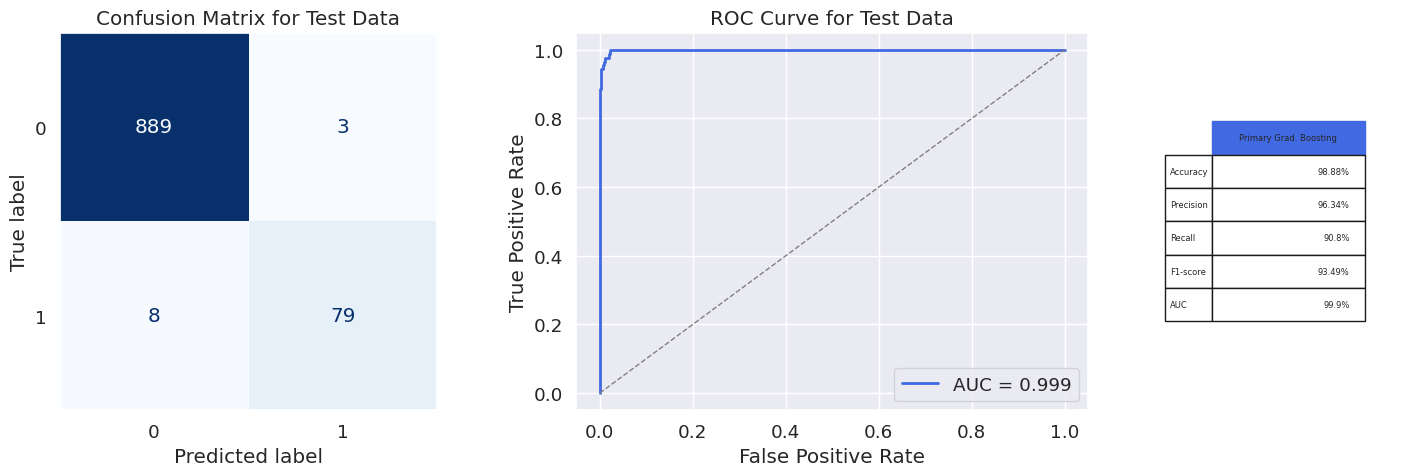

In [218]:
drop_column_importance_plot(gbc_opt, X_train, y_train)

model_evaluation(gbc_opt, X_train, X_test, y_train, y_test, 'Primary Grad. Boosting')

Our Gradient Boosting classifier is fairly overfit on the minority class. Therefore, agian we need to reduce the variance of the classifier by slightly changing the value of hyperparameters.

How to reduce our Gradient Bossting classifier variance by tuning model hyperparameters?
Number of Trees: We can reduce the number of trees to reduce model variance. More trees means more complex models, which are more prone to overfitting.

Maximum Depth of Trees: We can reduce the maximum depth of trees in the model, which will reduce model variance by limiting the number of splits.

Learning Rate: Decreasing the learning rate will reduce the magnitude of the updates to the model parameters, making it harder for the model to overfit the training data.

Subsampling: can subsample the training data by taking a smaller sample of it during each iteration of the model training. This will prevent overfitting by introducing randomness into the model.

Tree-Specific Hyperparameters: We can reduce the variance of the model by adjusting hyperparameters specific to decision trees. For exmale we can increase the minimum number of samples required to split a node or the minimum number of samples in a leaf.

Among the optimal values obtained for hyperparameters, we only decrease the value of learning_rate from 0.4 to 0.2 in order to partially reduce the variance of the model:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       892
           1       0.99      0.92      0.95        87

    accuracy                           0.99       979
   macro avg       0.99      0.96      0.97       979
weighted avg       0.99      0.99      0.99       979



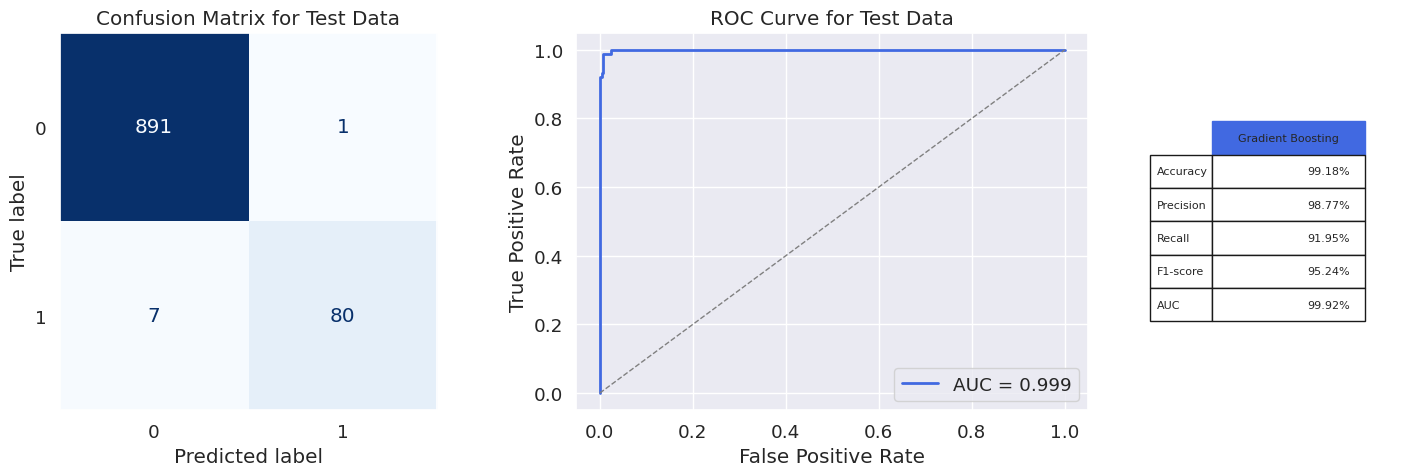

In [219]:
# Initialize the Gradient Boosting Classifier
gbc_final = GradientBoostingClassifier(max_features=None, loss='deviance', criterion='friedman_mse',
                                 learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0,
                                 min_samples_leaf=4, min_samples_split=2, random_state=0)

# Train the final AdaBoost classifier
gbc_final.fit(X_train, y_train)

model_evaluation(gbc_final, X_train, X_test, y_train, y_test, 'Gradient Boosting')

# Save the final performance of Gradient Boosting classifier
gbc_result = metrics_calculator(gbc_final, X_test, y_test, 'Gradient Boosting')

In [220]:
gc.collect()
time.sleep(5)

# XGBoost Model

XGBoost is a type of gradient boosting algorithm for tree-based machine learning models. It stands for eXtreme Gradient Boosting. XGBoost is a highly optimized implementation of gradient boosting and is designed to be fast and memory efficient.

XGBoost has several unique features compared to other gradient boosting implementations, such as:
Handling missing values
Parallel processing for training and prediction
Tree pruning for reducing overfitting
Regularization for preventing overfitting
These features make XGBoost a popular and powerful tool for solving many machine learning problems

XGBoost (eXtreme Gradient Boosting) is an open-source library for gradient boosting that is widely used for classification and regression problems. It stands for Extreme Gradient Boosting and is an implementation of gradient boosting trees that is optimized for speed and performance. XGBoost is a highly flexible algorithm that allows users to define custom objectives and evaluation criteria and handles missing values efficiently.

XGBoost Advantages:
Regularization: Unlike the standard GBM implementation, XGBoost has regularization which helps to reduce overfitting.

Fast Parallel Processing: XGBoost implements parallel processing, making it much faster than GBM. It also supports Hadoop implementation.

High Flexibility: XGBoost allows users to define custom optimization objectives and evaluation criteria, providing a new level of customization.

Handling Missing Values: XGBoost has an in-built routine for handling missing values and can learn how to handle them in future predictions.

Effective Tree Pruning: XGBoost makes splits up to the specified maximum depth and then prunes the tree, whereas GBM stops splitting when it encounters a negative loss.

Built-in Cross-Validation and Continued Training: XGBoost allows for cross-validation during each boosting iteration, making it easier to determine the optimum number of iterations. Additionally, it can start training from its last iteration of a previous run.


Building a model with XGBoost is easy, but improving the model requires hyperparameter tuning. This involves adjusting specific settings to optimize the model's performance. Determining the right set of hyperparameters and their ideal values is challenging and requires careful experimentation and analysis. Despite the difficulties in fine-tuning the hyperparameters, XGBoost remains a highly effective solution for predictive modeling.

The most common hyperparameters used in XGBoost:
eta (Learning rate): Step size shrinkage used in updates to prevent overfitting.

max_depth: Maximum tree depth for base learners. Increasing this value will make the model more complex and more likely to overfit.

gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree.

lambda (reg_lambda): L2 regularization term on weights. Increasing this value will make the model more conservative.

alpha (reg_alpha): L1 regularization term on weights. Increasing this value will force more feature selection.

subsample: Subsample ratio of the training instances. Setting it to a value less than 1 will make the model more random.

colsample_bytree: Subsample ratio of columns when constructing each tree.

colsample_bylevel: Subsample ratio of columns for each level.

n_estimators: Number of trees in the forest.

max_leaf_nodes: Maximum number of terminal nodes or leaves in a tree.

max_delta_step: Maximum delta step for each leaf. It's used for further control over the range of values of weight for each instance.

scale_pos_weight: It is the ratio of number of negative class to the positive class and controls the balance of positive and negative weights, useful for unbalanced classes.

min_child_weight: Minimum sum of instance weight (hessian) needed in a child. If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, the building process will give up further partitioning.

booster: The underlying model used by XGBoost, either tree-based (gbtree) or linear (gblinear). Tree-based booster always outperforms the linear booster and thus the later is rarely used.

Objective: Defines the loss function used to evaluate the performance of the model.

eval_metric: Specifies the metric used to judge the performance of the model during training and testing.

We can again set the range of values for each hyperparameter that we want to consider for our XGBoost classifier, and then use tune_clf_hyperparameters function to find the best combination of hyperparameters that provides the best results:

In [221]:
# Perform train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Define imbalance ratio
ratio = sum(y_train==0)/sum(y_train==1) 

# Define the hyperparameter grid to search
xgb_param_grid = {
    'max_depth': [5, 6, 7],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 5, 10],
    'scale_pos_weight': [ratio, ratio*1.3, ratio*1.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'colsample_bylevel': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'max_delta_step': [0, 1, 2],
    'gamma': [0, 0.1, 1],
    'max_leaf_nodes': [2, 4, 6]
}


# Initialize the XGBoost Classifier
xgb_opt = XGBClassifier(max_depth=5,
                        learning_rate=0.3,
                        n_estimators=200,
                        min_child_weight=1,
                        scale_pos_weight=1.5,
                        colsample_bytree=0.8,
                        gamma=0.1,
                        booster='gbtree',
                        objective='binary:logistic',
                        eval_metric='error', 
                        random_state=0)

# Train the XGBoost Classifier
xgb_opt.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='error',
              gamma=0.1, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1.5, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

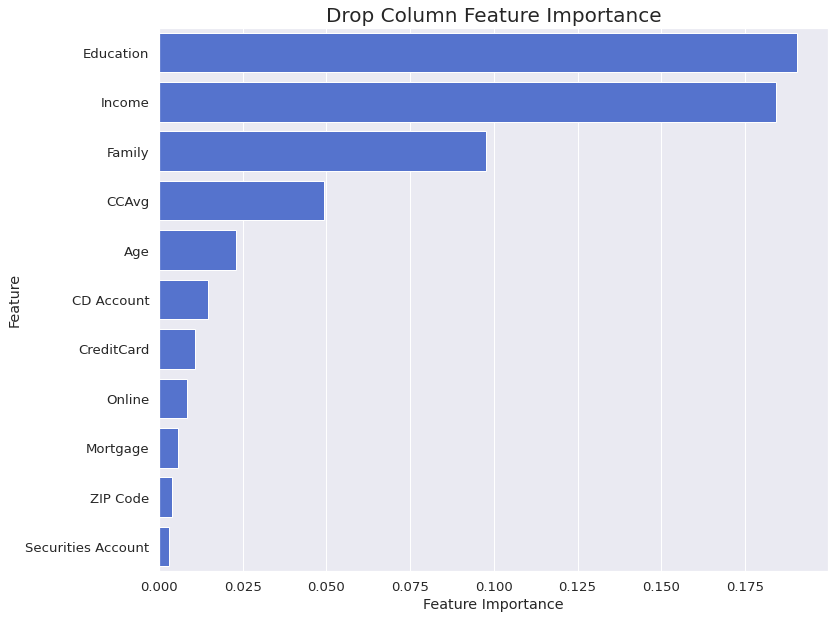


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



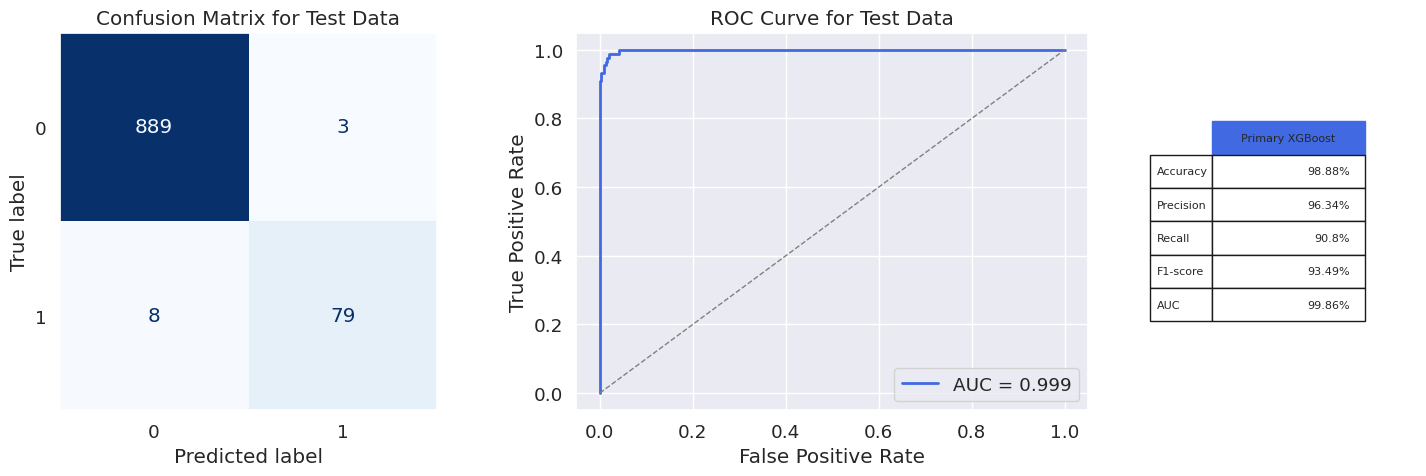

In [222]:
drop_column_importance_plot(xgb_opt, X_train, y_train)
# Find Important features
feature_importances = drop_column_importance(xgb_opt, X_train, y_train, 0)
selected_features = feature_importances[feature_importances['feature importance']>0.002]['feature'] # Threshold value of 0.002

# Filter dataset
X_train = X_train[selected_features]
X_test = X_test[selected_features]

# Initialize the XGBoost Classifier
xgb = XGBClassifier(max_depth=5,
                    learning_rate=0.3,
                    n_estimators=200,
                    min_child_weight=1,
                    scale_pos_weight=1.5,
                    colsample_bytree=0.8,
                    gamma=0.1,
                    booster='gbtree',
                    objective='binary:logistic',
                    eval_metric='error', 
                    random_state=0)

# Train the XGBoost Classifier
xgb.fit(X_train, y_train)

model_evaluation(xgb, X_train, X_test, y_train, y_test, 'Primary XGBoost')

The XGBoost classifier is fairly overfitting on the minority class and the hyperparameters need to be adjusted to reduce the variance and prevent overfitting.

How to reduce our XGBoost classifier variance?
min_child_weight: We can increase the value of min_child_weight to control the complexity of the tree model and prevent overfitting.

max_depth: We can decrease the max_depth to prevent the model from learning too much from the training data and reduce model variance.

gamma: We can increase the value of gamma to control the minimum loss reduction required to make a split in order to reduce model variance.

lambda: We can increase the value of lambda to add regularization and control overfitting.

subsample: We can decrease the value of subsample to reduce the number of samples used to fit each tree and reduce model variance.

colsample_bytree: We can decrease the value of colsample_bytree to reduce the number of features used in each tree and avoid overfitting.

n_estimators: we can increase the number of trees to reduce the variance of the model.

Among the optimal values obtained for hyperparameters, we only decrease the value of max_depth from 5 to 4 in order to partially avoid overfitting:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3569
           1       1.00      1.00      1.00       346

    accuracy                           1.00      3915
   macro avg       1.00      1.00      1.00      3915
weighted avg       1.00      1.00      1.00      3915


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       892
           1       0.96      0.91      0.93        87

    accuracy                           0.99       979
   macro avg       0.98      0.95      0.96       979
weighted avg       0.99      0.99      0.99       979



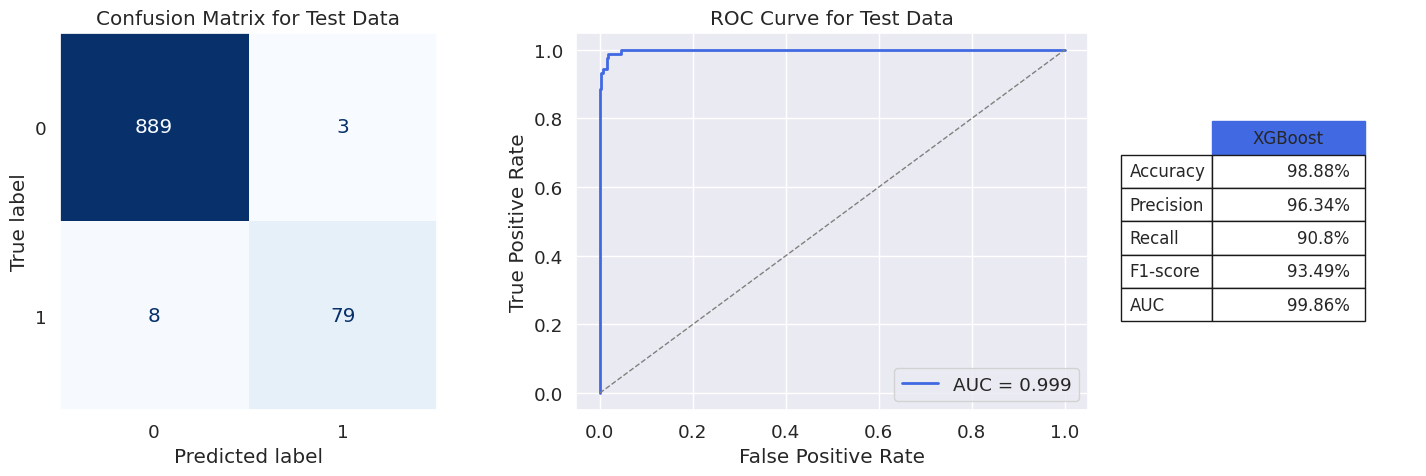

In [223]:
# Initialize the XGBoost Classifier
xgb_final = XGBClassifier(max_depth=4,
                          learning_rate=0.3,
                          n_estimators=200,
                          min_child_weight=1,
                          scale_pos_weight=1.5,
                          colsample_bytree=0.8,
                          gamma=0.1,
                          booster='gbtree',
                          objective='binary:logistic',
                          eval_metric='error', 
                          random_state=0)

# Train the XGBoost Classifier
xgb_final.fit(X_train, y_train)

model_evaluation(xgb_final, X_train, X_test, y_train, y_test, 'XGBoost')

# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(xgb_final, X_test, y_test, 'XGBoost')

In [224]:
gc.collect()
time.sleep(5)

# Conclusion

As we explained earlier, the most important metric for this project is the f1-score for class '1'. A high f1-score indicates a balance between identifying as many potential loan customers as possible (high recall) and minimizing the number of false positives (high precision), which is crucial for the bank to increase the conversion rate of depositors to borrowers while reducing the cost of the marketing campaign.

Next, we can check the performance of all previous classifiers based on metrics:

In [225]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([cnb_result, bnb_result, logreg_result, knn_result, svm_result, dt_result,
           rf_result, et_result, ada_result, gbc_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score values
results.sort_values(by='F1-score', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score')


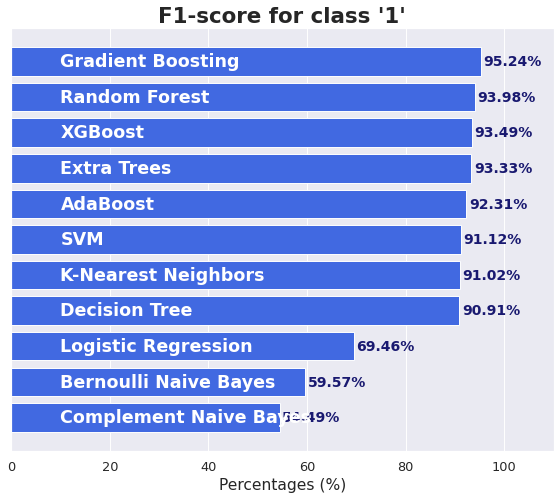

In [226]:
# Prepare values
results.sort_values(by='F1-score', ascending=True, inplace=True)
f1_scores = results['F1-score'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 8), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='midnightblue')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()